In [242]:
# Install dependencies
!pip install catboost category_encoders

# Library Dasar
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# IPython Display
from IPython.display import display

# Preprocessing Data
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from category_encoders import BinaryEncoder

# Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier,
    VotingClassifier, StackingClassifier, IsolationForest
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Evaluasi Model
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    fbeta_score, recall_score, precision_score, make_scorer, f1_score
)

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Gunakan pipeline dari imbalanced-learn

# Resampling Data
from imblearn.under_sampling import (
    RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
)
from imblearn.over_sampling import (
    RandomOverSampler, SMOTE, ADASYN
)
from imblearn.combine import SMOTETomek, SMOTEENN

# Model Selection & Hyperparameter Tuning
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate, StratifiedKFold, RandomizedSearchCV
)

# SHAP untuk Explainability
import shap

# Definisikan setiap metode resampling
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version=1)
nm2 = NearMiss(version=2)
nm3 = NearMiss(version=3)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
smt = SMOTETomek(random_state=42)
sme = SMOTEENN(random_state=42)


!pip install category_encoders
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

**Context**:

Pembatalan pemesanan merupakan aspek kritis dalam manajemen pendapatan hotel karena berdampak langsung pada sistem reservasi kamar. Pembatalan ini dapat menyebabkan kerugian finansial dan mengganggu keputusan manajemen permintaan dalam industri perhotelan. Banyak faktor yang memengaruhi pembatalan pemesanan, seperti perubahan jadwal perjalanan bisnis, hari libur, kondisi lingkungan (misalnya pandemi), dan faktor lainnya. Memahami alasan di balik pembatalan pemesanan pelanggan adalah langkah penting bagi hotel untuk meningkatkan kepuasan pelanggan dan mengoptimalkan strategi bisnis. Dengan mengidentifikasi faktor-faktor penyebab pembatalan, hotel dapat menyesuaikan layanan dan penawaran mereka untuk memenuhi ekspektasi pelanggan. Namun, memprediksi pembatalan pemesanan tetap menjadi tantangan besar. Untuk mengatasi hal ini, hotel memerlukan sistem prediktif yang dapat mengidentifikasi kemungkinan pembatalan, sehingga mereka dapat mengambil tindakan proaktif seperti menawarkan kamar kepada pelanggan lain atau merencanakan strategi alternatif. Dalam industri perhotelan, Passenger Name Record (PNR), sebuah format standar yang dikembangkan oleh industri pariwisata dan perjalanan, sering digunakan sebagai dasar untuk mengembangkan model prediksi pembatalan pemesanan.

---

 **Problem Statement:**

LisGarve City & Resort Hotel, sebuah penginapan di Portugal, saat ini mengalami penurunan pendapatan akibat tingginya tingkat pembatalan pemesanan. Pembatalan ini menyebabkan kerugian finansial yang signifikan dan mengganggu operasional hotel. Manajemen hotel ingin mengetahui tindakan yang dapat diambil untuk mengurangi peluang pembatalan dengan mengidentifikasi karakteristik pelanggan yang cenderung membatalkan pemesanan. Namun, sulit bagi hotel untuk melacak alasan spesifik di balik pembatalan tersebut. Oleh karena itu, hotel memerlukan kemampuan untuk memprediksi pelanggan mana yang berpeluang besar membatalkan pemesanan, sehingga dapat mengambil langkah-langkah pencegahan yang tepat.

---

 **Goals:**

Berdasarkan permasalahan yang dihadapi, tujuan utama dari proyek ini adalah:
1. **Mengidentifikasi Karakteristik Pelanggan yang Berpeluang Membatalkan Pemesanan**: Menganalisis data untuk memahami pola dan faktor-faktor yang menyebabkan pembatalan.
2. **Mengembangkan Program Marketing yang Tepat Sasaran**: Membuat strategi marketing yang ditujukan kepada pelanggan yang berisiko tinggi membatalkan pemesanan, seperti menawarkan insentif atau penawaran khusus.
3. **Meningkatkan Pendapatan Hotel**: Mengurangi kerugian finansial akibat pembatalan dengan memaksimalkan tingkat hunian kamar dan mengoptimalkan strategi revenue management.

---

 **ANALYTIC APPROACH**

Pendekatan analitis yang akan dilakukan meliputi beberapa tahapan:
1. **Pengumpulan Data**: Mengumpulkan data pemesanan hotel yang komprehensif, termasuk informasi seperti `lead_time`, `market_segment`, `previous_cancellations`, dan `is_canceled`.
   - **Sumber Data**: Dataset dari [UCI Machine Learning Repository](https://www.sciencedirect.com/science/article/pii/S2352340918315191).
2. **Data Cleaning**: Membersihkan data dari nilai yang hilang (missing values), outlier, dan ketidakonsistenan.
3. **Exploratory Data Analysis (EDA)**: Menganalisis data untuk mengidentifikasi pola, tren, dan hubungan antar variabel.
4. **Pemodelan Machine Learning**: Membangun model prediktif menggunakan algoritma seperti Logistic Regression, Random Forest, Decision Tree, KNN, Voting Classifier (Hard), Voting Classifier (Soft), Gradient Boosting, XGBoost dan CatBoost untuk memprediksi kemungkinan pembatalan pemesanan.
5. **Evaluasi Model**: Mengukur performa model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F2-score.
6. ⁠**⁠Deployment and Insights**: Mengintegrasikan model ke dalam sistem reservasi hotel. Memberikan laporan prediktif untuk mendukung keputusan pemasaran ulang kamar.

---
**Mengapa Machine Learning Diperlukan dan Benefit yang Diperoleh:**

Solusi Prediktif:
Penggunaan algoritma machine learning, seperti XGBoost, memungkinkan hotel untuk mengembangkan model prediksi yang akurat dalam mengidentifikasi pelanggan yang berpotensi membatalkan pemesanan. Ini jauh lebih efisien dibandingkan dengan pendekatan manual atau aturan statis yang sulit beradaptasi dengan perubahan perilaku pelanggan.
Keuntungan Finansial dan Operasional:
Dengan model prediksi, hotel dapat:
Mengurangi risiko kamar kosong melalui penyesuaian overbooking secara proaktif.
Mengoptimalkan strategi pemasaran dan insentif, sehingga pelanggan yang berisiko tinggi mendapatkan perhatian khusus.   _ Kustomisasi dan Skalabilitas:
Model machine learning dapat terus diperbarui dan diadaptasi dengan data real-time, memungkinkan hotel untuk merespons dinamika pasar dan tren perilaku pelanggan dengan cepat.

---

 Berikut adalah penjelasan **Metric Evaluation** yang dilengkapi dengan visualisasi untuk memudahkan pemahaman:

---

 **METRIC EVALUATION**

Untuk mengevaluasi performa model prediksi pembatalan pemesanan hotel, kita menggunakan **Confusion Matrix** sebagai dasar pengukuran. Confusion Matrix adalah tabel yang menggambarkan performa model klasifikasi dengan membandingkan prediksi model terhadap nilai aktual. Berikut adalah visualisasi Confusion Matrix:

 **Confusion Matrix Visual**
```
                      Aktual Cancel (1)     Aktual Tidak Cancel (0)
Prediksi Cancel (1)      True Positive (TP)      False Positive (FP)
Prediksi Tidak Cancel (0) False Negative (FN)     True Negative (TN)
```

![Confusion Matrix](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)  
*Sumber: [ResearchGate](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)*

---

 **Penjelasan Metrik**
1. **True Positive (TP)**:  
   - **Deskripsi**: Pelanggan diprediksi akan membatalkan pemesanan, dan aktualnya benar-benar membatalkan.  
   - **Visualisasi**:  
     ```
     Prediksi: Cancel (1)  
     Aktual: Cancel (1)  
     ```
   - **Konsekuensi**: Hotel dapat mengambil tindakan proaktif, seperti menawarkan insentif untuk mencegah pembatalan.

2. **False Positive (FP)**:  
   - **Deskripsi**: Pelanggan diprediksi akan membatalkan pemesanan, tetapi sebenarnya tidak membatalkan.  
   - **Visualisasi**:  
     ```
     Prediksi: Cancel (1)  
     Aktual: Tidak Cancel (0)  
     ```
   - **Konsekuensi**: Hotel memberikan voucher diskon 10% (9.1 Euro) kepada pelanggan yang sebenarnya tidak akan membatalkan.

3. **False Negative (FN)**:  
   - **Deskripsi**: Pelanggan diprediksi tidak akan membatalkan pemesanan, tetapi sebenarnya membatalkan.  
   - **Visualisasi**:  
     ```
     Prediksi: Tidak Cancel (0)  
     Aktual: Cancel (1)  
     ```
   - **Konsekuensi**: Hotel kehilangan pendapatan sebesar harga kamar per malam (91.85 Euro).

4. **True Negative (TN)**:  
   - **Deskripsi**: Pelanggan diprediksi tidak akan membatalkan pemesanan, dan aktualnya tidak membatalkan.  
   - **Visualisasi**:  
     ```
     Prediksi: Tidak Cancel (0)  
     Aktual: Tidak Cancel (0)  
     ```
   - **Konsekuensi**: Tidak ada tindakan khusus yang diperlukan.

---

 **Fokus Utama: Mengurangi False Negative (FN)**
Dalam konteks bisnis hotel, **False Negative** memiliki dampak finansial yang lebih besar karena hotel kehilangan pendapatan dari kamar yang seharusnya dapat dijual kembali. Oleh karena itu, metrik utama yang akan digunakan adalah **Recall**, yang mengukur seberapa baik model dapat mengidentifikasi pelanggan yang benar-benar akan membatalkan pemesanan.


 **Visualisasi Recall**:

```
Recall = TP / (TP + FN)

```

---

### **Konsekuensi Bisnis**
Berikut adalah visualisasi konsekuensi bisnis dari **Type 1 Error (False Positive)** dan **Type 2 Error (False Negative)**:

 **Type 1 Error (False Positive)**:
- **Konsekuensi**: Hotel memberikan voucher diskon 10% kepada pelanggan yang sebenarnya tidak akan membatalkan pemesanan.  
- **Biaya**: 10% dari harga kamar per malam = **108 Euro**.  
- **Visualisasi**:  
  ```
  Biaya = 10% x 108 Euro = 10.8 Euro
  ```

 **Type 2 Error (False Negative)**:
**Konsekuensi**: Hotel kehilangan pendapatan dari kamar yang tidak terisi karena pembatalan yang tidak terprediksi.  
- **Biaya**: Harga kamar per malam = **108 Euro**.  
- **Visualisasi**:  
  ```
  Biaya = 108 Euro
  ```

---

 **Perbandingan Konsekuensi**
Berikut adalah perbandingan biaya antara **Type 1 Error** dan **Type 2 Error**:

| **Error Type**       | **Konsekuensi**                          | **Biaya (Euro)** |
|-----------------------|------------------------------------------|------------------|
| **False Positive (FP)** | Memberikan voucher diskon 10%            | 10.8              |
| **False Negative (FN)** | Kehilangan pendapatan dari kamar kosong  | 108            |

---

 **Visualisasi Dampak Finansial**
Berikut adalah grafik yang menunjukkan perbandingan biaya antara **False Positive** dan **False Negative**:

```plaintext
Biaya (Euro)
100 |                   
 90 |                   
 80 |                   
 70 |                   
 60 |                   
 50 |                   
 40 |                   
 30 |                   
 20 |                   
 10 |                   
  0 |___________________
      False Positive    False Negative
```

---

 **Kesimpulan Metric Evaluation**
Dengan memfokuskan pada metrik **Recall**, hotel dapat meminimalkan **False Negative** dan mengurangi kerugian finansial yang lebih besar. Visualisasi Confusion Matrix dan perbandingan biaya membantu memahami dampak bisnis dari prediksi pembatalan pemesanan. Dengan demikian, model prediksi yang dikembangkan harus dioptimalkan untuk meningkatkan **Recall** tanpa mengorbankan metrik lainnya secara signifikan.

---

**Proyek ini dirancang untuk membantu Manajemen Hotel (Top Management) dari LisGarve City & Resort Hotel** dalam mengatasi masalah pembatalan pemesanan yang berdampak signifikan pada pendapatan dan operasional hotel.

Dengan visualisasi dan wawasan ini, pemahaman tentang metrik evaluasi dan dampak bisnisnya menjadi lebih jelas dan mudah dipahami.


# Data Understanding

## Import Data

Sebelum memulai tahap *Exploratory Data Analysis* (EDA), langkah awal yang perlu dilakukan adalah memahami *dataset* melalui proses *data understanding*. *Dataset* bertema *Hotel Booking Demand* ini berasal dari sebuah [artikel](https://www.sciencedirect.com/science/article/pii/S2352340918315191) yang ditulis oleh Nuno Antonio, Ana Almeida, dan Luis Nunes dalam jurnal *Data in Brief* pada tahun 2019.  

Awalnya, *dataset* ini terdiri dari dua bagian terpisah yang berisi data pemesanan hotel: satu dari sebuah *City Hotel* di Lisbon dan satu lagi dari *Resort Hotel* di Algarve, Portugal. Kedua *dataset* ini kemudian digabung menjadi satu. Data mencakup pemesanan yang dijadwalkan tiba antara 1 Juli 2015 hingga 31 Agustus 2017, dengan struktur yang sama, yaitu 32 kolom di mana setiap baris merepresentasikan satu pemesanan hotel.  

*Dataset* ini dapat diakses melalui tautan berikut: [Kaggle - Hotel Booking Demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data). 

In [128]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


| **Nama Kolom**                          | **Penjelasan**                                                                                                                                                      |
|-----------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **hotel**                               | Jenis hotel tempat pemesanan (H1 = Resort Hotel atau H2 = City Hotel).                                                                                          |
| **is_canceled**                         | Menunjukkan apakah pemesanan dibatalkan (1 = dibatalkan, 0 = tidak dibatalkan).                                                                                   |
| **lead_time**                           | Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.                                                                                                      |
| **arrival_date_year**                  | Tahun kedatangan.                                                                                                                                                 |
| **arrival_date_month**                 | Bulan kedatangan.                                                                                                                                                 |
| **arrival_date_week_number**           | Nomor minggu dalam tahun saat kedatangan.                                                                                                                        |
| **arrival_date_day_of_month**          | Hari dalam bulan saat kedatangan.                                                                                                                                 |
| **stays_in_weekend_nights**            | Jumlah malam akhir pekan (Sabtu atau Minggu) selama menginap.                                                                                                    |
| **stays_in_week_nights**               | Jumlah malam hari kerja (Senin hingga Jumat) selama menginap.                                                                                                     |
| **adults**                              | Jumlah orang dewasa dalam pemesanan.                                                                                                                             |
| **children**                            | Jumlah anak-anak dalam pemesanan.                                                                                                                                 |
| **babies**                              | Jumlah bayi dalam pemesanan.                                                                                                                                      |
| **meal**                                | Jenis makanan yang dipesan.                                                                                                                                       |
| **country**                             | Negara asal tamu.                                                                                                                                                 |
| **market_segment**                      | Segmen pasar dari mana pemesanan berasal.                                                                                                                         |
| **distribution_channel**                | Saluran distribusi yang digunakan untuk pemesanan.                                                                                                               |
| **is_repeated_guest**                   | Menunjukkan apakah tamu adalah tamu berulang.                                                                                                                    |
| **previous_cancellations**              | Jumlah pembatalan sebelumnya yang dilakukan oleh tamu.                                                                                                           |
| **previous_bookings_not_canceled**     | Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu.                                                                                                     |
| **reserved_room_type**                  | Tipe kamar yang dipesan.                                                                                                                                         |
| **assigned_room_type**                  | Tipe kamar yang ditugaskan.                                                                                                                                       |
| **booking_changes**                     | Jumlah perubahan yang dilakukan pada pemesanan.                                                                                                                  |
| **deposit_type**                        | Tipe deposit yang diperlukan untuk pemesanan.                                                                                                                    |
| **agent**                               | ID agen yang melakukan pemesanan.                                                                                                                                 |
| **company**                             | ID perusahaan yang melakukan pemesanan.                                                                                                                           |
| **days_in_waiting_list**               | Jumlah hari pemesanan berada dalam daftar tunggu.                                                                                                                |
| **customer_type**                       | Tipe pelanggan yang melakukan pemesanan.                                                                                                                          |
| **adr**                                 | Rata-rata tarif harian (Average Daily Rate).                                                                                                                     |
| **required_car_parking_spaces**        | Jumlah tempat parkir mobil yang dibutuhkan.                                                                                                                      |
| **total_of_special_requests**           | Jumlah permintaan khusus yang dibuat oleh tamu.                                                                                                                  |
| **reservation_status**                  | Status pemesanan.                                                                                                                                                 |
| **reservation_status_date**             | Tanggal status pemesanan.                                                                                                                                         |


## Data Type

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Temuan**:

- Dataset memiliki 119.390 baris dan 32 kolom.
- Terdapat 12 kolom kategorik dan 20 kolom numerik.
- Ada beberapa tipe data yang tidak sesuai dengan seharusnya, seperti reservation_status_date, agent, dan children. Nantinya harus dicek lebih lanjut pada data cleaning.
- Terdapat missing values pada beberapa kolom.

## Missing Values

In [130]:
df_missing=pd.DataFrame(df.isna().sum())
df_missing.rename(columns={0:'Jumlah Missing Value'},inplace=True)
df_missing['Persentase (%)']=round(df_missing['Jumlah Missing Value']/len(df)*100,3)
df_missing[df_missing['Jumlah Missing Value']!=0]

,Jumlah Missing Value,Persentase (%)
children,4,0.003
country,488,0.409
agent,16340,13.686
company,112593,94.307


<Axes: >

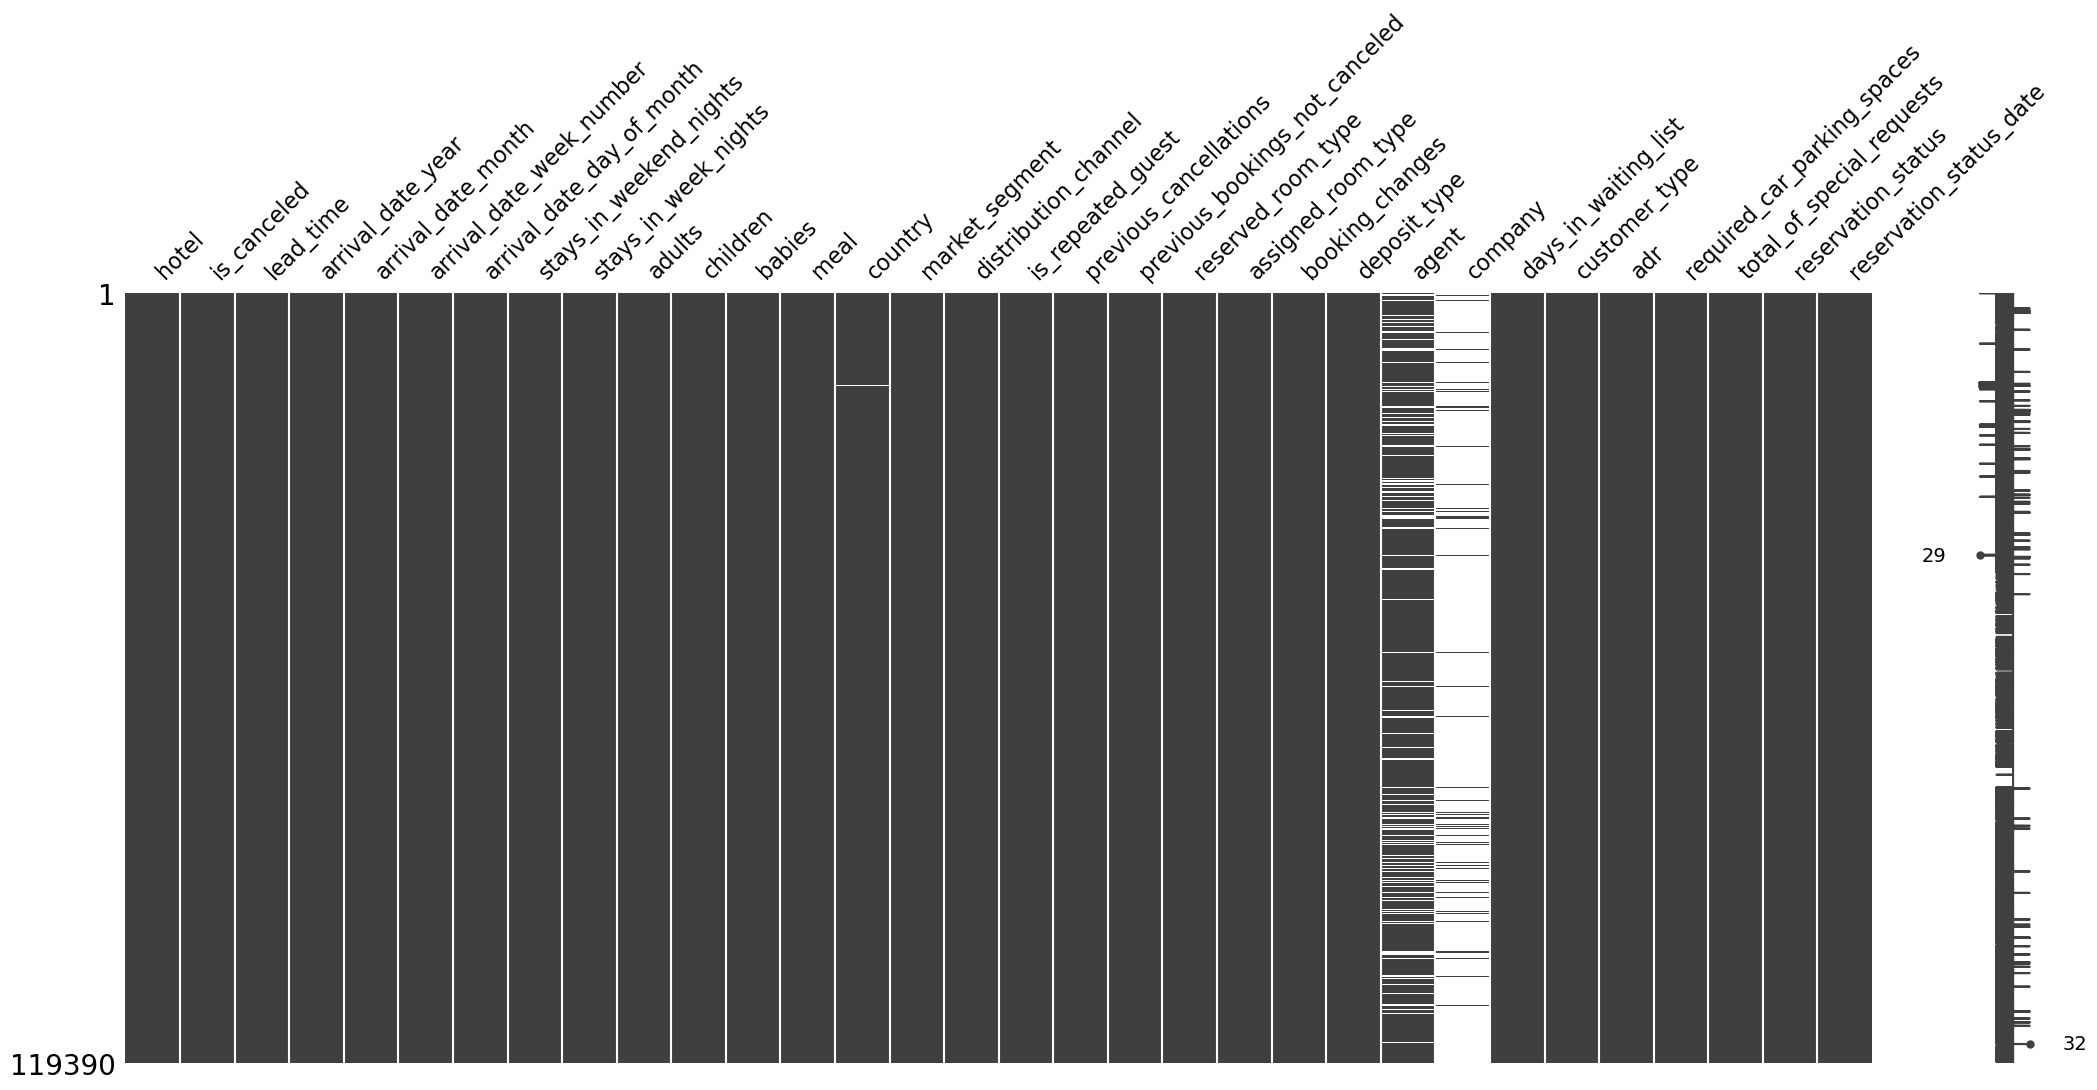

In [131]:
msno.matrix(df)

Temuan :    
Secara keseluruhan, meskipun missing values di kolom children dan country dapat dikelola, kolom agent memiliki jumlah nilai hilang yang signifikan yang perlu ditangani. Kolom company, dengan persentase nilai hilang yang sangat tinggi, kemungkinan besar akan dikeluarkan dari analisis lebih lanjut untuk menjaga integritas dataset.

## Data Duplicate

In [132]:
df.duplicated().sum()

31994

Dataset ini menunjukkan bahwa sekitar 26.8% dari total data awal merupakan duplikasi, yang bisa terjadi akibat kesalahan pencatatan atau duplikasi dalam sistem. Membersihkan duplikasi ini penting untuk memastikan analisis lebih akurat dan tidak bias akibat data redundan.

## Data Numerik

### Statistika Deskriptif

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [134]:
pd.set_option('display.max_colwidth', None)

listItem = []

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

df_num = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                                     data=listItem)

df_num

,Column Name,Number of Unique,Unique Value
0,is_canceled,2,"[0, 1]"
1,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, ...]"
2,arrival_date_year,3,"[2015, 2016, 2017]"
3,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
4,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
5,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
6,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35, 41]"
7,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"
8,children,5,"[0.0, 1.0, 2.0, 10.0, 3.0, nan]"
9,babies,5,"[0, 1, 2, 10, 9]"


### Distribusi Data & Outliers

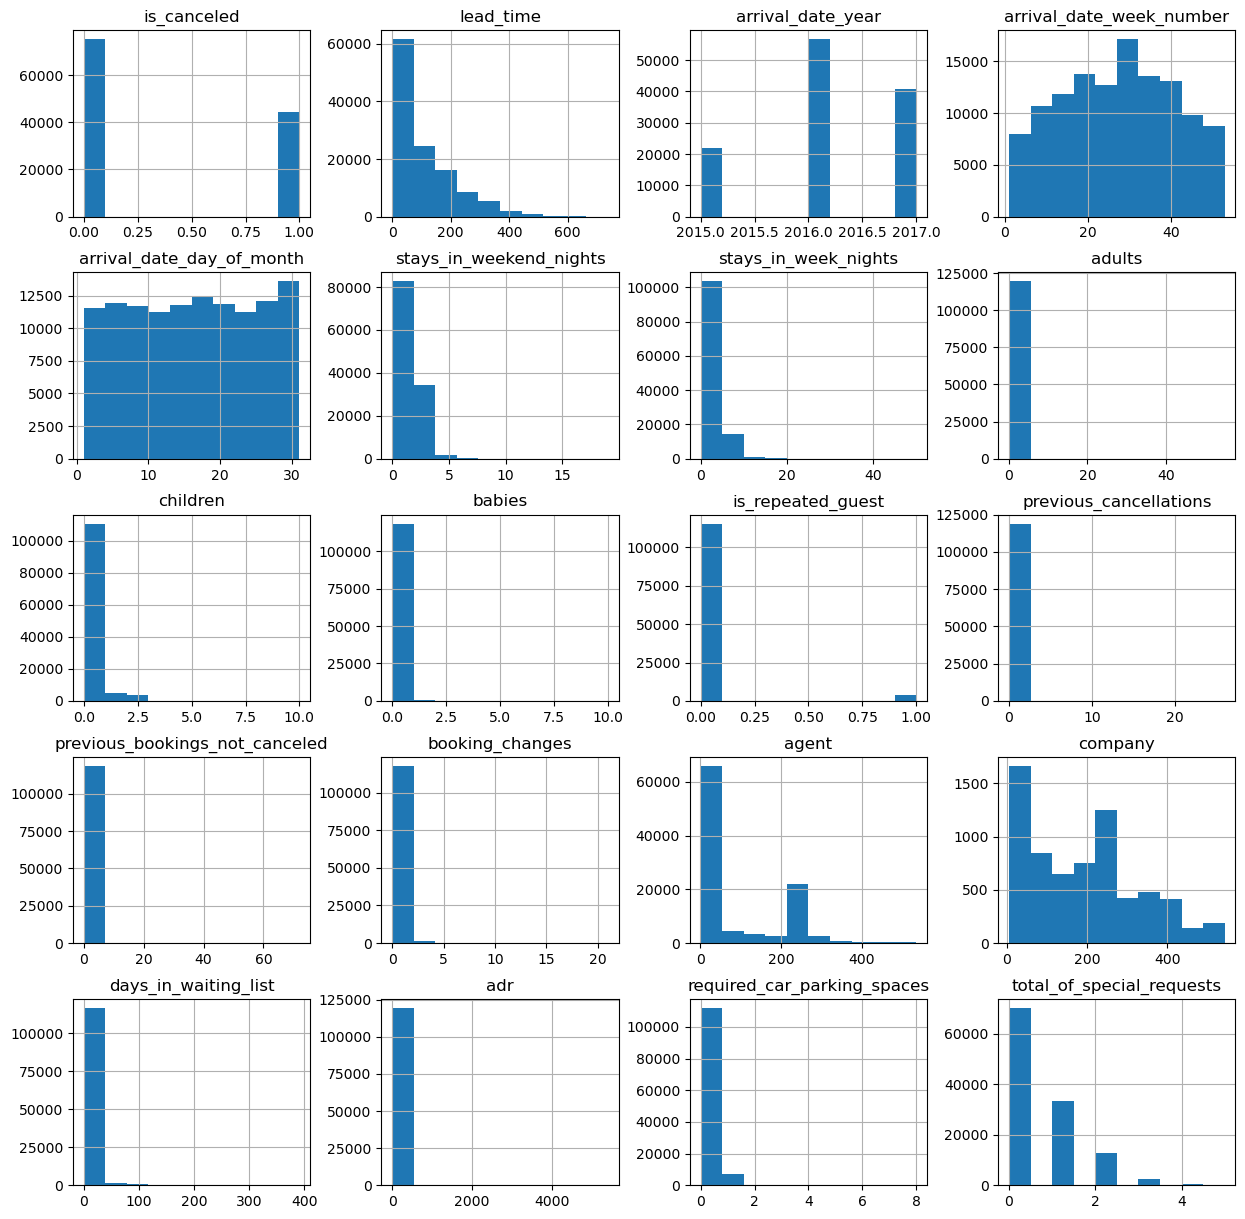

In [135]:
df.hist(figsize=(15, 15))
plt.show()

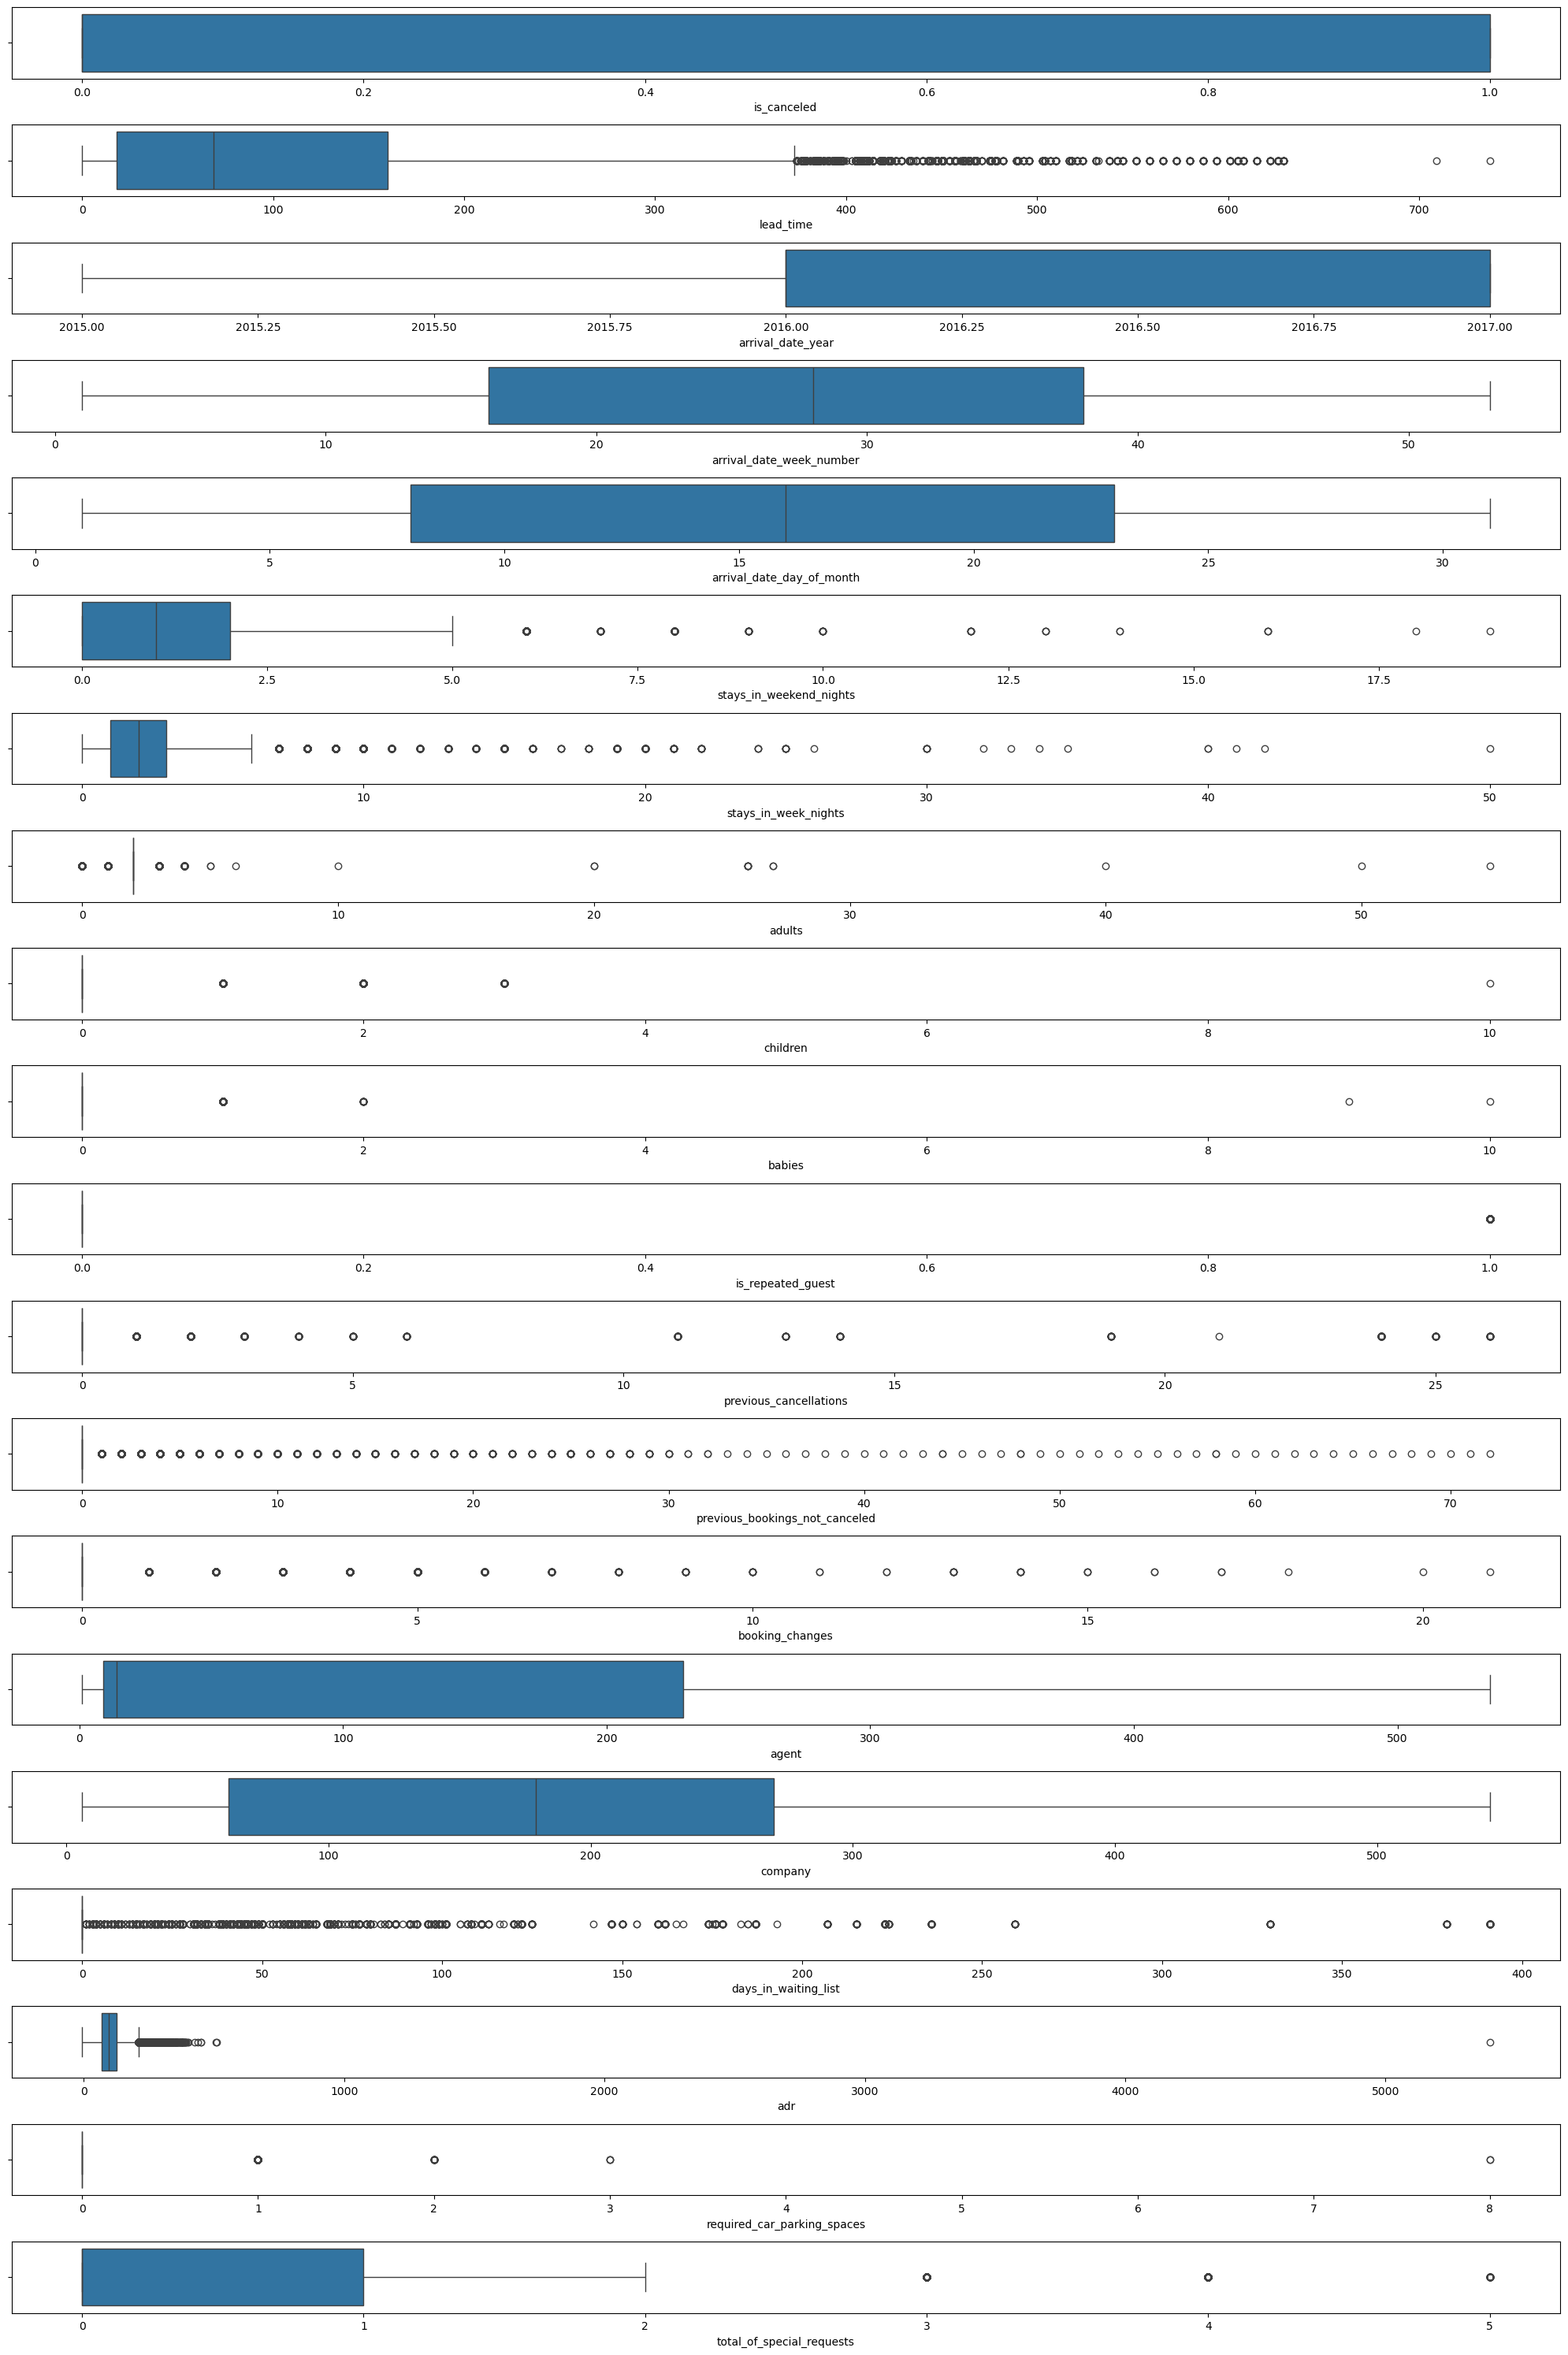

In [136]:
numerik = df.select_dtypes(include='number')

plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.4)

posisi = 1
for kolom in numerik.columns:
    plt.subplot(len(numerik.columns), 1, posisi)
    sns.boxplot(x=df[kolom])
    posisi += 1

plt.tight_layout()
plt.show()


In [137]:
import pandas as pd

numerik = df.select_dtypes(include='number')

Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)

IQR = Q3 - Q1

iqr_df = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR
})

display(iqr_df)


,Q1,Q3,IQR
is_canceled,0.00,1.0,1.00
lead_time,18.00,160.0,142.00
arrival_date_year,2016.00,2017.0,1.00
arrival_date_week_number,16.00,38.0,22.00
arrival_date_day_of_month,8.00,23.0,15.00
stays_in_weekend_nights,0.00,2.0,2.00
stays_in_week_nights,1.00,3.0,2.00
adults,2.00,2.0,0.00
children,0.00,0.0,0.00
babies,0.00,0.0,0.00


Dari boxplot yang ditampilkan dalam gambar, terdapat beberapa fitur yang memiliki outlier yang cukup signifikan. Berikut adalah kesimpulan mengenai outliers dan bagaimana pengaruhnya terhadap model machine learning:

**Kesimpulan Outliers**
1. **Fitur dengan Outliers yang Signifikan**:
   - **lead_time**: Banyak outlier di atas 500, menunjukkan beberapa pemesan melakukan booking hotel jauh sebelum tanggal check-in.
   - **stays_in_weekend_nights & stays_in_week_nights**: Beberapa outlier menunjukkan ada pelanggan yang menginap dalam jangka waktu yang jauh lebih lama dibandingkan kebanyakan pelanggan.
   - **adults, children, babies**: Outliers terlihat pada jumlah tamu yang sangat tinggi, menunjukkan pemesanan dalam jumlah yang tidak umum.
   - **previous_cancellations & previous_bookings_not_canceled**: Beberapa pelanggan memiliki riwayat pembatalan atau pemesanan yang jauh lebih banyak dibandingkan mayoritas pelanggan.
   - **days_in_waiting_list**: Outliers yang sangat tinggi menunjukkan bahwa beberapa pemesanan masuk daftar tunggu dalam waktu yang sangat lama.
   - **adr (Average Daily Rate)**: Beberapa nilai outlier yang ekstrem menunjukkan harga per malam yang sangat tinggi dibandingkan rata-rata.

2. **Fitur dengan Distribusi Relatif Normal**:
   - **arrival_date_year, arrival_date_week_number, arrival_date_day_of_month**: Tidak terdapat outlier yang mencolok pada fitur ini.
   - **required_car_parking_spaces & total_of_special_requests**: Walaupun ada beberapa outlier, dampaknya tidak sebesar fitur lainnya.

---

**Pengaruh Outliers terhadap Machine Learning**
1. **Overfitting**:  
   - Outliers dapat menyebabkan model belajar pola yang tidak umum dan tidak mencerminkan mayoritas data, yang bisa membuat model overfit terhadap nilai ekstrem tersebut.

2. **Kesalahan Prediksi**:  
   - Model berbasis regresi seperti **Linear Regression** atau **Logistic Regression** bisa sangat terpengaruh oleh outliers karena mereka menggunakan asumsi distribusi normal.
   - Model berbasis pohon keputusan seperti **Random Forest** atau **Gradient Boosting** lebih tahan terhadap outliers karena mereka membagi data ke dalam aturan yang lebih terpisah.

Kesimpulannya, outliers memiliki dampak signifikan pada machine learning, terutama pada model yang berbasis regresi atau distance-based. Oleh karena itu, strategi penanganan outliers harus disesuaikan dengan model yang digunakan dan sifat data yang dimiliki.

### Korelasi

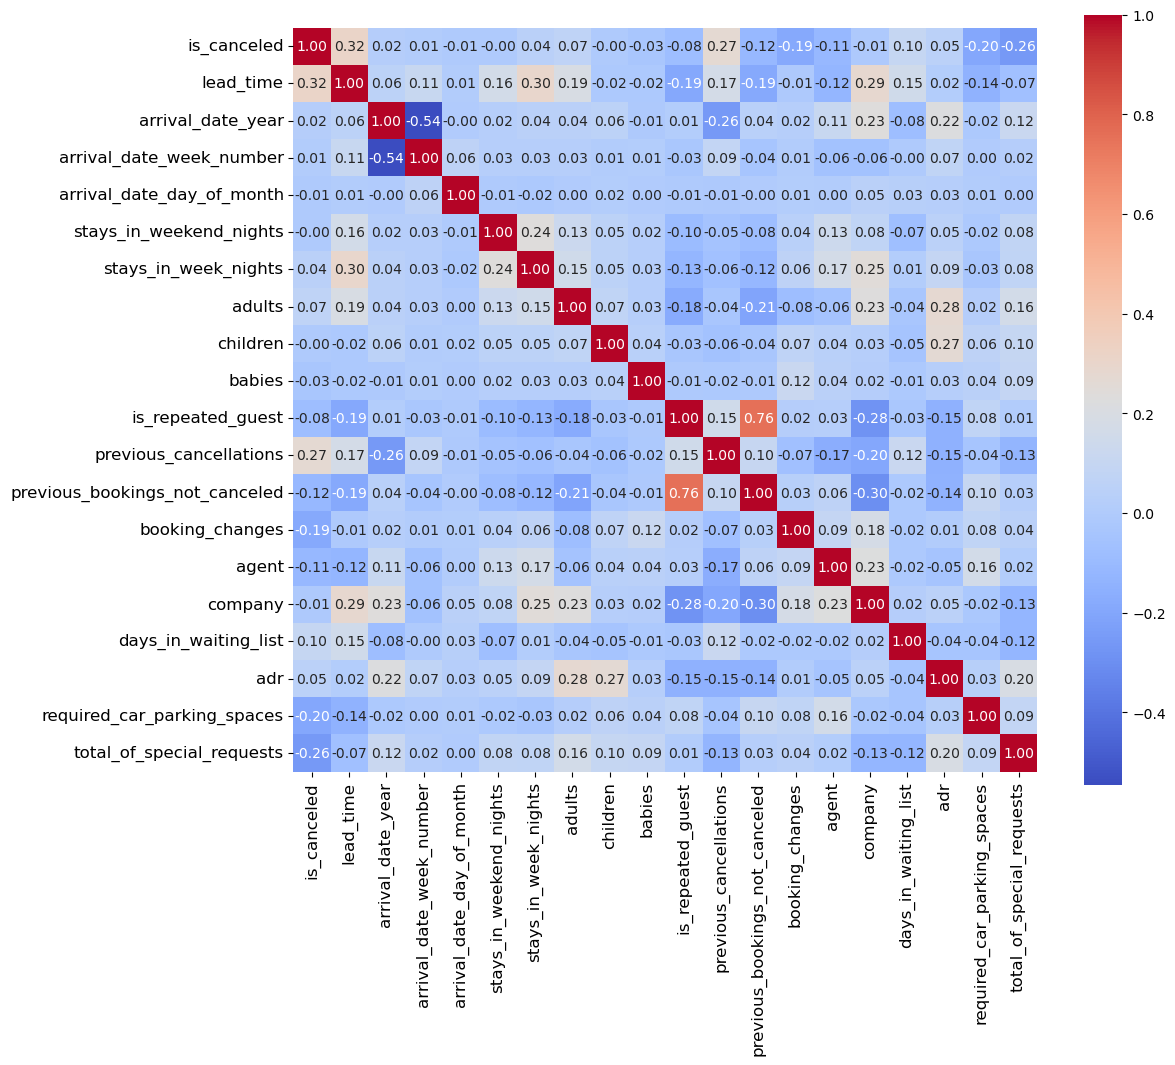

In [138]:
numerik = df.select_dtypes(include='number')

correlation_matrix = numerik.corr(method='spearman')

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, annot_kws={"size": 10})

plt.xticks(rotation=90, fontsize=12)

plt.yticks(fontsize=12)

plt.show()


#### Analisis Heatmap Korelasi Spearman

Heatmap ini menunjukkan korelasi Spearman antar variabel numerik. Korelasi Spearman digunakan karena tidak mengasumsikan data berdistribusi normal dan lebih cocok untuk data ordinal atau data dengan outlier. Berikut beberapa poin penting:

**Korelasi Kuat (0.6 - 1.0):**

* **`previous_cancellations` dan `previous_bookings_not_canceled` (0.76):** Korelasi positif yang sangat kuat. Ini menunjukkan bahwa tamu yang memiliki banyak pemesanan sebelumnya yang tidak dibatalkan juga memiliki riwayat pembatalan sebelumnya. Ini bisa mengindikasikan pola pemesanan tertentu, di mana beberapa tamu sering memesan dan membatalkan.
* **`is_repeated_guest` dan `previous_bookings_not_canceled` (0.76):** Korelasi positif yang kuat. Artinya, tamu yang merupakan pelanggan tetap cenderung memiliki pemesanan sebelumnya yang tidak dibatalkan. Ini bisa menjadi indikasi loyalitas pelanggan.

**Korelasi Lemah (0.2 - 0.39):**

* **`is_canceled` dan `lead_time` (-0.32):** Korelasi negatif lemah. Ini berarti semakin lama waktu antara pemesanan dan kedatangan, semakin kecil kemungkinan pembatalan terjadi.
* **`adr` (Average Daily Rate) dan `total_of_special_requests` (0.27):** Korelasi positif lemah. Ini menunjukkan bahwa tamu yang mengajukan lebih banyak permintaan khusus cenderung memiliki tarif harian rata-rata yang sedikit lebih tinggi.
* **`adr` dan `lead_time` (0.22):** Korelasi positif lemah. Ini berarti tarif harian rata-rata sedikit lebih tinggi untuk pemesanan dengan lead time yang lebih lama.
* **`required_car_parking_spaces` dan `is_canceled` (-0.20):** Korelasi negatif lemah. Artinya, pemesanan yang membutuhkan tempat parkir mobil sedikit lebih kecil kemungkinannya untuk dibatalkan.

**Korelasi Sangat Lemah atau Tidak Ada Korelasi (0 - 0.19):**

* Sebagian besar variabel lainnya menunjukkan korelasi yang sangat lemah atau tidak ada korelasi sama sekali. Ini berarti tidak ada hubungan linear yang jelas antara variabel-variabel tersebut.

**Kesimpulan:**

Meskipun ada beberapa korelasi yang menarik, penting untuk diingat bahwa korelasi tidak menyiratkan sebab-akibat. Analisis lebih lanjut diperlukan untuk memahami faktor-faktor yang mendasari hubungan ini. Korelasi yang kuat antara `is_repeated_guest` dan `previous_bookings_not_canceled` sangat menarik dan layak untuk diselidiki lebih lanjut.

### Multikolinearitas VIF

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [140]:
from statsmodels.tools.tools import add_constant

def calc_vif(df):
    df = df.select_dtypes(include=[np.number])
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    x = add_constant(df)

    vif_data = pd.DataFrame()
    vif_data['variables'] = x.columns
    vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif_data = vif_data[vif_data['variables'] != 'const']

    return vif_data

vif_results = calc_vif(df.drop(columns='is_canceled'))
vif_results_sorted = vif_results.sort_values(by='VIF', ascending=False)
vif_results_sorted

,variables,VIF
6,stays_in_week_nights,5.835424
2,arrival_date_year,5.668680
5,stays_in_weekend_nights,4.730392
3,arrival_date_week_number,4.438591
12,previous_bookings_not_canceled,2.982843
17,adr,2.764032
10,is_repeated_guest,2.732673
14,agent,2.305310
1,lead_time,2.144810
15,company,1.752163


Temuan :      

Dalam konteks model klasifikasi, VIF tetap relevan untuk mengidentifikasi multikolinearitas antar fitur, meskipun dampaknya lebih signifikan dalam regresi. Nilai VIF yang tinggi, seperti pada stays_in_week_nights (5.83) dan arrival_date_year (5.67), menunjukkan bahwa fitur-fitur tersebut mungkin memiliki hubungan linear yang kuat dengan fitur lain, yang dapat mengurangi efektivitas model dan menyebabkan redundansi informasi. Sebagian besar fitur memiliki VIF di bawah 3, yang menunjukkan multikolinearitas rendah. Sementara itu, babies dan days_in_waiting_list memiliki nilai NaN, kemungkinan karena kurangnya variasi dalam data atau adanya nilai konstan, yang dapat dipertimbangkan untuk dihapus atau ditangani sebelum pelatihan model.

## Data Kategorik

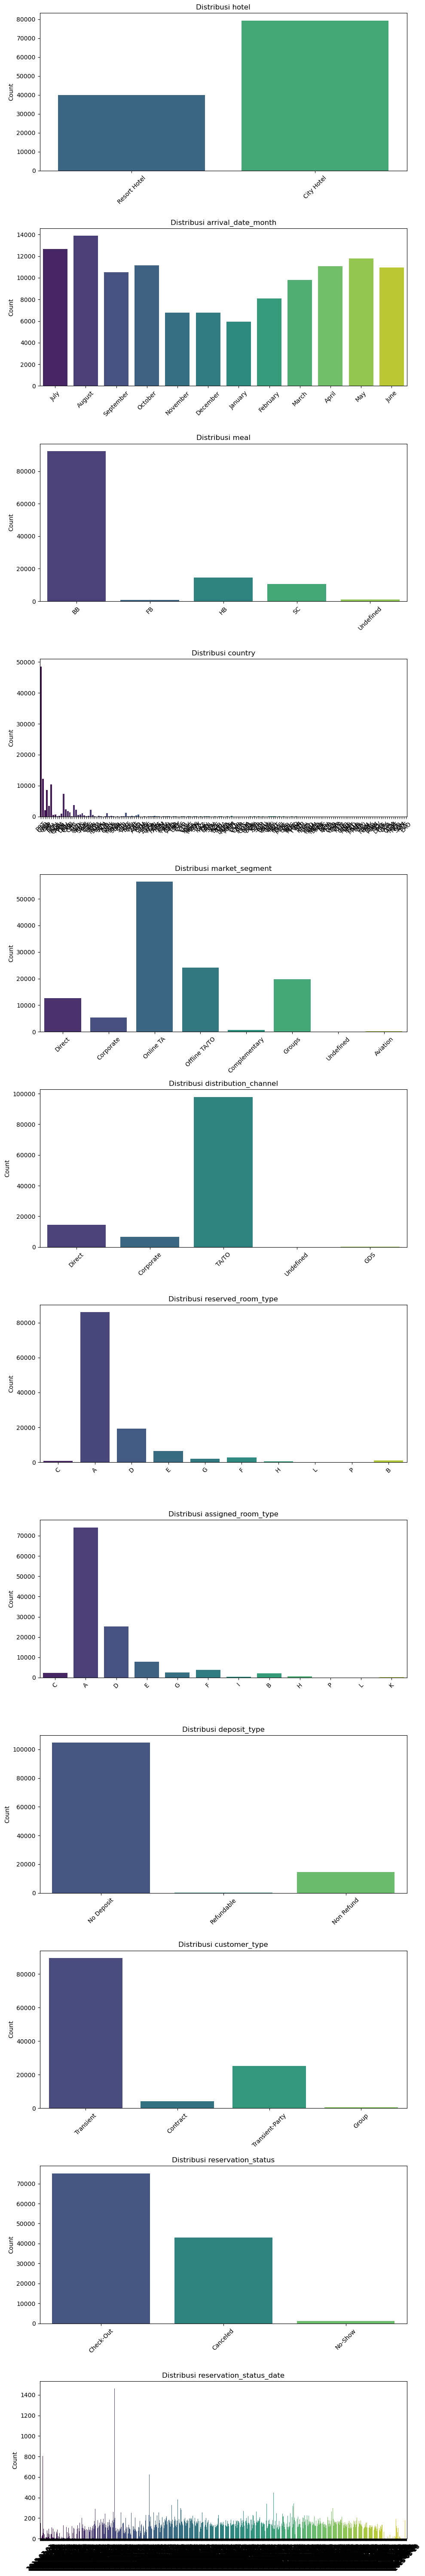

In [141]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(nrows=len(categorical_cols), figsize=(10, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()


### Statistika Deskriptif

In [142]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [143]:
pd.set_option('display.max_colwidth', None)

listItem = []

categoric_cols = df.select_dtypes(include=['object']).columns

for col in categoric_cols:
    listItem.append([col, df[col].nunique(), df[col].unique()])

df_cat = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                                     data=listItem)

df_cat

,Column Name,Number of Unique,Unique Value
0,hotel,2,"[Resort Hotel, City Hotel]"
1,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
2,meal,5,"[BB, FB, HB, SC, Undefined]"
3,country,177,"[PRT, GBR, USA, ESP, IRL, FRA, nan, ROU, NOR, OMN, ARG, POL, DEU, BEL, CHE, CN, GRC, ITA, NLD, DNK, RUS, SWE, AUS, EST, CZE, BRA, FIN, MOZ, BWA, LUX, SVN, ALB, IND, CHN, MEX, MAR, UKR, SMR, LVA, PRI, SRB, CHL, AUT, BLR, LTU, TUR, ZAF, AGO, ISR, CYM, ZMB, CPV, ZWE, DZA, KOR, CRI, HUN, ARE, TUN, JAM, HRV, HKG, IRN, GEO, AND, GIB, URY, JEY, CAF, CYP, COL, GGY, KWT, NGA, MDV, VEN, SVK, FJI, KAZ, PAK, IDN, LBN, PHL, SEN, SYC, AZE, BHR, NZL, THA, DOM, MKD, MYS, ARM, JPN, LKA, CUB, CMR, BIH, MUS, COM, ...]"
4,market_segment,8,"[Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Undefined, Aviation]"
5,distribution_channel,5,"[Direct, Corporate, TA/TO, Undefined, GDS]"
6,reserved_room_type,10,"[C, A, D, E, G, F, H, L, P, B]"
7,assigned_room_type,12,"[C, A, D, E, G, F, I, B, H, P, L, K]"
8,deposit_type,3,"[No Deposit, Refundable, Non Refund]"
9,customer_type,4,"[Transient, Contract, Transient-Party, Group]"


### Penjelasan Variabel Data Kategorik

#### meal

| **Nilai** | **Penjelasan**                                                                                     |
|-----------|----------------------------------------------------------------------------------------------------|
| **BB**    | Bed and Breakfast: Tamu mendapatkan sarapan sebagai bagian dari paket pemesanan.                  |
| **FB**    | Full Board: Tamu mendapatkan semua makanan (sarapan, makan siang, dan makan malam) selama menginap. |
| **HB**    | Half Board: Tamu mendapatkan sarapan dan satu makanan lainnya (makan siang atau makan malam).     |
| **SC**    | Self Catering: Tamu tidak mendapatkan makanan, tetapi memiliki fasilitas untuk memasak sendiri.    |
| **Undefined** | Tidak ada informasi mengenai jenis makanan yang disediakan.                                      |


#### market_segment
| **Nilai**       | **Penjelasan**                                                                                     |
|------------------|----------------------------------------------------------------------------------------------------|
| **Direct**       | Pemesanan yang dilakukan langsung oleh tamu ke hotel tanpa perantara.                             |
| **Corporate**    | Pemesanan yang dilakukan oleh perusahaan untuk karyawan atau acara bisnis.                        |
| **Online TA/TO** | Pemesanan melalui agen perjalanan online atau tour operator.                                      |
| **Complementary**| Pemesanan yang dilakukan sebagai bagian dari paket atau promosi khusus.                           |
| **Groups**       | Pemesanan untuk kelompok besar, seperti rombongan atau acara.                                     |
| **Undefined**    | Kategori yang tidak terdefinisi atau tidak termasuk dalam kategori yang ada.                      |
| **Aviation**     | Pemesanan yang terkait dengan maskapai penerbangan atau perjalanan udara.                         |


#### distrbution_channel
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **Direct**           | Pemesanan yang dilakukan langsung oleh tamu ke hotel tanpa perantara.                             |
| **Corporate**        | Pemesanan yang dilakukan oleh perusahaan atau organisasi untuk karyawan mereka.                    |
| **Online TA/TO**     | Pemesanan melalui agen perjalanan online atau tour operator.                                      |
| **GDS**    | Pemesanan melalui Global Distribution System, sebuah jaringan yang digunakan oleh agen perjalanan untuk memesan tiket pesawat, kamar hotel, dan layanan perjalanan lainnya.         |
| **Undefined**        | Kategori yang tidak terdefinisi atau tidak termasuk dalam kategori yang ada.                      |


#### deposit_type
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **No Deposit**       | Tidak ada uang muka yang diperlukan untuk pemesanan.                                              |
| **Refundable**       | Uang muka yang dibayarkan dapat dikembalikan jika pemesanan dibatalkan sesuai dengan kebijakan hotel. |
| **Non Refund**       | Uang muka yang dibayarkan tidak dapat dikembalikan jika pemesanan dibatalkan.                     |


#### customer_type
| **Nilai**            | **Penjelasan**                                                                                     |
|----------------------|----------------------------------------------------------------------------------------------------|
| **Transient**        | Tamu yang melakukan pemesanan untuk menginap dalam waktu singkat tanpa kontrak jangka panjang.    |
| **Contract**         | Tamu yang melakukan pemesanan berdasarkan kontrak dengan hotel, biasanya untuk perusahaan atau grup. |
| **Group**            | Tamu yang melakukan pemesanan sebagai bagian dari kelompok atau acara tertentu.                    |
| **Transient-Party**  | Tamu yang melakukan pemesanan untuk acara khusus, seperti pernikahan atau konferensi.             |


#### reservation_status
| **Nilai**        | **Penjelasan**                                                                                             |
|-----------------|---------------------------------------------------------------------------------------------------------|
| **Check-Out**   | Tamu telah check-out dari hotel dan menyelesaikan masa inapnya.                                         |
| **Canceled**    | Pemesanan telah dibatalkan oleh tamu atau hotel.                                                       |
| **No-Show**     | Tamu tidak datang ke hotel pada tanggal check-in yang dijadwalkan tanpa melakukan pembatalan sebelumnya. |


## Kesimpulan Data Understanding

1. Struktur Dataset  
- Dataset terdiri dari **119.390 baris dan 32 kolom**.  
- Terdapat **12 kolom kategorik** dan **20 kolom numerik**.  
- Beberapa kolom memiliki tipe data yang kurang sesuai, seperti `reservation_status_date`, `agent`, dan `children`, yang memerlukan pemeriksaan lebih lanjut pada tahap data cleaning.  

2. Kualitas Data  
* Missing Values  
- Terdapat missing values pada beberapa kolom, termasuk `children`, `country`, dan `agent`.  
- Kolom `agent` memiliki jumlah nilai hilang yang signifikan sehingga perlu penanganan lebih lanjut.  
- Kolom `company` memiliki persentase nilai hilang yang sangat tinggi, sehingga kemungkinan besar akan dikeluarkan dari analisis untuk menjaga integritas data.  

* Duplikasi Data  
- Sekitar **26,8% dari total data awal merupakan duplikasi**.  
- Duplikasi ini bisa terjadi akibat kesalahan pencatatan atau sistem, sehingga perlu dibersihkan agar analisis lebih akurat dan tidak bias akibat data redundan.  


Secara keseluruhan, dataset ini memiliki informasi yang berharga untuk analisis, tetapi perlu dilakukan **Data Cleaning** untuk menangani missing values, tipe data yang tidak sesuai, serta duplikasi agar hasil analisis lebih valid dan dapat diandalkan. 


# Data Cleaning

## Handling Data Duplikat

In [144]:
df.duplicated().sum()

31994

Terdapat 31.994 data duplikat dari total 119.390 data (~26.8%). Menghapus duplikat penting karena:

1. Mencegah Bias Model – Duplikasi dapat menyebabkan model terlalu condong ke pola tertentu, mengurangi generalisasi ke data baru.
2. Menghindari Overfitting – Model bisa belajar pola yang berulang secara berlebihan, menyebabkan performa buruk pada data baru.
3. Akurasi Analisis – Statistik dan insight bisa bias jika satu reservasi dihitung berkali-kali.


In [145]:
df = df.drop_duplicates()

## Handling Missing Values

#### Kolom Company

In [146]:
df = df.drop(columns='company')

Kolom company dihapus karena memiliki missing values yang sangat besar, yaitu 94.307%. Dengan jumlah data yang hilang sebesar itu, informasi dalam kolom ini menjadi tidak signifikan dan kurang dapat diandalkan dalam analisis. Selain itu, mempertahankan kolom dengan banyak missing values dapat menambah noise tanpa memberikan manfaat yang jelas, sehingga lebih baik dihapus untuk menyederhanakan dataset dan meningkatkan efisiensi pemrosesan.

#### Kolom Agent

In [147]:
df['agent'].fillna(0, inplace=True)

Catatan :    

Nilai NaN pada kolom agent diisi dengan 0, karena NaN kemungkinan besar menunjukkan bahwa pemesanan dilakukan tanpa melalui agen. Dengan menggantinya menjadi 0, saya memastikan data lebih bersih dan tidak ada nilai kosong yang bisa mengganggu analisis. Selain itu, pendekatan ini membuat interpretasi lebih jelas, di mana angka 0 dapat diartikan sebagai pemesanan langsung tanpa perantara.

#### Kolom Children

In [148]:
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


Mayoritas tamu melakukan reservasi tanpa anak (children = 0), maka ada kemungkinan besar bahwa missing values sebenarnya juga mewakili tamu tanpa anak, bukan angka lain seperti 1 atau 2.

In [149]:
df['children'] = df['children'].fillna(0)

#### Kolom Country

In [150]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

Kolom country diisi dengan modus karena datanya bersifat kategorikal, sehingga mean atau median tidak relevan. Mayoritas pelanggan berasal dari negara Portugal (PRT), sehingga masuk akal untuk mengasumsikan missing values berasal dari negara yang sama. Imputasi dengan modus juga mencegah kehilangan data dan menjaga distribusi tetap konsisten tanpa menambah bias yang signifikan.

## Handling Data Anomali

### Kolom Meal

In [151]:
df[df['meal']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,313.0,65,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3110,Resort Hotel,0,62,2015,November,47,18,2,4,2,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,313.0,0,Transient-Party,69.00,0,0,Check-Out,2015-11-24
3114,Resort Hotel,0,62,2015,November,47,18,2,4,1,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,313.0,0,Transient-Party,49.00,0,0,Check-Out,2015-11-24
3118,Resort Hotel,0,105,2015,November,47,18,2,4,2,0.0,0,Undefined,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,313.0,65,Transient-Party,71.00,0,0,Check-Out,2015-11-24
3120,Resort Hotel,0,105,2015,November,47,18,2,4,1,0.0,0,Undefined,ESP,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,313.0,65,Transient-Party,18.50,0,0,Check-Out,2015-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39870,Resort Hotel,0,81,2017,August,35,27,2,2,2,2.0,0,Undefined,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,351.00,1,2,Check-Out,2017-08-31
39874,Resort Hotel,0,191,2017,August,34,24,2,5,2,1.0,0,Undefined,PRT,Offline TA/TO,TA/TO,0,0,0,A,I,1,No Deposit,196.0,0,Transient,169.98,1,2,Check-Out,2017-08-31
39875,Resort Hotel,0,29,2017,August,35,31,0,1,2,1.0,0,Undefined,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,96.0,0,Group,204.00,1,2,Check-Out,2017-09-01
39906,Resort Hotel,0,8,2017,August,35,30,0,2,2,0.0,0,Undefined,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,250.0,0,Transient,266.06,1,0,Check-Out,2017-09-01


Nilai "Undefined" pada kolom meal dengan "SC" (Self-Catering) karena pelanggan dianggap tidak mengambil paket makan. Hal ini menunjukkan bahwa "Undefined" sama dengan "SC" Dengan cara ini, data menjadi lebih bersih dan konsisten tanpa kategori yang ambigu. Selain itu, ini membantu dalam analisis karena semua entri memiliki label yang jelas, sehingga tidak ada informasi yang hilang atau menyebabkan kebingungan saat pemrosesan data.

In [152]:
df['meal'] = df['meal'].replace('Undefined', 'SC')

### Kolom market_segment

In [153]:
df = df[df['market_segment'] != 'Undefined']

### Kolom distribution_channel

In [154]:
df = df[df['distribution_channel'] != 'Undefined']

Catatan :

1. Terdapat values 'Undefined' pada beberapa kolom. Untuk 'Undefined' dalam kolom Meal, dapat diasumsikan bahwa 'Undefined' adalah tidak mengambil untuk paket makan. Jadi, handling yang dilakukan adalah menggantik 'Undefined' pada meal menjadi 'SC' atau Self-Catering.
2. 'Undefined' pada kolom distribution channel dan market segment tidak mendefinisikan apapun. Karena jumlahnya juga sangat sedikit, langkah yang diambil adalah menghapus data dengan values 'Undefined'.

### Kolom lead_time

In [155]:
df[df['lead_time'] > 700]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,0.0,0,HB,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,0.0,0,Transient,68.0,0,0,Check-Out,2016-03-24


In [156]:
df = df[df['lead_time'] <= 700]

Catatan :     
Lead Time dibatasi hingga maksimal 700 hari sesuai dengan ketentuan yang ditetapkan oleh salah satu platform pemesanan. Pembatasan ini diterapkan untuk memastikan kesesuaian dengan kebijakan reservasi yang berlaku.

### Kolom adr

In [157]:
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [158]:
df = df[df['adr'] >= 0]

Menghapus data dengan nilai adr (Average Daily Rate) kurang dari atau sama dengan 0 karena nilai tersebut tidak valid dalam konteks bisnis perhotelan. ADR seharusnya merepresentasikan pendapatan per kamar per malam, sehingga nilai negatif atau nol tidak masuk akal kecuali terjadi kesalahan pencatatan atau anomali seperti promosi khusus. Dengan menghapus data ini, analisis menjadi lebih akurat dan tidak bias akibat nilai yang tidak realistis.

In [159]:
df[(df['adr'] == 0 ) & (df['reservation_status'] == 'Check-Out')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
118762,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,0.0,0,Transient,0.0,0,3,Check-Out,2017-08-25
118963,City Hotel,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-27
119102,City Hotel,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


In [160]:
df = df[~((df['adr'] == 0) & (df['market_segment'] == 'Complementary'))]

Catatan :     

**Nilai `adr` nol dengan status *Check-Out*:** Ada data dengan nilai `adr` sama dengan 0 tetapi berstatus *Check-Out*.  Ini mengindikasikan adanya keanehan dalam data.  Perlu diselidiki lebih lanjut mengapa ada tamu yang melakukan *check-out* tetapi tidak dikenakan biaya (`adr` = 0). Kemungkinan ada kesalahan input data atau ada kondisi khusus yang tidak tercatat.

Kesimpulannya, kolom `adr` memerlukan pembersihan data lebih lanjut. Outlier ekstrem sebaiknya dihapus atau ditangani dengan metode yang tepat (misalnya, *winsorizing* atau *trimming*). Sementara itu, data dengan nilai `adr` yang tidak wajar (nol untuk *Check-Out* dan satu untuk *No-Show*) perlu diverifikasi dan dikoreksi jika memang terdapat kesalahan input.


### Total stays == 0 tetapi check-out

In [161]:
print(df[['stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status']].dtypes)

df['stays_in_weekend_nights'].fillna(0, inplace=True)
df['stays_in_week_nights'].fillna(0, inplace=True)

df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(int)
df['stays_in_week_nights'] = df['stays_in_week_nights'].astype(int)

filtered_df = df[(df['stays_in_weekend_nights'] + df['stays_in_week_nights'] == 0) & (df['reservation_status'] == 'Check-Out') & (df['deposit_type'] == 'No Deposit')]

frekuensi_kasus = len(filtered_df)

print(f"Frekuensi kasus di mana stays_in_weekend_nights + stays_in_week_nights == 0 dan reservation_status adalah 'check-out': {frekuensi_kasus}")

print("\nBeberapa baris data yang memenuhi kondisi:")
filtered_df

stays_in_weekend_nights     int64
stays_in_week_nights        int64
reservation_status         object
dtype: object
Frekuensi kasus di mana stays_in_weekend_nights + stays_in_week_nights == 0 dan reservation_status adalah 'check-out': 610

Beberapa baris data yang memenuhi kondisi:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-07
197,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,E,0,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2017-08-14
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23


In [162]:
df['total_night'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df = df.drop(df[df['total_night'] == 0].index)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


Catatan :    

Data dengan total malam inap stays_in_weekend_nights + stays_in_week_nights == 0 tetapi memiliki status Check-Out sebaiknya dihapus. Secara logis, tamu yang tidak menginap seharusnya tidak memiliki status Check-Out, sehingga kemungkinan besar data ini merupakan kesalahan pencatatan atau kasus yang seharusnya dianggap sebagai canceled. Untuk menghindari bias dalam analisis, lebih baik jika data tersebut dihapus dari dataset.

### Pembatasan Adults, Children, dan Babies

In [163]:
df = df[(df['adults'] <= 4) & (df['children'] <= 3) & (df['babies'] <= 2)]

Catatan :    
- Batasi jumlah tamu maksimum (misalnya, 4 orang dewasa, 3 anak-anak, dan 2 bayi).
- Batas ini sesuai dengan kebijakan hotel yang umum, di mana kamar biasanya dirancang untuk 2-4 orang dewasa.


In [164]:
df_filtered = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

In [165]:
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,3
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,3
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,5
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,6
31765,Resort Hotel,0,31,2016,December,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,0.0,0,Transient,28.00,1,0,Check-Out,2017-01-06,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,2.0,0,BB,GBR,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-07-31,4
117274,City Hotel,0,276,2017,July,31,30,2,1,0,2.0,0,BB,DEU,Online TA,TA/TO,0,0,0,B,B,1,No Deposit,9.0,0,Transient,93.64,0,2,Check-Out,2017-08-02,3
117303,City Hotel,0,291,2017,July,30,29,2,2,0,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,B,A,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-08-02,4
117453,City Hotel,0,159,2017,July,31,31,1,3,0,2.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0,Transient,121.88,0,1,Check-Out,2017-08-04,4


In [166]:
df = df[df['adults'] != 0]

Catatan :     

Baris data dengan adults == 0 dihapus karena tidak masuk akal jika ada reservasi tanpa orang dewasa. Kehadiran nilai nol di kolom ini kemungkinan merupakan kesalahan pencatatan atau data yang tidak valid.

### required_car_parking_spaces > 2

In [167]:
df[df['required_car_parking_spaces'] >= 3 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night
29045,Resort Hotel,0,26,2017,March,11,14,0,5,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,I,1,No Deposit,0.0,0,Transient-Party,40.00,8,1,Check-Out,2017-03-19,5
29046,Resort Hotel,0,138,2017,March,12,19,2,2,2,0.0,0,HB,AUT,Direct,Corporate,1,0,2,E,F,1,No Deposit,0.0,122,Transient-Party,80.00,8,0,Check-Out,2017-03-23,4
38117,Resort Hotel,0,205,2017,June,26,26,3,10,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,2,No Deposit,250.0,0,Transient,111.00,3,0,Check-Out,2017-07-09,13
102762,City Hotel,0,13,2016,December,50,5,1,0,1,0.0,0,BB,NLD,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,96.00,3,0,Check-Out,2016-12-06,1
110812,City Hotel,0,30,2017,April,17,29,2,1,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient-Party,153.33,3,2,Check-Out,2017-05-02,3


In [168]:
df = df[df['required_car_parking_spaces'] <= 3]

Catatan :     

Baris data dengan jumlah required_car_parking_spaces lebih dari 3 dihapus karena dianggap tidak masuk akal. Dalam konteks pemesanan hotel, sangat jarang ada tamu yang membutuhkan lebih dari 3 tempat parkir untuk satu pemesanan. Keberadaan nilai yang tidak wajar seperti ini dapat mengganggu analisis dan menyebabkan anomali dalam model machine learning. Oleh karena itu, data tersebut lebih baik dihapus untuk menjaga kualitas dataset.

### Menghapus tipe kamar L & P (Menyebabkan Eror Pada Model)


In [169]:
df = df[df['assigned_room_type'] != 'L']

In [170]:
df = df[df['assigned_room_type'] != 'P']

Tipe kamar L dan P dihapus karena jumlahnya hanya satu. Keberadaan kategori dengan jumlah 1 dapat mengganggu proses machine learning.

### Konversi Tipe Data

In [171]:
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [172]:
# df.to_csv('Clean_hotell.csv')



# Kesimpulan Data Cleaning

1. Penanganan Missing Values  
- Missing values pada kolom `children` dan `country` telah diatasi dengan metode yang sesuai.  
- Kolom `agent` memiliki banyak nilai hilang dan telah ditangani agar tidak mengganggu analisis.  
- Kolom `company` dihapus karena memiliki persentase missing values yang sangat tinggi, sehingga tidak memberikan kontribusi signifikan terhadap analisis.  

2. Penanganan Nilai "Undefined"
- Kolom `meal`: Nilai *Undefined* digantikan dengan *SC (Self-Catering)* karena dianggap pelanggan tidak mengambil paket makan.  
- Kolom `distribution_channel` dan `market_segment`: Data dengan nilai *Undefined* dihapus karena tidak memiliki makna yang jelas dan jumlahnya sedikit.  

3. Penanganan Duplikasi  
- Sebanyak **26,8% data duplikat** telah dihapus untuk memastikan analisis lebih akurat dan tidak bias.  

4. Pembatasan dan Penghapusan Nilai yang Tidak Valid  
- **Lead Time** dibatasi hingga maksimal **700 hari** sesuai kebijakan platform pemesanan untuk menjaga relevansi data.  
- **ADR (Average Daily Rate) ≤ 0** dihapus karena tidak valid dalam bisnis perhotelan, kecuali ada kondisi khusus yang perlu diselidiki lebih lanjut.  
- **Nilai ADR nol dengan status *Check-Out***: Perlu investigasi lebih lanjut, karena seharusnya tamu yang *Check-Out* memiliki biaya menginap.  
- **Outlier ekstrem pada ADR** ditangani dengan metode yang sesuai seperti *winsorizing* atau *trimming* untuk menjaga distribusi data.  

5. Koreksi dan Penghapusan Data Tidak Logis  
- **Reservasi tanpa malam inap (`stays_in_weekend_nights + stays_in_week_nights == 0`) tetapi berstatus *Check-Out*** dihapus karena kemungkinan merupakan kesalahan pencatatan.  
- **Jumlah tamu dibatasi** maksimal **4 dewasa, 3 anak-anak, dan 2 bayi** sesuai dengan kebijakan hotel umum.  
- **Reservasi dengan `adults == 0`** dihapus karena tidak masuk akal jika tidak ada orang dewasa dalam pemesanan kamar.  
- **Data dengan `required_car_parking_spaces > 3`** dihapus karena secara 

6. Perbaikan Tipe Data  
- Beberapa kolom yang memiliki tipe data tidak sesuai, seperti `reservation_status_date`, `agent`, dan `children`, telah dikonversi ke tipe data yang lebih tepat.  


# Exploratory Data Analysis

## Korelasi Terhadap Variabel Target

In [173]:
df_copy = df.copy()

numerik = df_copy.select_dtypes(include=['number'])

correlation_matrix = numerik.corr(method='spearman')

is_canceled_correlation = correlation_matrix['is_canceled']

sorted_correlation = is_canceled_correlation.sort_values(ascending=False)

print(sorted_correlation)

is_canceled                       1.000000
lead_time                         0.222746
adr                               0.136255
previous_cancellations            0.130045
total_night                       0.096898
stays_in_week_nights              0.088881
adults                            0.088801
arrival_date_year                 0.086546
children                          0.060248
stays_in_weekend_nights           0.054619
agent                             0.025469
days_in_waiting_list              0.014930
arrival_date_day_of_month         0.005254
arrival_date_week_number          0.001700
babies                           -0.020835
is_repeated_guest                -0.081902
previous_bookings_not_canceled   -0.102144
booking_changes                  -0.124033
total_of_special_requests        -0.128997
required_car_parking_spaces      -0.187919
Name: is_canceled, dtype: float64


#### Interpretasi Angka Korelasi

1. **Korelasi Positif**:
   - **lead_time (0.222740)**: Ada hubungan positif yang moderat antara `lead_time` dan `is_canceled`. Ini berarti semakin lama waktu antara pemesanan dan kedatangan, semakin besar kemungkinan pemesanan dibatalkan.
   - **adr (0.136268)**: Ada hubungan positif yang lemah antara `adr` (Average Daily Rate) dan `is_canceled`. Ini menunjukkan bahwa tarif harian yang lebih tinggi mungkin sedikit berhubungan dengan peningkatan pembatalan.
   - **previous_cancellations (0.130047)**: Hubungan positif yang lemah menunjukkan bahwa jika seorang tamu sebelumnya telah membatalkan, mereka mungkin lebih cenderung membatalkan lagi.

2. **Korelasi Negatif**:
   - **required_car_parking_spaces (-0.187941)**: Ada hubungan negatif yang moderat, menunjukkan bahwa semakin banyak tempat parkir yang dibutuhkan, semakin kecil kemungkinan pemesanan dibatalkan. Ini bisa berarti bahwa tamu yang membutuhkan parkir lebih cenderung untuk tetap melakukan pemesanan.
   - **total_of_special_requests (-0.128993)**: Hubungan negatif yang lemah menunjukkan bahwa semakin banyak permintaan khusus yang diajukan, semakin kecil kemungkinan pemesanan dibatalkan.
   - **booking_changes (-0.124055)** → Hubungan negatif lemah, menunjukkan bahwa semakin banyak perubahan pemesanan, semakin kecil kemungkinan pembatalan.

3. **Korelasi Rendah**:
   - arrival_date_day_of_month (0.005252), arrival_date_week_number (0.001718), dan babies (-0.020834) memiliki korelasi yang sangat rendah dan tidak memiliki pengaruh yang berarti terhadap pembatalan.

### Kesimpulan
- Faktor yang Meningkatkan Kemungkinan Pembatalan:
lead_time, adr, dan previous_cancellations memiliki korelasi positif yang cukup mencolok terhadap pembatalan.`is_repeated_guest` menunjukkan hubungan negatif yang menarik.

- Faktor yang Mengurangi Kemungkinan Pembatalan:
required_car_parking_spaces, total_of_special_requests, dan booking_changes memiliki korelasi negatif yang berarti pemesanan dengan fitur-fitur ini lebih jarang dibatalkan.

Pada analisis ini, kita akan mencari faktor dan penyebab terjadinya pembatalan pemesanan hotel berdasarkan berbagai karakteristik dalam dataset.

1. Apakah faktor waktu berpengaruh terhadap pembatalan pemesanan hotel?
- Apakah musim atau bulan tertentu memiliki tingkat pembatalan lebih tinggi?

2. Bagaimana pengaruh karakteristik pemesan terhadap pembatalan pemesanan hotel?
- Apakah pelanggan yang pernah membatalkan pesanan sebelumnya lebih cenderung membatalkan lagi?
- Bagaimana perbedaan tingkat pembatalan antara pelanggan yang merupakan *repeated guest* dan pelanggan baru?
- Bagaimana pengaruh jumlah orang dalam satu pemesanan (*adults, children, babies*) terhadap pembatalan?

3. Bagaimana pengaruh tipe pemesanan dan pembayaran terhadap tingkat pembatalan?
- Apakah ada perbedaan tingkat pembatalan antara jenis *deposit_type* yang berbeda?
- Bagaimana peran *market_segment* dan *distribution_channel* dalam tingkat pembatalan pemesanan hotel?

4. Bagaimana fasilitas dan layanan hotel mempengaruhi pembatalan?
- Apakah ada hubungan antara jenis makanan yang dipesan (*meal*) dengan kemungkinan pembatalan?
- Bagaimana pengaruh tipe kamar yang dipesan (*reserved_room_type* dan *assigned_room_type*) terhadap tingkat pembatalan?
- Apakah permintaan khusus pelanggan (*total_of_special_requests*) berpengaruh terhadap kemungkinan pembatalan?

5. Bagaimana faktor eksternal mempengaruhi pembatalan pemesanan hotel?
- Apakah negara asal pelanggan (*country*) mempengaruhi tingkat pembatalan?
- Bagaimana pengaruh jumlah tempat parkir yang dipesan (*required_car_parking_spaces*) terhadap pembatalan pemesanan?


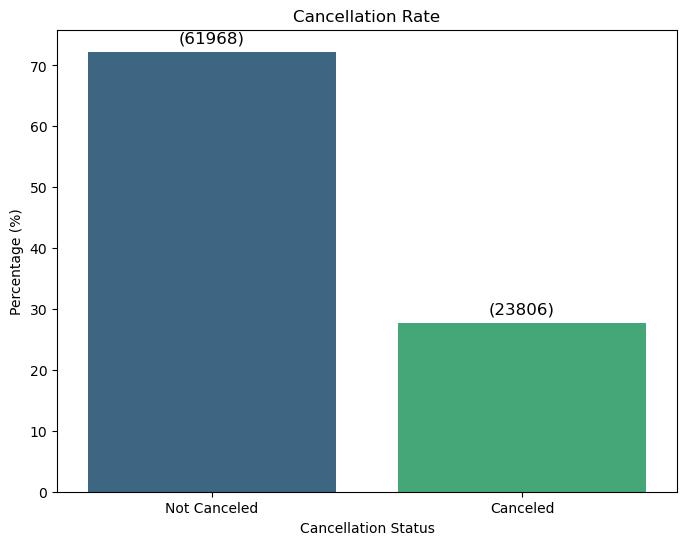

In [174]:
cancellation_df = df['is_canceled'].value_counts().reset_index()
cancellation_df.columns = ['is_canceled', 'total_count']

cancellation_df['cancellation_percentage'] = (cancellation_df['total_count'] / cancellation_df['total_count'].sum()) * 100

cancellation_df['is_canceled'] = cancellation_df['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})

plt.figure(figsize=(8, 6))
sns.barplot(x='is_canceled', y='cancellation_percentage', data=cancellation_df, palette='viridis')

for i, row in cancellation_df.iterrows():
    plt.text(i, row['cancellation_percentage'] + 1, f"({row['total_count']})", ha='center', va='bottom', fontsize=12)

plt.title('Cancellation Rate')
plt.xlabel('Cancellation Status')
plt.ylabel('Percentage (%)')

plt.show()


Temuan :

- **Not Canceled:** 61.970 pemesanan (**72,3%**)  
- **Canceled:** 23.806 pemesanan (**27,7%**)  

Mayoritas pemesanan tetap berjalan, tetapi hampir **1 dari 4 pemesanan dibatalkan**. Ini menunjukkan bahwa pembatalan adalah faktor yang cukup signifikan dalam operasional hotel.


## 1 | Faktor Waktu Terhadap Pembatalan Pemesanan Hotel

### A | Tahun Dengan Tingkat Pembatalan Tertinggi

In [175]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                     df['arrival_date_month'].astype(str) + '-' +
                                     df['arrival_date_day_of_month'].astype(str))

In [176]:
canceled_counts = df[df['is_canceled'] == 1]['arrival_date_year'].value_counts().sort_index()
canceled_df = pd.DataFrame({'arrival_date_year': canceled_counts.index, 'canceled_count': canceled_counts.values})

total_counts = df['arrival_date_year'].value_counts().sort_index()
total_df = pd.DataFrame({'arrival_date_year': total_counts.index, 'total_count': total_counts.values})

merged_df = pd.merge(canceled_df, total_df, on='arrival_date_year', how='outer')

merged_df['cancellation_percentage'] = (merged_df['canceled_count'] / merged_df['total_count']) * 100
merged_df.sort_values(by='cancellation_percentage', ascending=False)


,arrival_date_year,canceled_count,total_count,cancellation_percentage
2,2017,10047,31284,32.115458
1,2016,11097,41523,26.724948
0,2015,2662,12967,20.529035


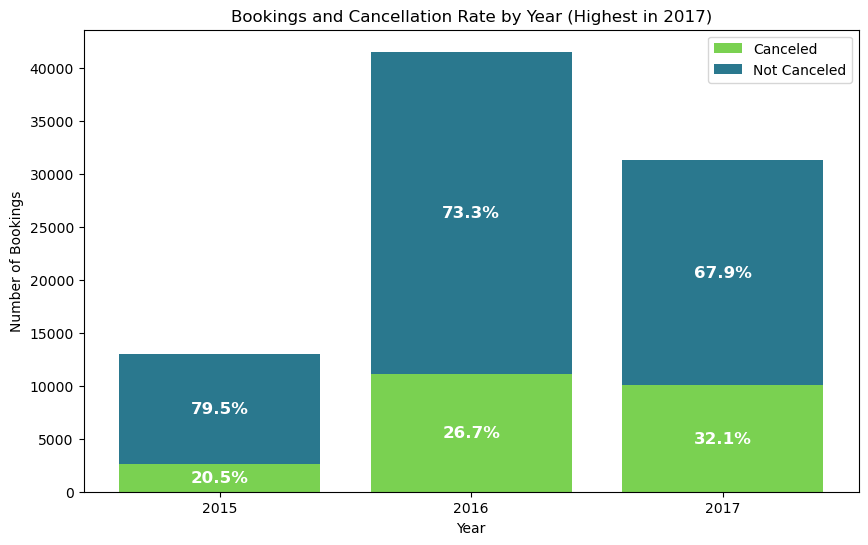

In [177]:
df['arrival_date_year'] = pd.to_datetime(df['arrival_date']).dt.year

cancellation_by_year = df.groupby('arrival_date_year')['is_canceled'].agg(['sum', 'count'])
cancellation_by_year.rename(columns={'sum': 'canceled_count', 'count': 'total_count'}, inplace=True)

cancellation_by_year['not_canceled_count'] = cancellation_by_year['total_count'] - cancellation_by_year['canceled_count']
cancellation_by_year['canceled_percentage'] = (cancellation_by_year['canceled_count'] / cancellation_by_year['total_count']) * 100
cancellation_by_year['not_canceled_percentage'] = (cancellation_by_year['not_canceled_count'] / cancellation_by_year['total_count']) * 100

highest_cancellation_year = cancellation_by_year['canceled_percentage'].idxmax()

cmap = sns.color_palette("viridis", as_cmap=True)
color_canceled = cmap(0.8)  
color_not_canceled = cmap(0.4) 

fig, ax = plt.subplots(figsize=(10, 6))
years = cancellation_by_year.index
x_pos = range(len(years))

bars1 = ax.bar(x_pos, cancellation_by_year['canceled_count'], label='Canceled', color=color_canceled)
bars2 = ax.bar(x_pos, cancellation_by_year['not_canceled_count'], bottom=cancellation_by_year['canceled_count'],
               label='Not Canceled', color=color_not_canceled)

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2,
            f"{cancellation_by_year['canceled_percentage'].iloc[i]:.1f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.text(bar2.get_x() + bar2.get_width() / 2, bar1.get_height() + (bar2.get_height() / 2),
            f"{cancellation_by_year['not_canceled_percentage'].iloc[i]:.1f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Bookings')
ax.set_title(f'Bookings and Cancellation Rate by Year (Highest in {highest_cancellation_year})')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.legend()

plt.show()


Temuan :     

- Tren pembatalan meningkat dari tahun ke tahun, baik dari segi jumlah maupun persentase.
- **Tahun 2017** memiliki tingkat pembatalan tertinggi (**32,1%**) dengan **10.047** pembatalan dari **31.286** pemesanan.
- **Tahun 2016** mencatat jumlah pembatalan terbanyak secara absolut (**11.097** pembatalan) dengan tingkat pembatalan **26,7%**.
- **Tahun 2015** memiliki tingkat pembatalan terendah (**20,5%**) dengan **2.662** pembatalan dari **12.967** pemesanan.


### B | Bulan Dengan Tingkat Pembatalan Tertinggi

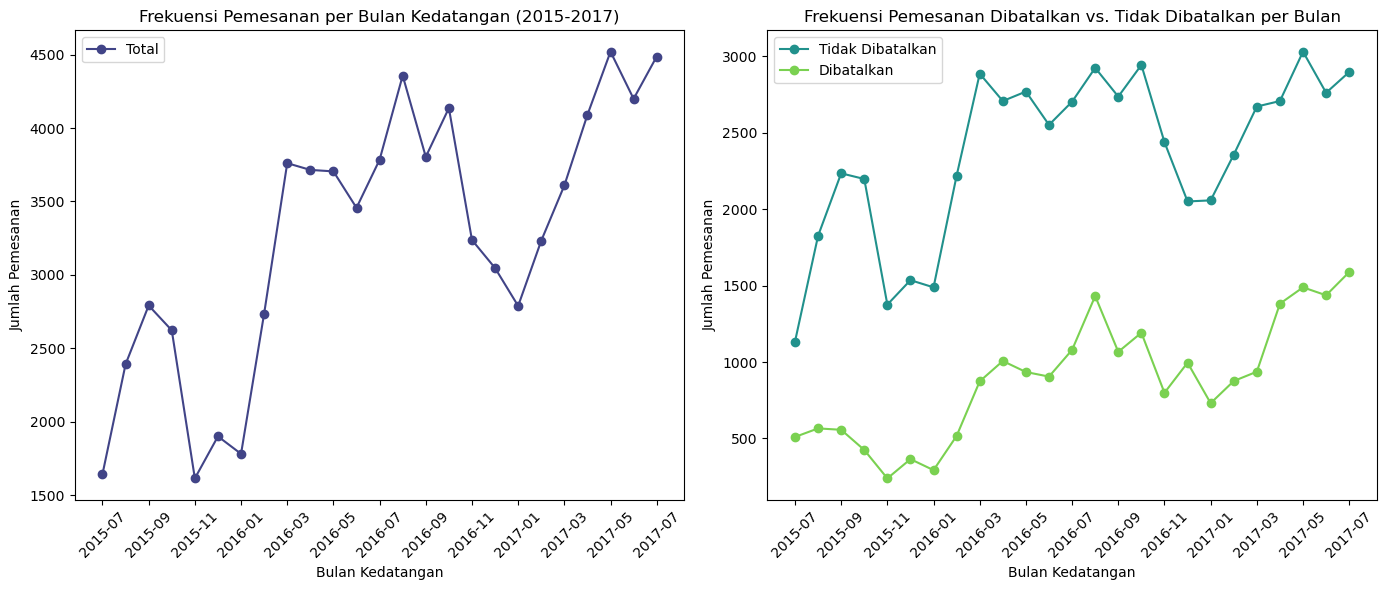

In [178]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.to_period('M').astype(str)

grouped_data = df.groupby(['arrival_date_month', 'is_canceled'])['arrival_date_month'].count().unstack().fillna(0)

month_order = pd.date_range(start='2015-07', end='2017-08', freq='M').strftime('%Y-%m').tolist()
grouped_data = grouped_data.reindex(month_order, axis=0, fill_value=0)

cmap = sns.color_palette("viridis", as_cmap=True)
color_total = cmap(0.2)  
color_not_canceled = cmap(0.5) 
color_canceled = cmap(0.8) 

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(grouped_data.index, grouped_data.sum(axis=1), label='Total', marker='o', color=color_total)
ax[0].set_title('Frekuensi Pemesanan per Bulan Kedatangan (2015-2017)')
ax[0].set_xlabel('Bulan Kedatangan')
ax[0].set_ylabel('Jumlah Pemesanan')
ax[0].set_xticks(range(0, len(month_order), 2))
ax[0].set_xticklabels(month_order[::2], rotation=45)
ax[0].legend()

ax[1].plot(grouped_data.index, grouped_data.get(0, 0), label='Tidak Dibatalkan', marker='o', color=color_not_canceled)
ax[1].plot(grouped_data.index, grouped_data.get(1, 0), label='Dibatalkan', marker='o', color=color_canceled)
ax[1].set_title('Frekuensi Pemesanan Dibatalkan vs. Tidak Dibatalkan per Bulan')
ax[1].set_xlabel('Bulan Kedatangan')
ax[1].set_ylabel('Jumlah Pemesanan')
ax[1].set_xticks(range(0, len(month_order), 2))
ax[1].set_xticklabels(month_order[::2], rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()


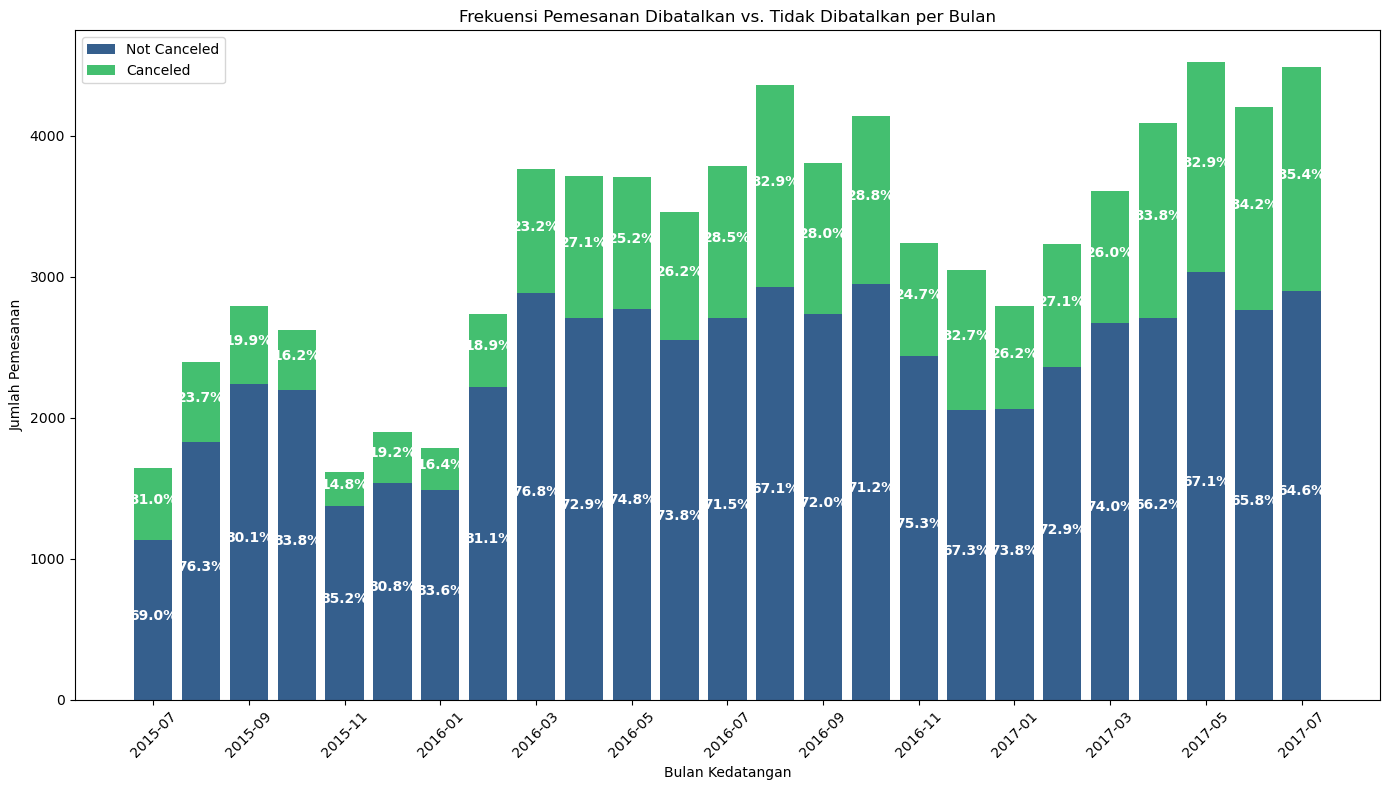

In [179]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.to_period('M').astype(str)

grouped_data = df.groupby(['arrival_date_month', 'is_canceled'])['arrival_date_month'].count().unstack().fillna(0)

month_order = pd.date_range(start='2015-07', end='2017-08', freq='M').strftime('%Y-%m').tolist()
grouped_data = grouped_data.reindex(month_order, axis=0, fill_value=0)

cmap = sns.color_palette("viridis", as_cmap=True)
color_not_canceled = cmap(0.3)  
color_canceled = cmap(0.7) 

plt.figure(figsize=(14, 8))
plt.bar(grouped_data.index, grouped_data.get(0, 0), label='Not Canceled', color=color_not_canceled)
plt.bar(grouped_data.index, grouped_data.get(1, 0), bottom=grouped_data.get(0, 0), label='Canceled', color=color_canceled)

total_counts = grouped_data.sum(axis=1)
for i, (not_canceled, canceled, total) in enumerate(zip(grouped_data.get(0, 0), grouped_data.get(1, 0), total_counts)):
    if total > 0:
        plt.text(i, not_canceled / 2, f'{(not_canceled/total)*100:.1f}%', ha='center', color='white', fontsize=10, fontweight='bold')
        plt.text(i, not_canceled + canceled / 2, f'{(canceled/total)*100:.1f}%', ha='center', color='white', fontsize=10, fontweight='bold')

plt.title('Frekuensi Pemesanan Dibatalkan vs. Tidak Dibatalkan per Bulan')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(range(0, len(month_order), 2), month_order[::2], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [180]:
canceled_counts = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts().sort_index()
canceled_df = pd.DataFrame({'arrival_date_month': canceled_counts.index, 'canceled_count': canceled_counts.values})

total_counts = df['arrival_date_month'].value_counts().sort_index()
total_df = pd.DataFrame({'arrival_date_month': total_counts.index, 'total_count': total_counts.values})

merged_df = pd.merge(canceled_df, total_df, on='arrival_date_month', how='outer')

merged_df['cancellation_percentage'] = (merged_df['canceled_count'] / merged_df['total_count']) * 100
merged_df


,arrival_date_month,canceled_count,total_count,cancellation_percentage
0,2015-07,510,1644,31.021898
1,2015-08,566,2392,23.662207
2,2015-09,557,2792,19.949857
3,2015-10,425,2623,16.202821
4,2015-11,239,1615,14.798762
5,2015-12,365,1901,19.200421
6,2016-01,293,1782,16.442200
7,2016-02,517,2737,18.889295
8,2016-03,874,3761,23.238500
9,2016-04,1007,3715,27.106326


1. Tren Pemesanan:

- Jumlah pemesanan mengalami fluktuasi signifikan antara 2015 hingga 2017.
- Peningkatan tajam terjadi pada pertengahan 2016 hingga awal 2017.

2. Tingkat Pembatalan vs Tidak Dibatalkan:

- Persentase pembatalan meningkat secara bertahap dari 2015 hingga 2017.
- Pada 2017, tingkat pembatalan mencapai angka tertinggi, sekitar 35%.

3. Variasi Bulanan:

- Pemesanan cenderung lebih tinggi pada pertengahan dan akhir tahun.
- Bulan-bulan dengan jumlah pemesanan tinggi juga memiliki tingkat pembatalan yang lebih besar.


Kesimpulan

Peningkatan pemesanan di tahun 2016-2017 menunjukkan pertumbuhan minat pelanggan, tetapi tingkat pembatalan juga semakin meningkat. Hal ini dapat menjadi perhatian bagi manajemen untuk mengurangi pembatalan melalui kebijakan pemesanan yang lebih ketat atau insentif untuk tamu yang menyelesaikan pemesanannya.

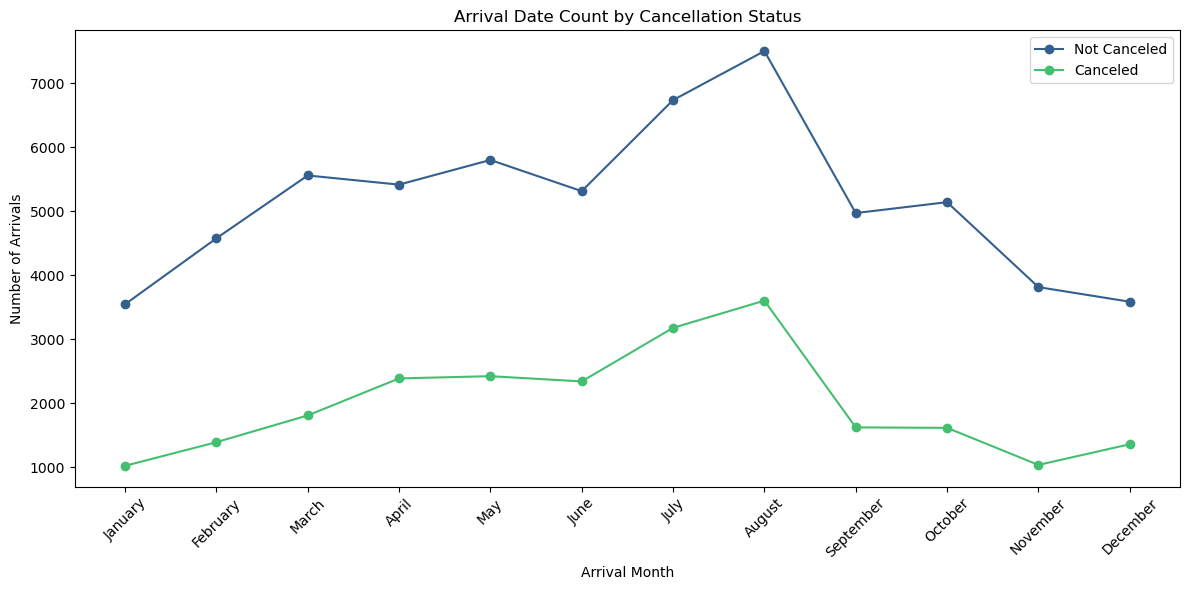

In [181]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

grouped_data = df.groupby(['arrival_date_month', 'is_canceled'])['arrival_date_month'].count().unstack()

grouped_data = grouped_data.reindex(month_order, axis=0).fillna(0)

cmap = sns.color_palette("viridis", as_cmap=True)
color_not_canceled = cmap(0.3)  
color_canceled = cmap(0.7)  

plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data[0], label='Not Canceled', marker='o', color=color_not_canceled, linestyle='-')
plt.plot(grouped_data.index, grouped_data[1], label='Canceled', marker='o', color=color_canceled, linestyle='-')

plt.title('Arrival Date Count by Cancellation Status')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


is_canceled,Canceled,Not Canceled,Total,Canceled (%),Not Canceled (%)
arrival_date_month,,,,,
January,1024,3547,4571,22.4%,77.6%
February,1393,4577,5970,23.3%,76.7%
March,1811,5559,7370,24.6%,75.4%
April,2389,5416,7805,30.6%,69.4%
May,2424,5801,8225,29.5%,70.5%
June,2342,5314,7656,30.6%,69.4%
July,3179,6736,9915,32.1%,67.9%
August,3604,7502,11106,32.5%,67.5%
September,1624,4972,6596,24.6%,75.4%


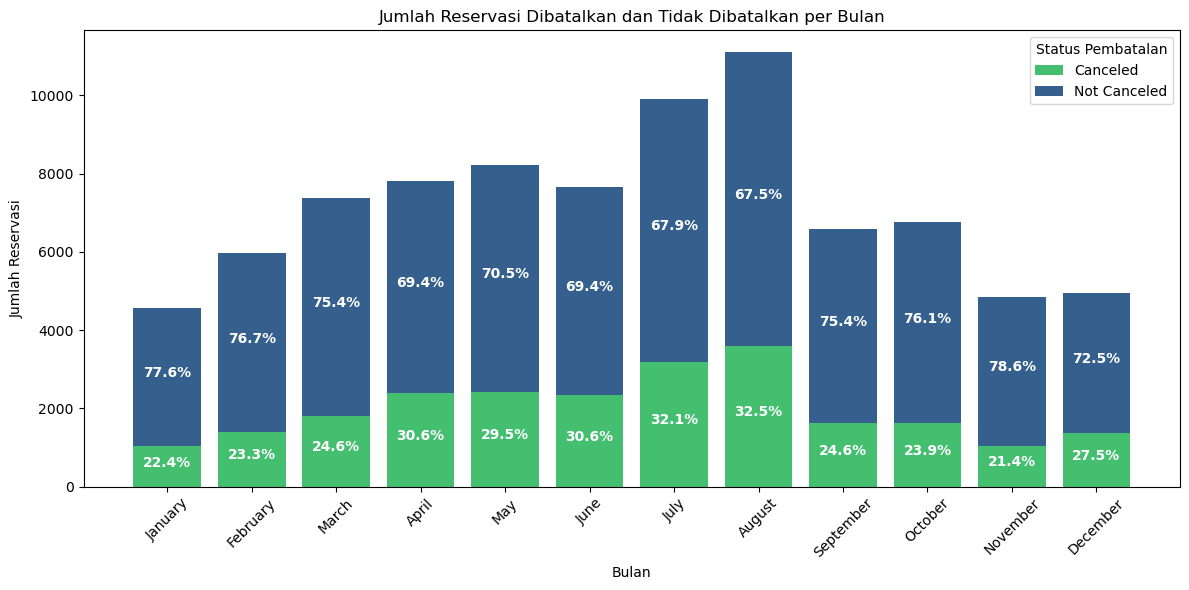

In [182]:
grouped_data = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
grouped_data = grouped_data.reindex(month_order, fill_value=0)

grouped_data['Total'] = grouped_data[0] + grouped_data[1]
grouped_data['Canceled (%)'] = (grouped_data[1] / grouped_data['Total'] * 100).map(lambda x: f"{x:.1f}%")
grouped_data['Not Canceled (%)'] = (grouped_data[0] / grouped_data['Total'] * 100).map(lambda x: f"{x:.1f}%")

table_data = grouped_data.rename(columns={0: 'Not Canceled', 1: 'Canceled'})

table_data = table_data[['Canceled', 'Not Canceled', 'Total', 'Canceled (%)', 'Not Canceled (%)']]

display(table_data)

def plot_cancellation_data(grouped_data):
    cmap = sns.color_palette("viridis", as_cmap=True)
    color_canceled = cmap(0.7)
    color_not_canceled = cmap(0.3)

    fig, ax = plt.subplots(figsize=(12, 6))

    bars1 = ax.bar(grouped_data.index, grouped_data[1], label='Canceled', color=color_canceled)
    bars2 = ax.bar(grouped_data.index, grouped_data[0], bottom=grouped_data[1], label='Not Canceled', color=color_not_canceled)

    for bar1, bar2, cancel_pct, not_cancel_pct in zip(bars1, bars2, grouped_data['Canceled (%)'], grouped_data['Not Canceled (%)']):
        height1 = bar1.get_height()
        height2 = bar2.get_height()

        if height1 > 0:
            ax.text(bar1.get_x() + bar1.get_width() / 2, height1 / 2,
                    cancel_pct, ha='center', color='white', fontsize=10, fontweight='bold')

        if height2 > 0:
            ax.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2,
                    not_cancel_pct, ha='center', color='white', fontsize=10, fontweight='bold')

    ax.set_title('Jumlah Reservasi Dibatalkan dan Tidak Dibatalkan per Bulan')
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Jumlah Reservasi')
    ax.set_xticks(range(len(month_order)))
    ax.set_xticklabels(month_order, rotation=45)
    ax.legend(title='Status Pembatalan')

    plt.tight_layout()
    plt.show()

plot_cancellation_data(grouped_data)


1. Jumlah Reservasi dan Persentase Pembatalan per Bulan

- Bulan dengan jumlah reservasi tertinggi adalah **Juli dan Agustus**.
- Tingkat pembatalan tertinggi terjadi pada **Juli (32.1%) dan Agustus (32.5%)**, kemungkinan karena musim liburan.
- Tingkat pembatalan paling rendah terjadi di **November (21.4%) dan Januari (22.4%)**, yang mungkin merupakan low season.

2. Tren Kedatangan Berdasarkan Status Pembatalan

- **Reservasi yang tidak dibatalkan lebih banyak dibandingkan yang dibatalkan di setiap bulan.**
- **Jumlah pemesanan meningkat dari Januari hingga Agustus, lalu menurun setelahnya.**
- **Pembatalan meningkat seiring dengan kenaikan pemesanan, terutama di bulan Juli dan Agustus.** Hal ini menunjukkan bahwa permintaan tinggi bisa menyebabkan lebih banyak pembatalan.

Musim liburan memiliki **risiko pembatalan yang lebih tinggi**, kemungkinan karena perubahan rencana perjalanan atau kebijakan fleksibel dari pelanggan.


## 2 | Pengaruh Karakteristik Pemesan Terhadap Pembatalan Pemesanan Hotel

### A | Pengaruh Pelanggan Yang Pernah Membatalkan Pesanan Sebelumnya Terhadap Pembatalan Pemesanan Terakhir

In [183]:
cancellation_counts = df.groupby('previous_cancellations')['is_canceled'].value_counts().unstack().fillna(0)

cancellation_counts['Total'] = cancellation_counts[0] + cancellation_counts[1]

cancellation_counts['Cancellation Rate'] = cancellation_counts[1] / cancellation_counts['Total']

cancellation_counts = cancellation_counts.rename(columns={0: 'Not Canceled', 1: 'Canceled'})

cancellation_counts


is_canceled,Not Canceled,Canceled,Total,Cancellation Rate
previous_cancellations,,,,
0,61484.0,22679.0,84163.0,0.269465
1,319.0,1059.0,1378.0,0.768505
2,61.0,32.0,93.0,0.344086
3,39.0,15.0,54.0,0.277778
4,12.0,4.0,16.0,0.250000
5,12.0,2.0,14.0,0.142857
6,15.0,2.0,17.0,0.117647
11,25.0,2.0,27.0,0.074074
13,1.0,3.0,4.0,0.750000


is_canceled,previous_cancellations,canceled_count,total_count,cancellation_percentage
0,0,22679.000000,84163.000000,26.946520
1,1,1059.000000,1378.000000,76.850508
2,2,32.000000,93.000000,34.408602
3,3,15.000000,54.000000,27.777778
4,4,4.000000,16.000000,25.000000
5,5,2.000000,14.000000,14.285714
6,6,2.000000,17.000000,11.764706
7,11,2.000000,27.000000,7.407407
8,13,3.000000,4.000000,75.000000
9,14,1.000000,1.000000,100.000000


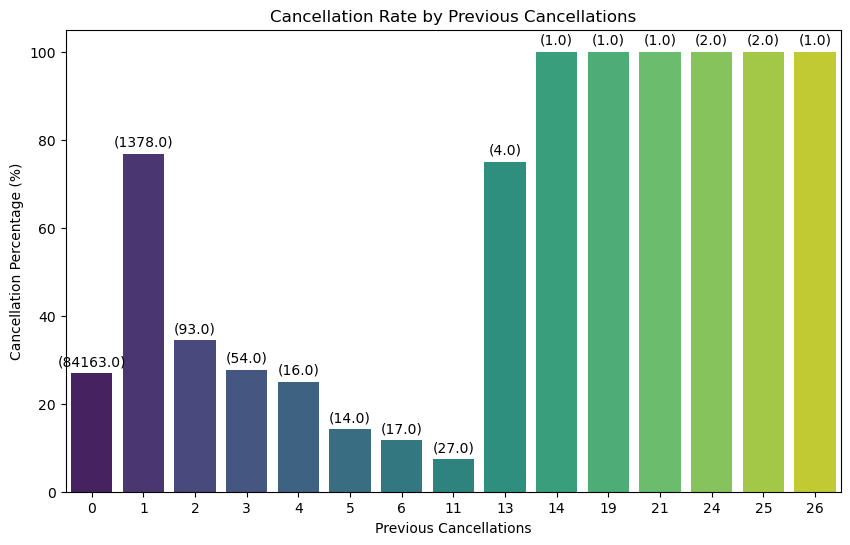

In [184]:
cancellation_counts = df.groupby('previous_cancellations')['is_canceled'].value_counts().unstack().fillna(0)

cancellation_counts['total_count'] = cancellation_counts[0] + cancellation_counts[1]
cancellation_counts['canceled_count'] = cancellation_counts[1]
cancellation_counts['cancellation_percentage'] = (cancellation_counts[1] / cancellation_counts['total_count']) * 100

cancellation_df = cancellation_counts[['canceled_count', 'total_count', 'cancellation_percentage']].reset_index()

cancellation_df = cancellation_df.rename(columns={'previous_cancellations': 'previous_cancellations'})
cancellation_df = cancellation_df.sort_values(by='previous_cancellations', ascending=True)  

display(cancellation_df.style.format({'cancellation_percentage': '{:.6f}'}))  

plt.figure(figsize=(10, 6))
sns.barplot(x='previous_cancellations', y='cancellation_percentage', data=cancellation_df, palette='viridis')

for i, row in cancellation_df.iterrows():
    plt.text(i, row['cancellation_percentage'] + 1, f"({row['total_count']})", ha='center', va='bottom')

plt.title('Cancellation Rate by Previous Cancellations')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Percentage (%)')

plt.show()


**Temuan** :     
* Pelanggan yang pernah membatalkan lebih cenderung untuk membatalkan lagi, terutama setelah satu pembatalan sebelumnya.
* Data ini menunjukkan bahwa riwayat pembatalan dapat menjadi indikator penting dalam memprediksi perilaku pembatalan di masa depan.

### B | Perbedaan Tingkat Pembatalan Antara Pelanggan Yang Merupakan *repeated guest* dan pelanggan baru

,guest_type,canceled_count,total_count,cancellation_percentage
0,Repeated Guest,23564,82843,28.444165
1,New Guest,242,2931,8.256568


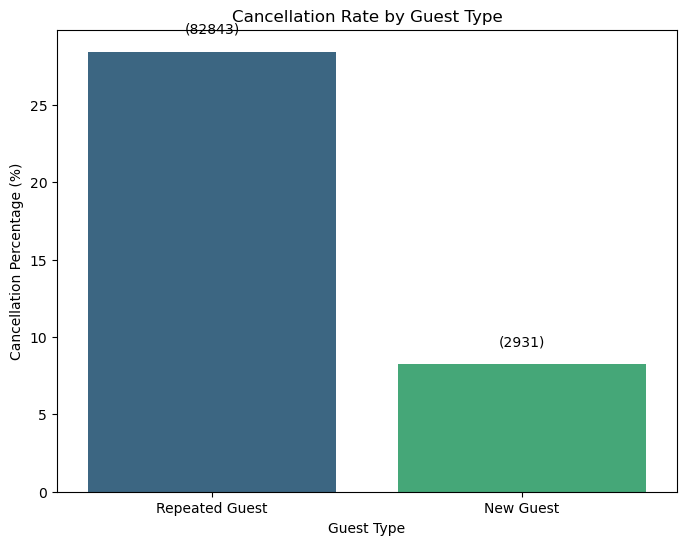

In [185]:
cancellation_counts = df.groupby('is_repeated_guest')['is_canceled'].value_counts().unstack().fillna(0)

cancellation_counts['total_count'] = cancellation_counts[0] + cancellation_counts[1]
cancellation_counts['canceled_count'] = cancellation_counts[1]
cancellation_counts['cancellation_percentage'] = (cancellation_counts[1] / cancellation_counts['total_count']) * 100

cancellation_df = pd.DataFrame({
    'guest_type': ['Repeated Guest', 'New Guest'],
    'canceled_count': cancellation_counts['canceled_count'].values,
    'total_count': cancellation_counts['total_count'].values,
    'cancellation_percentage': cancellation_counts['cancellation_percentage'].values
})

display(cancellation_df.style.format({'cancellation_percentage': '{:.6f}'}))

plt.figure(figsize=(8, 6))
sns.barplot(x='guest_type', y='cancellation_percentage', data=cancellation_df, palette='viridis')

for i, row in cancellation_df.iterrows():
    plt.text(i, row['cancellation_percentage'] + 1, f"({row['total_count']})", ha='center', va='bottom')

plt.title('Cancellation Rate by Guest Type')
plt.xlabel('Guest Type')
plt.ylabel('Cancellation Percentage (%)')

plt.show()


Temuan :    

- **Pelanggan yang merupakan *repeated guests*** memiliki tingkat pembatalan sebesar **8.25%** (242 dari 2,933).  
- **Pelanggan baru** menunjukkan tingkat pembatalan yang jauh lebih tinggi, yaitu **28.44%** (23,564 dari 82,843).  
- Hal ini menunjukkan bahwa **pelanggan baru lebih cenderung membatalkan pesanan** dibandingkan dengan pelanggan yang sudah pernah menginap sebelumnya.


### C |  Pengaruh Jumlah Orang Dalam Satu Pemesanan (*adults, children, babies*) Terhadap Pembatalan

,adults,children,babies,total_count,canceled_count,cancellation_percentage
0,1,0,0,15581,3050,19.575124
1,1,0,1,8,3,37.500000
2,1,1,0,264,62,23.484848
3,1,1,1,2,0,0.000000
4,1,2,0,150,46,30.666667
5,1,2,1,2,2,100.000000
6,1,3,0,4,2,50.000000
7,2,0,0,55956,15902,28.418758
8,2,0,1,689,126,18.287373
9,2,0,2,12,2,16.666667


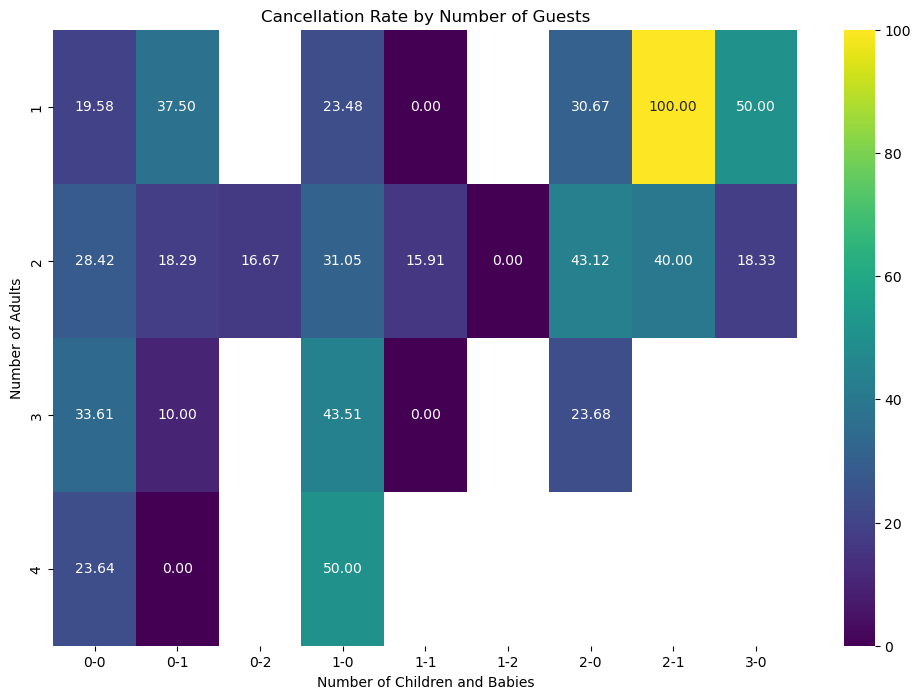

In [186]:
cancellation_by_guests = df.groupby(['adults', 'children', 'babies'])['is_canceled'].agg(['count', 'sum']).reset_index()

cancellation_by_guests = cancellation_by_guests.rename(columns={'count': 'total_count', 'sum': 'canceled_count'})
cancellation_by_guests['cancellation_percentage'] = (cancellation_by_guests['canceled_count'] / cancellation_by_guests['total_count']) * 100

display(cancellation_by_guests.style.format({'cancellation_percentage': '{:.6f}'}))

plt.figure(figsize=(12, 8))
pivot_table = cancellation_by_guests.pivot_table(index='adults', columns=['children', 'babies'], values='cancellation_percentage')

sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cancellation Rate by Number of Guests')
plt.xlabel('Number of Children and Babies')
plt.ylabel('Number of Adults')
plt.show()


**Temuan** :    

* Secara umum, tingkat pembatalan cenderung meningkat dengan jumlah tamu dan variasi dalam komposisi tamu (anak dan bayi).
* Ketika ada lebih banyak anak atau bayi, tingkat pembatalan cenderung lebih tinggi, menunjukkan bahwa keluarga dengan anak kecil mungkin lebih rentan terhadap pembatalan.

Tingkat pembatalan bervariasi tergantung pada jumlah tamu dan komposisi keluarga, dengan proporsi tertinggi terlihat pada kombinasi tertentu dari tamu dewasa, anak, dan bayi.

### D | Pengaruh Pembatalan Pada Pelanggan Yang Melakukan Lebih Banyak Perubahan Pemesanan (`booking_changes`)

,booking_changes,canceled_bookings_count,total_bookings,cancellation_rate
0,0,21381,70300.0,0.304139
1,1,1490,10622.0,0.140275
2,2,695,3429.0,0.202683
3,3,129,846.0,0.152482
4,4,63,342.0,0.184211
5,5,20,107.0,0.186916
6,6,17,56.0,0.303571
7,7,3,26.0,0.115385
8,8,4,14.0,0.285714
9,9,1,8.0,0.125000


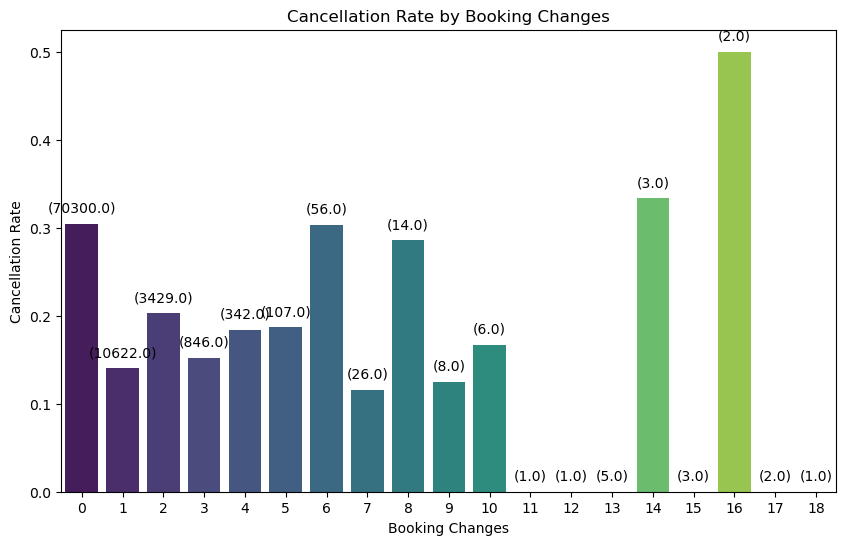

In [187]:
cancellation_by_changes = df.groupby('booking_changes')['is_canceled'].agg(['mean', 'sum']).reset_index()

cancellation_by_changes.rename(columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}, inplace=True)

cancellation_by_changes['total_bookings'] = cancellation_by_changes['canceled_bookings_count'] / cancellation_by_changes['cancellation_rate']

cancellation_by_changes.fillna(0, inplace=True)

cancellation_by_changes = cancellation_by_changes[['booking_changes', 'canceled_bookings_count', 'total_bookings', 'cancellation_rate']]

display(cancellation_by_changes)
cancellation_rates = df.groupby('booking_changes')['is_canceled'].mean()

cancellation_df = pd.DataFrame({
    'Booking Changes': cancellation_rates.index,
    'Cancellation Rate': cancellation_rates.values
})

booking_counts = df.groupby('booking_changes')['is_canceled'].count()

cancellation_df['Total Bookings'] = booking_counts.values

plt.figure(figsize=(10, 6))
sns.barplot(x='Booking Changes', y='Cancellation Rate', data=cancellation_df, palette='viridis')
plt.title('Cancellation Rate by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Cancellation Rate')

for i, row in cancellation_df.iterrows():
    plt.text(i, row['Cancellation Rate'] + 0.01, f"({row['Total Bookings']})", ha='center', va='bottom')

plt.show()


Temuan :    

1. **Tren Pembatalan Berdasarkan Jumlah Perubahan Pemesanan**
- Sebagian besar pemesanan tidak mengalami perubahan (*booking_changes = 0*), dengan tingkat pembatalan sebesar **30.41%** (21.381 dari 70.300).
- Tingkat pembatalan cenderung **bervariasi**, dengan pola berikut:
  - **1-5 kali perubahan** memiliki tingkat pembatalan antara **14% - 20%**.
  - **6 kali perubahan** menunjukkan lonjakan pembatalan sebesar **30.36%**.
  - **16 kali perubahan** memiliki tingkat pembatalan tertinggi, yaitu **50%**, meskipun jumlah total pemesanan pada kategori ini sangat kecil.

2. **Pola Umum yang Terlihat**
- Mayoritas pemesanan dilakukan tanpa perubahan, namun tetap memiliki tingkat pembatalan yang signifikan.
- Meskipun jumlah pemesanan berkurang seiring dengan bertambahnya jumlah perubahan (*booking_changes* lebih tinggi), tingkat pembatalan tidak selalu menurun secara konsisten.
- Perubahan pemesanan yang terlalu sering (lebih dari 10 kali) **jarang terjadi**, namun beberapa di antaranya memiliki tingkat pembatalan tinggi.

Kesimpulan
- Pelanggan yang sering mengubah pemesanannya berpotensi lebih besar untuk membatalkan, meskipun jumlahnya sedikit.
- Sebagian besar pembatalan terjadi pada pemesanan yang tidak mengalami perubahan (*booking_changes = 0*), karena jumlahnya yang sangat besar.
- Perubahan pemesanan tidak selalu berkorelasi langsung dengan tingkat pembatalan, tetapi frekuensi tinggi bisa menjadi indikator ketidakpastian pelanggan.

## 3 | Pengaruh Tipe Pemesanan dan Pembayaran Terhadap Tingkat Pemesanan

### A | Perbedaan Tingkat Pembatalan Antara Jenis `deposit_type` Yang Berbeda

,deposit_type,canceled_count,total_count,cancellation_percentage
0,No Deposit,22797,84629,26.937575
1,Non Refund,983,1038,94.701349
2,Refundable,26,107,24.299065


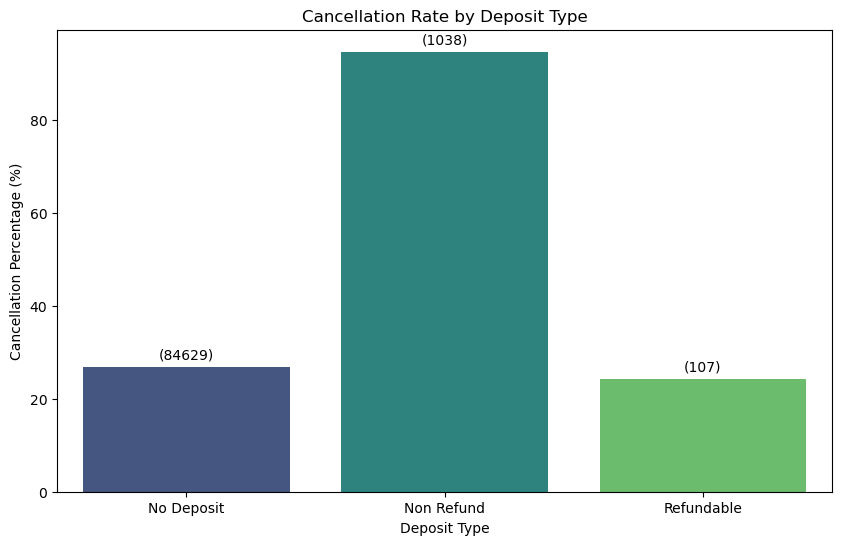

In [188]:
deposit_cancellation_rates = df.groupby('deposit_type')['is_canceled'].agg(['sum', 'count']).reset_index()

deposit_cancellation_rates = deposit_cancellation_rates.rename(columns={'sum': 'canceled_count', 'count': 'total_count'})
deposit_cancellation_rates['cancellation_percentage'] = (deposit_cancellation_rates['canceled_count'] / deposit_cancellation_rates['total_count']) * 100

display(deposit_cancellation_rates.style.format({'cancellation_percentage': '{:.6f}'}))

plt.figure(figsize=(10, 6))
sns.barplot(x='deposit_type', y='cancellation_percentage', data=deposit_cancellation_rates, palette='viridis')

for i, row in deposit_cancellation_rates.iterrows():
    plt.text(i, row['cancellation_percentage'] + 1, f"({row['total_count']})", ha='center', va='bottom')

plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Percentage (%)')

plt.show()


**Temuan** :     

Tingkat pembatalan untuk jenis deposit yang berbeda menunjukkan bahwa:  
- **Pelanggan dengan jenis deposit Non Refund memiliki tingkat pembatalan tertinggi** sebesar **94.70% dari 1,038 total pemesanan**.  
- **Pelanggan dengan jenis deposit No Deposit memiliki tingkat pembatalan sebesar 26.94% dari 84,631 pemesanan**.  
- **Pelanggan dengan jenis deposit Refundable memiliki tingkat pembatalan sebesar 24.30% dari 107 pemesanan**.  

Data ini menunjukkan bahwa **jenis deposit yang dipilih berpengaruh signifikan terhadap keputusan pembatalan pelanggan**. Pemesanan dengan **Non Refund hampir selalu dibatalkan**, sedangkan **pemesanan dengan deposit Refundable atau tanpa deposit memiliki tingkat pembatalan lebih rendah**.  


### B | Pengaruh `market_segment` dan `distribution_channel` Dalam Tingkat Pembatalan Hotel

cancellation_rate  \
market_segment distribution_channel                      
Aviation       Corporate                      0.202830   
               TA/TO                          0.100000   
Complementary  Corporate                      0.250000   
               Direct                         0.071429   
               TA/TO                          0.066667   
Corporate      Corporate                      0.123668   
               Direct                         0.092105   
               TA/TO                          0.111111   
Direct         Corporate                      0.102564   
               Direct                         0.150102   
               GDS                            0.000000   
               TA/TO                          0.039474   
Groups         Corporate                      0.139144   
               Direct                         0.175549   
               TA/TO                          0.313420   
Offline TA/TO  Corporate                      0.063830   
               Direct                         0.187500   
               GDS                            0.181818   
               TA/TO                          0.149566   
Online TA      Corporate                      0.176471   
               Direct                         0.071429   
               GDS                            0.210526   
               TA/TO                          0.356526   

                                     canceled_bookings_count  total_bookings  
market_segment distribution_channel                                           
Aviation       Corporate                                  43           212.0  
               TA/TO                                       1            10.0  
Complementary  Corporate                                   1             4.0  
               Direct                                      3            42.0  
               TA/TO                                       1            15.0  
Corporate      Corporate                                 476          3849.0  
               Direct                                     14           152.0  
               TA/TO                                      17           153.0  
Direct         Corporate                                   8            78.0  
               Direct                                   1696         11299.0  
               GDS                                         0             0.0  
               TA/TO                                       9           228.0  
Groups         Corporate                                  91           654.0  
               Direct                                    112           638.0  
               TA/TO                                    1128          3599.0  
Offline TA/TO  Corporate                                   6            94.0  
               Direct                                      3            16.0  
               GDS                                         8            44.0  
               TA/TO                                    2032         13586.0  
Online TA      Corporate                                   6            34.0  
               Direct                                      9           126.0  
               GDS                                        28           133.0  
               TA/TO                                   18114         50807.0

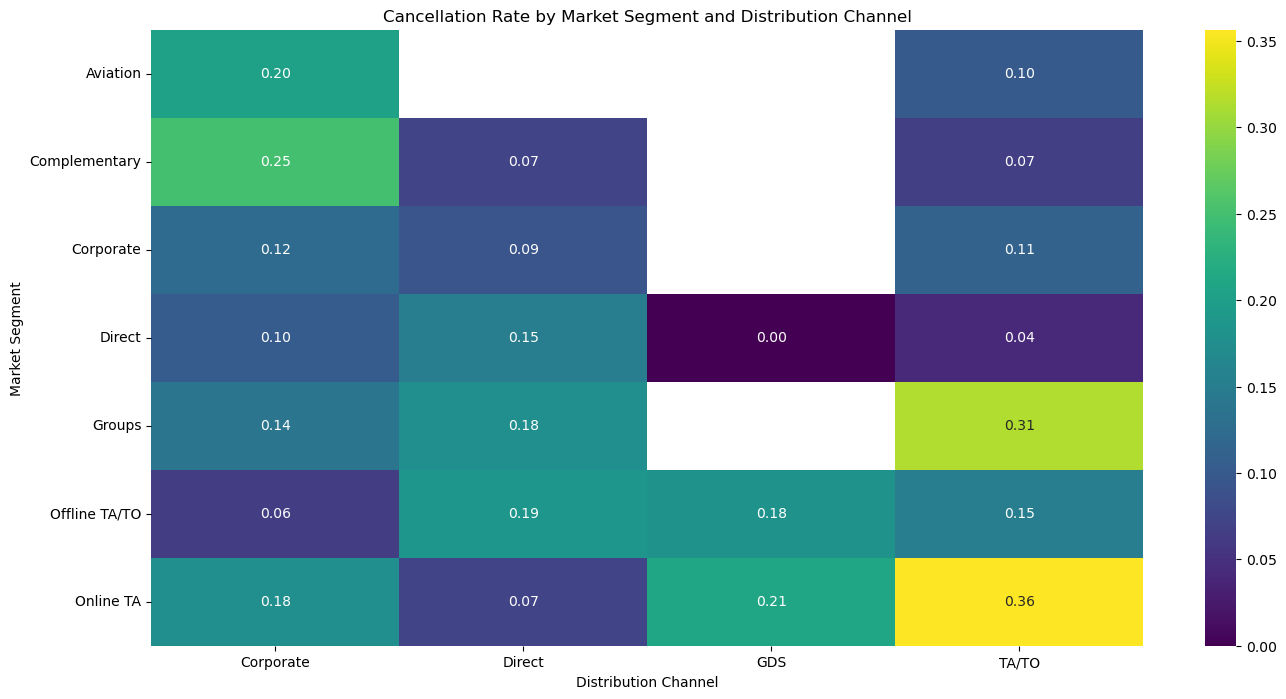

In [189]:
market_segment_cancellation = df.groupby(['market_segment', 'distribution_channel'])['is_canceled'].agg(['mean', 'sum'])

market_segment_cancellation = market_segment_cancellation.rename(
    columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}
)

market_segment_cancellation['total_bookings'] = (
    market_segment_cancellation['canceled_bookings_count'] / market_segment_cancellation['cancellation_rate']
)
market_segment_cancellation.fillna(0, inplace=True)

display(market_segment_cancellation)

plt.figure(figsize=(16, 8))
pivot_table = market_segment_cancellation.pivot_table(
    index='market_segment', columns='distribution_channel', values='cancellation_rate'
)
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cancellation Rate by Market Segment and Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Market Segment')
plt.show()


Temuan :    

Terlihat bahwa Online TA (TA/TO) memiliki tingkat pembatalan tertinggi (35.65%), diikuti oleh Groups (TA/TO) dengan 31.34%, yang mengindikasikan bahwa pemesanan melalui agen perjalanan online dan dalam bentuk grup lebih rentan dibatalkan, kemungkinan karena fleksibilitas kebijakan pembatalan atau perubahan rencana. Pemesanan langsung (Direct) memiliki tingkat pembatalan lebih rendah (7.14% - 18.75%), menandakan bahwa pelanggan yang memesan langsung ke hotel lebih cenderung mempertahankan reservasi mereka. Sementara itu, Corporate bookings lebih stabil, terutama jika dilakukan langsung ke hotel (9.21% - 20.28% pembatalan), menunjukkan bahwa perjalanan bisnis lebih pasti. Untuk mengatasi tingginya pembatalan, hotel dapat mempertimbangkan kebijakan pembatalan yang lebih ketat untuk Online TA dan Group Booking, memberikan insentif bagi pemesanan langsung, serta memantau mitra OTA dengan tingkat pembatalan tinggi guna merancang strategi mitigasi yang lebih baik.

## 4 | Pengaruh Fasilitas dan Layanan Hotel Pada Pembatalan Pemesanan

### A | Hubungan Antara Paket Makanan Yang Dipesan (`meal`) Dengan Kemungkinan Pembatalan

,meal,canceled_count,total_count,cancellation_percentage
0,BB,17854,66618,26.800564
1,FB,99,348,28.448276
2,HB,2443,8996,27.156514
3,SC,3410,9812,34.753363


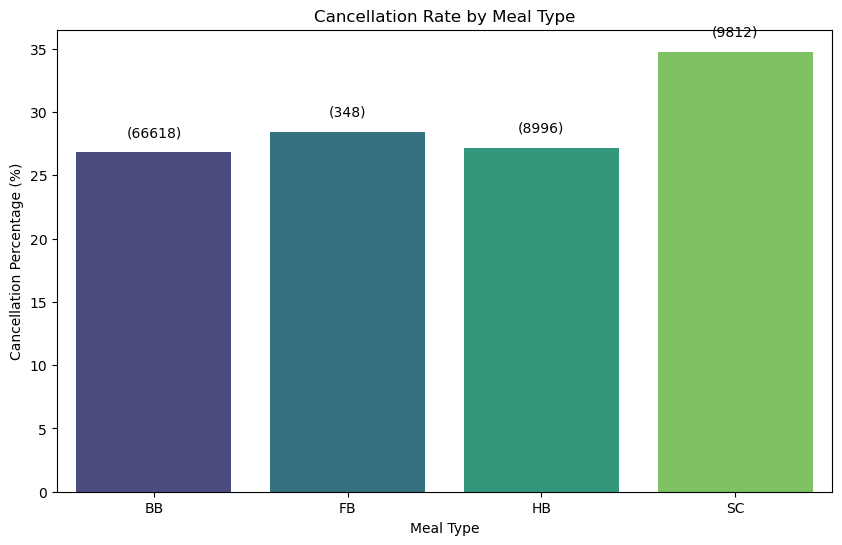

In [190]:
meal_cancellation_rates = df.groupby('meal')['is_canceled'].agg(['sum', 'count']).reset_index()

meal_cancellation_rates = meal_cancellation_rates.rename(columns={'sum': 'canceled_count', 'count': 'total_count'})
meal_cancellation_rates['cancellation_percentage'] = (meal_cancellation_rates['canceled_count'] / meal_cancellation_rates['total_count']) * 100

display(meal_cancellation_rates.style.format({'cancellation_percentage': '{:.6f}'}))

plt.figure(figsize=(10, 6))
sns.barplot(x='meal', y='cancellation_percentage', data=meal_cancellation_rates, palette='viridis')

for i, row in meal_cancellation_rates.iterrows():
    plt.text(i, row['cancellation_percentage'] + 1, f"({row['total_count']})", ha='center', va='bottom')

plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Cancellation Percentage (%)')

plt.show()


Data menunjukkan bahwa tingkat pembatalan bervariasi berdasarkan jenis paket makanan yang dipesan oleh pelanggan:

* SC (Self-Catering) memiliki tingkat pembatalan tertinggi, sekitar 34.75%, dengan total 9,812 pemesanan. Ini menunjukkan bahwa pelanggan yang memilih untuk tidak memesan makanan dari hotel lebih cenderung membatalkan reservasi mereka.
* FB (Full Board) memiliki tingkat pembatalan 28.45% dengan 348 pemesanan. Ini menandakan bahwa pelanggan yang memilih paket lengkap makanan juga memiliki kemungkinan pembatalan yang cukup tinggi.
* HB (Half Board) memiliki tingkat pembatalan 27.15% dari 8,998 pemesanan, yang masih tergolong cukup tinggi tetapi sedikit lebih rendah dibanding FB dan SC.
BB (Bed & Breakfast) memiliki tingkat pembatalan 26.80%, yang merupakan tingkat pembatalan terendah di antara kategori lainnya, dengan total 66,618 pemesanan.

Semakin fleksibel opsi makanan (seperti SC), semakin tinggi kemungkinan pembatalan. Hal ini mungkin disebabkan oleh pelanggan yang ingin lebih banyak pilihan atau lebih cenderung mencari alternatif akomodasi lain. Sebaliknya, pelanggan dengan paket makanan yang lebih terikat (BB, HB, FB) cenderung sedikit lebih stabil dalam mempertahankan pemesanannya.

### B | Pengaruh Tipe Kamar Yang Dipesan (`reserved_room_type` dan `assigned_room_type`) Terhadap Tingkat Pembatalan

cancellation_rate  \
reserved_room_type assigned_room_type                      
A                  A                            0.310381   
                   B                            0.093501   
                   C                            0.079119   
                   D                            0.038677   
                   E                            0.040080   
                   F                            0.058333   
                   G                            0.030120   
                   H                            0.055556   
                   I                            0.016667   
                   K                            0.063158   
B                  A                            0.013158   
                   B                            0.345185   
                   D                            0.000000   
                   E                            0.000000   
                   F                            0.000000   
                   G                            0.000000   
C                  A                            0.000000   
                   B                            0.000000   
                   C                            0.340698   
                   D                            0.000000   
                   E                            0.000000   
                   F                            0.000000   
                   G                            0.200000   
                   H                            0.000000   
                   I                            0.000000   
D                  A                            0.032143   
                   B                            0.000000   
                   C                            0.032258   
                   D                            0.325217   
                   E                            0.046296   
                   F                            0.031088   
                   G                            0.025000   
                   H                            0.000000   
                   I                            0.023810   
                   K                            0.200000   
E                  A                            0.181818   
                   B                            0.000000   
                   C                            0.000000   
                   D                            0.050000   
                   E                            0.298651   
                   F                            0.039788   
                   G                            0.042553   
                   H                            0.333333   
                   I                            0.000000   
                   K                            0.000000   
F                  A                            0.000000   
                   B                            0.000000   
                   D                            0.500000   
                   E                            0.000000   
                   F                            0.324450   
                   G                            0.046729   
                   H                            0.000000   
                   I                            0.000000   
                   K                            0.000000   
G                  A                            0.000000   
                   B                            0.000000   
                   C                            0.000000   
                   E                            0.000000   
                   F                            0.083333   
                   G                            0.376355   
                   H                            0.000000   
                   I                            0.090909   
                   K                            0.000000   
H                  D                            0.000000   
                   G                            0.000000   
                   

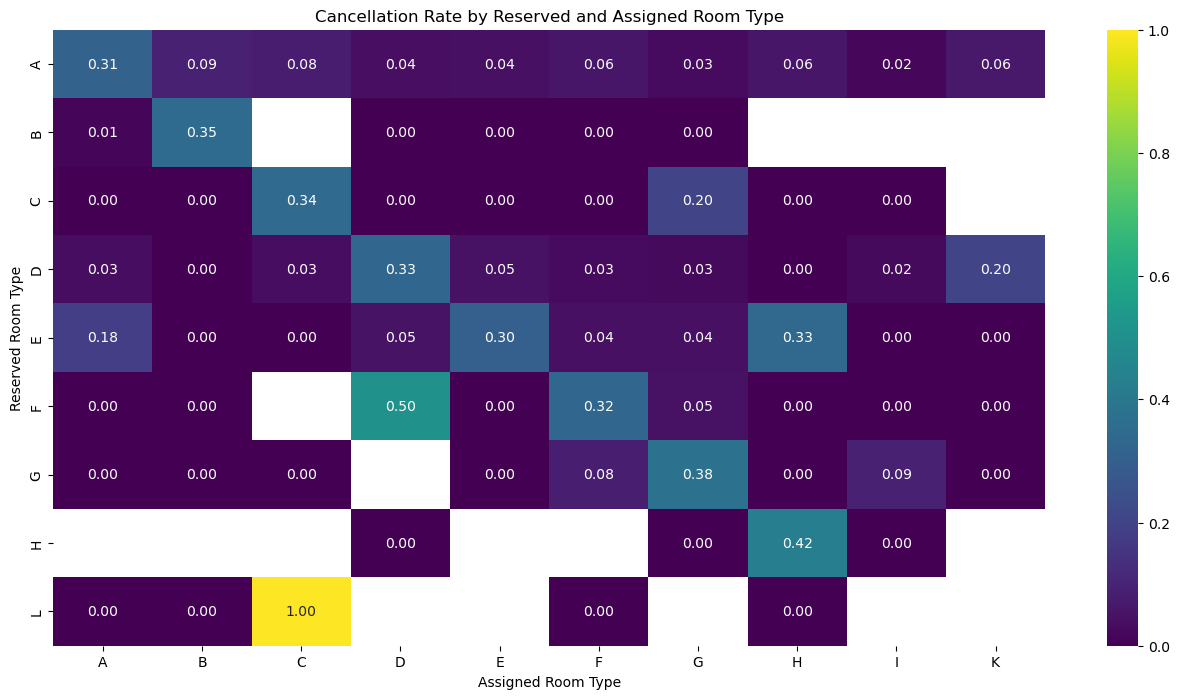

In [191]:
pd.set_option('display.max_rows', None)

room_type_cancellation = df.groupby(['reserved_room_type', 'assigned_room_type'])['is_canceled'].agg(['mean', 'sum'])

room_type_cancellation = room_type_cancellation.rename(
    columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}
)

room_type_cancellation['total_bookings'] = (
    room_type_cancellation['canceled_bookings_count'] / room_type_cancellation['cancellation_rate']
)

room_type_cancellation.fillna(0, inplace=True)

display(room_type_cancellation)

plt.figure(figsize=(16, 8))
pivot_table = room_type_cancellation.pivot_table(
    index='reserved_room_type', columns='assigned_room_type', values='cancellation_rate'
)
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cancellation Rate by Reserved and Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()

pd.reset_option('display.max_rows')

Temuan :

Tingkat pembatalan bervariasi antar tipe kamar, dengan beberapa kamar seperti G → G (37.64%), H → H (42.26%), dan E → E (29.87%) memiliki pembatalan tinggi, sementara kombinasi seperti B → A (1.32%) atau D → A (3.21%) memiliki pembatalan rendah, menunjukkan bahwa perubahan atau upgrade kamar dapat mempengaruhi keputusan pelanggan. Beberapa kombinasi tidak memiliki pembatalan sama sekali, kemungkinan karena jumlah pemesanannya kecil atau pelanggan puas dengan perubahan kamar.

### C | Pengaruh Permintaan Khusus Pelanggan (`total_of_special_requests`) Pada Pembatalan Pemesanan

,cancellation_rate,canceled_bookings_count,total_bookings
total_of_special_requests,,,
0,0.335444,14460,43107.0
1,0.225969,6439,28495.0
2,0.214261,2482,11584.0
3,0.173410,390,2249.0
4,0.108911,33,303.0
5,0.055556,2,36.0


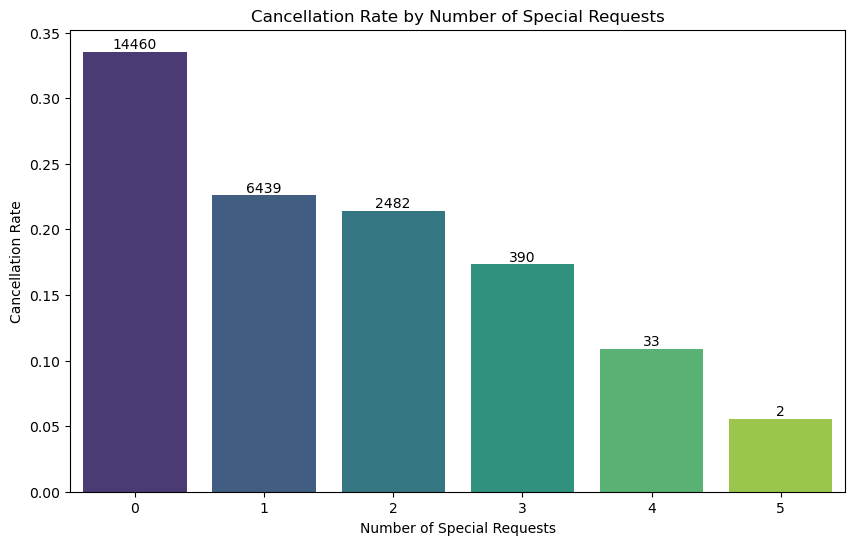

In [192]:
special_requests_cancellation = df.groupby('total_of_special_requests')['is_canceled'].agg(['mean', 'sum'])

special_requests_cancellation = special_requests_cancellation.rename(
    columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}
)

special_requests_cancellation['total_bookings'] = (
    special_requests_cancellation['canceled_bookings_count'] / special_requests_cancellation['cancellation_rate']
)

special_requests_cancellation.fillna(0, inplace=True)

display(special_requests_cancellation)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_of_special_requests', y='cancellation_rate', data=special_requests_cancellation, palette='viridis')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')

for i, row in special_requests_cancellation.iterrows():
    plt.text(i, row['cancellation_rate'], f"{int(row['canceled_bookings_count'])}", ha='center', va='bottom', color='black')

plt.show()


Temuan :

Semakin banyak permintaan khusus (special requests) yang diajukan, semakin rendah tingkat pembatalan. Pelanggan tanpa permintaan khusus memiliki tingkat pembatalan tertinggi (33.54%), sementara mereka yang mengajukan 5 permintaan khusus hanya memiliki tingkat pembatalan 5.56%. Hal ini menunjukkan bahwa pelanggan dengan lebih banyak permintaan kemungkinan lebih terencana dan berkomitmen terhadap pemesanannya, sehingga lebih kecil kemungkinan untuk membatalkan.

## 5 | Pengaruh Faktor Eksternal Pada Pembatalan Pemesanan

### A | Pengaruh Negara Asal Pelanggan (country) Pada Tingkat Pembatalan Pemesanan

,cancellation_rate,canceled_bookings_count,total_bookings
country,,,
PRT,0.363238,9689,26674.0
GBR,0.190991,1980,10367.0
FRA,0.196449,1726,8786.0
ESP,0.257773,1857,7204.0
DEU,0.195567,1050,5369.0
ITA,0.350837,1069,3047.0
IRL,0.221336,666,3009.0
BEL,0.197381,407,2062.0
BRA,0.364927,720,1973.0


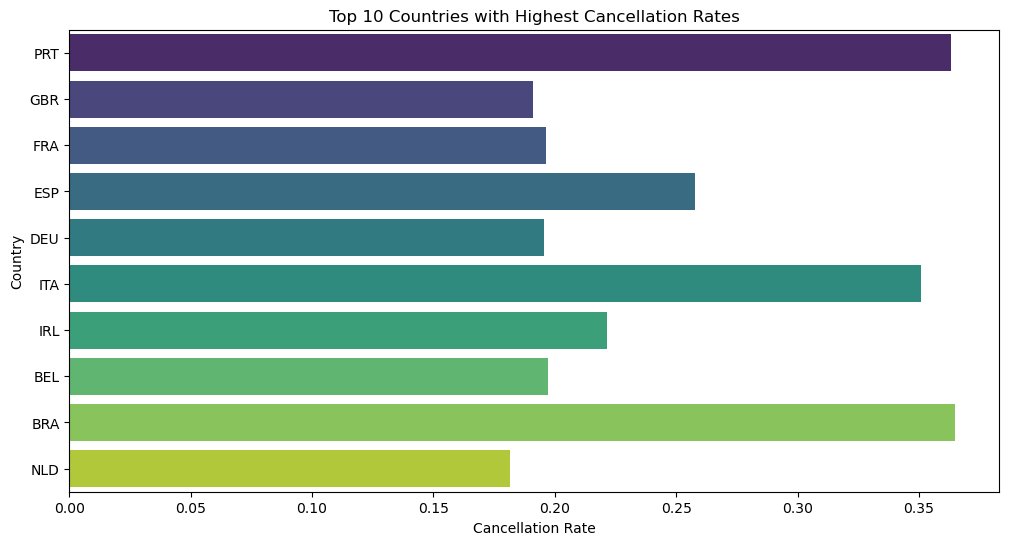

In [193]:
country_cancellation = df.groupby('country')['is_canceled'].agg(['mean', 'sum'])

country_cancellation = country_cancellation.rename(
    columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}
)

country_cancellation['total_bookings'] = (
    country_cancellation['canceled_bookings_count'] / country_cancellation['cancellation_rate']
)

country_cancellation.fillna(0, inplace=True)

country_cancellation = country_cancellation.sort_values(by='total_bookings', ascending=False)

display(country_cancellation.head(10).sort_values(by='total_bookings', ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(x='cancellation_rate', y=country_cancellation.head(10).index, data=country_cancellation.head(10), palette='viridis')
plt.title('Top 10 Countries with Highest Cancellation Rates')
plt.xlabel('Cancellation Rate')
plt.ylabel('Country')
plt.show()


Temuan :

Tingkat pembatalan bervariasi berdasarkan negara asal pelanggan. Portugal (PRT) dan Brasil (BRA) memiliki tingkat pembatalan tertinggi, masing-masing 36.32% dan 36.49%, menunjukkan bahwa pelanggan dari negara ini lebih sering membatalkan reservasi. Italia (ITA) juga memiliki tingkat pembatalan tinggi (35.08%), sedangkan Belanda (NLD) dan Inggris (GBR) memiliki tingkat pembatalan terendah, masing-masing 18.17% dan 19.10%. Ini menunjukkan bahwa pelanggan dari negara-negara tertentu mungkin lebih cenderung membatalkan dibandingkan yang lain, kemungkinan karena faktor ekonomi, kebijakan perjalanan, atau kebiasaan pemesanan.

### B | Pengaruh Jumlah Tempat Parkir Yang Dipesan (`required_car_parking_spaces`) Terhadap Pembatalan Pemesanan

,required_car_parking_spaces,cancellation_rate,canceled_bookings_count,total_bookings
0,0,0.303057,23806,78553
1,1,0.000000,0,7190
2,2,0.000000,0,28
3,3,0.000000,0,3


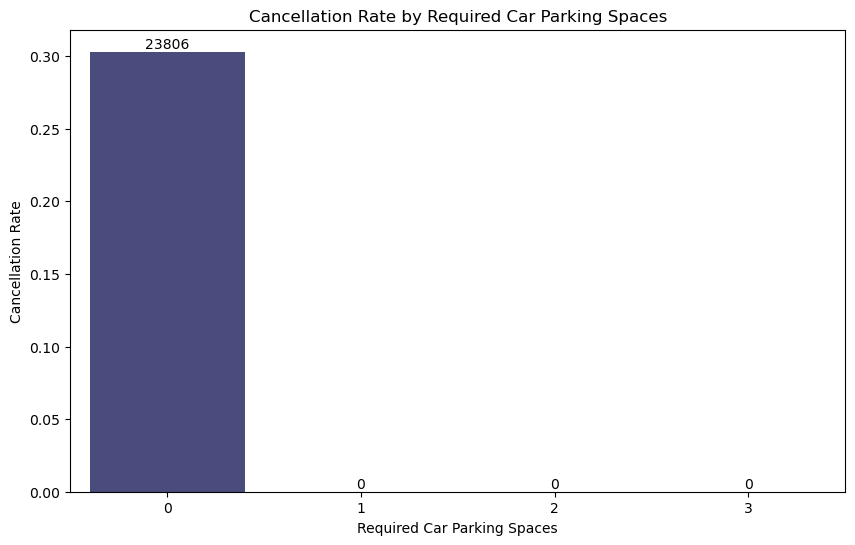

In [194]:
total_bookings = df.groupby('required_car_parking_spaces').size().reset_index(name='total_bookings')

parking_cancellation = df.groupby('required_car_parking_spaces')['is_canceled'].agg(['mean', 'sum']).reset_index()

parking_cancellation.rename(
    columns={'mean': 'cancellation_rate', 'sum': 'canceled_bookings_count'}, inplace=True
)

parking_cancellation = parking_cancellation.merge(total_bookings, on='required_car_parking_spaces', how='left')

parking_cancellation.fillna(0, inplace=True)

display(parking_cancellation)

plt.figure(figsize=(10, 6))
sns.barplot(x='required_car_parking_spaces', y='cancellation_rate', data=parking_cancellation, palette='viridis')

plt.title('Cancellation Rate by Required Car Parking Spaces')
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Cancellation Rate')

for index, row in parking_cancellation.iterrows():
    plt.text(row['required_car_parking_spaces'], row['cancellation_rate'],
             f"{int(row['canceled_bookings_count'])}", ha='center', va='bottom', color='black')

plt.show()


Temuan :

Data menunjukkan bahwa pelanggan yang tidak memesan tempat parkir (0 spaces) memiliki tingkat pembatalan sebesar 30.31%, sedangkan mereka yang memesan tempat parkir (1 space atau lebih) tidak membatalkan reservasi sama sekali (0%). Hal ini mengindikasikan bahwa pelanggan yang membutuhkan tempat parkir cenderung lebih pasti dengan pemesanannya, sementara pelanggan tanpa kebutuhan parkir lebih rentan membatalkan reservasi.

In [195]:
! pip install catboost
import pandas as pd
import numpy as np
from IPython import get_ipython
from IPython.display import display
import missingno as msno
# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
# Preprocessing the data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
#
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import HistGradientBoostingClassifier
#
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
# contoh hasil resampler pada semua undersampler
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version= 1)
nm2 = NearMiss(version= 2)
nm3 = NearMiss(version= 3)

import matplotlib.pyplot as plt
import seaborn as sns
#

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Encoding

1. One Hot Encoding
One Hot Encoding untuk kolom : digunakan karena memiliki fitur yang sedikit dan juga digunakan untuk mengonversi kolom kategorikal yang memiliki beberapa kategori menjadi beberapa fitur biner (0 atau 1). Setiap kategori akan diwakili oleh satu kolom biner yang menunjukkan apakah kategori tersebut ada pada entri data.
- Mengubah feature hotel menggunakan OneHotEncoder, karena feature ini tidak memiliki urutan/bukan data ordinal, dan hanya terdiri dari 2 kategori (City Hotel dan Resort Hotel).
- Mengubah feature meal menggunakan OneHotEncoder, karena feature ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah unique values datanya yang hanya berjumlah 4 kategori.
- Mengubah feature distribution_channel menggunakan OneHotEncoder, karena fitur ini bersifat kategorikal tanpa hubungan ordinal, serta memiliki jumlah kategori yang terbatas.
- Mengubah feature market_segment menggunakan OneHotEncoder, karena fitur ini merepresentasikan berbagai segmen pasar tanpa hubungan hierarkis di antara kategori-kategorinya.
- Mengubah feature customer_type menggunakan OneHotEncoder, karena fitur ini memiliki beberapa kategori yang tidak memiliki urutan tertentu dan jumlahnya terbatas.
- Mengubah feature deposit_type menggunakan OneHotEncoder, karena fitur ini bersifat kategorikal dengan jumlah kategori yang sedikit dan tidak memiliki hubungan ordinal.
Mengubah feature assigned_room_type menggunakan OneHotEncoder, karena fitur ini berupa kode kategori kamar yang tidak memiliki hubungan ordinal, sehingga perlu diubah menjadi beberapa fitur biner.
- Mengubah feature reserved_room_type menggunakan OneHotEncoder, karena fitur ini menunjukkan jenis kamar yang dipesan tanpa hubungan urutan antar kategorinya.

2. Binary encoding
- Merubah fitur/kolom country menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.

3. Ordinal encoding
- Merubah Ordinal Encoding untuk kolom arrival_date_month: Digunakan karena bulan memiliki urutan yang bermakna secara temporal. Dengan mengonversinya ke format numerik (1-12), model dapat memahami pola musiman dalam data tanpa meningkatkan dimensi dataset seperti pada One-Hot Encoding.

4. Robust Scaler
- Fitur Numerikal memakai robust scaler : RobustScaler tahan terhadap outlier karena menggunakan median dan IQR untuk skala data, sehingga lebih stabil pada data dengan distribusi tidak normal atau nilai ekstrim. Ideal untuk dataset yang mengandung outlier.

## Feature Engineering

Dalam tahap praproses data, kami melakukan seleksi fitur dengan menghapus beberapa kolom yang dianggap tidak relevan atau berpotensi menyebabkan data leakage. Secara spesifik, kami menghapus kolom:

- "reservation_status" dan "reservation_status_date": Kolom ini mengandung informasi yang secara langsung menunjukkan status pembatalan reservasi. Menggunakan kolom ini dalam pelatihan model dapat menyebabkan data leakage, yaitu model “membocorkan” informasi target, sehingga menghasilkan performa yang terlalu optimis dan tidak dapat digeneralisasi ke data baru
- "total_night" dan "arrival_date" dihapus karena kedua kolom tersebut terutama kami manfaatkan untuk keperluan eksplorasi data (EDA). Kami ingin menggunakan dataset yang sudah ada dalam bentuk aslinya, sehingga dengan menghapus kolom-kolom tersebut, kami menjaga keseragaman data yang digunakan untuk pembangunan model. Pendekatan ini juga memudahkan perbandingan hasil dengan penelitian atau aplikasi lain yang menggunakan dataset serupa.

In [196]:
df= df.drop(columns = [
    "reservation_status", 
    "reservation_status_date",
    "total_night",
    "arrival_date"
])

## Data Splitting

In [197]:
X = df.drop(columns=['is_canceled'], axis=1)
y = df['is_canceled']

Pada tahap ini, kita sedang memisahkan fitur (X) dan target (y) agar model dapat dilatih dengan benar untuk memprediksi pembatalan reservasi.

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000, stratify = y)

Splitting ini membagi dataset menjadi 80% data latih dan 20% data uji menggunakan train_test_split.

* stratify=y memastikan distribusi kelas tetap seimbang antara data latih dan uji, penting untuk dataset yang tidak seimbang seperti prediksi pembatalan reservasi hotel.
* random_state=1000 menjaga hasil pembagian tetap konsisten setiap kali kode dijalankan.
* Pembagian ini membantu model belajar dari cukup data dan dievaluasi dengan adil, sehingga prediksi pembatalan lebih akurat dan dapat diandalkan.

In [199]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((68619, 28), (17155, 28), (68619,), (17155,))

- (68619, 28) → X_train: 68.620 baris (sampel) dan 28 fitur (kolom).
- (17155, 28) → X_test: 17.156 baris (sampel) dan 28 fitur (kolom).
- (68619,) → y_train: 68.620 label target (hanya 1 kolom, tanpa fitur).
- (17155,) → y_test: 17.156 label target.

In [200]:
round(df["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    72.25
1    27.75
Name: count, dtype: float64

In [201]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

Define fitur numeric untuk encoding nantinya

## Transform

In [203]:
room_type_mapping = [{'col':'arrival_date_month', 'mapping' :{
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September' : 9,
    'October': 10,
    'November': 11,
    'December': 12
}}]

In [204]:
preprocessor = ColumnTransformer(
    transformers=[
      ('num', RobustScaler() , numeric_cols),
      ('cat', OneHotEncoder(drop= 'first'), ['hotel','meal','distribution_channel','market_segment', 'customer_type', 'deposit_type','assigned_room_type','reserved_room_type']),
      ('ordinal', ce.OrdinalEncoder(mapping= room_type_mapping), ['arrival_date_month']),
      ('cat_county', BinaryEncoder(), ['country']),
    ],remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', RobustScaler(),
                                 Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting...
                                  'market_segment', 'customer_type',
                                  'deposit_type', 'assigned_room_type',
                                  'reserved_room_type']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'arrival_date_month',
                                                          'data_type': dtype('O'),
                                                          'mapping': January       1
February      2
March         3
April         4
May           5
June          6
July          7
August        8
September     9
October      10
November     11
December     12
dtype: int64}]),
                                 ['arrival_date_month']),
                                ('cat_county', BinaryEncoder(), ['country'])])

# MODELLING AND EVALUATION

Metrik evaluasi yang digunakan nantinya adalah Recall, Precision, dan F2-score. Berikut penjelasan singkat masing-masing:

Recall:
Mengukur seberapa banyak kasus pembatalan yang berhasil dideteksi oleh model. Recall yang tinggi penting untuk meminimalkan false negatives, yaitu kasus di mana reservasi yang sebenarnya dibatalkan tidak terdeteksi.
Precision:
Menunjukkan seberapa akurat prediksi model dalam mengidentifikasi pembatalan. Precision yang tinggi berarti sebagian besar prediksi pembatalan benar-benar terjadi, namun jika terlalu tinggi, bisa berarti model melewatkan beberapa pembatalan (false negatives).
F2-score:
Merupakan kombinasi antara Recall dan Precision, tetapi memberikan bobot lebih besar pada Recall. Metrik ini sangat relevan dalam konteks bisnis hotel, karena lebih diutamakan untuk menangkap sebanyak mungkin pembatalan meskipun ada peningkatan false positives.

Menggunakan berbagai algoritma dalam pembangunan model machine learning memungkinkan perbandingan kinerja untuk menemukan yang paling efektif, berdasarkan metrik seperti akurasi, precision, dan recall. Menguji beberapa model mengurangi risiko ketergantungan pada satu model dan membantu menghindari overfitting atau underfitting, sehingga model lebih mudah menggeneralisasi pada data baru.

Pendekatan ensemble seperti Random Forest dan Gradient Boosting menggabungkan kekuatan beberapa model untuk meningkatkan akurasi. Setiap model memiliki kekuatan tertentu, misalnya XGBoost unggul untuk data besar, sementara Logistic Regression cocok untuk masalah klasifikasi sederhana.

Dengan mendiversifikasi model, kita dapat memilih yang paling sesuai dengan karakteristik data dan mengoptimalkan kinerja untuk solusi terbaik.

In [205]:
lr = LogisticRegression(random_state=42, max_iter = 1000)
dt = DecisionTreeClassifier(random_state=42, max_depth = 6)
knn = KNeighborsClassifier(n_neighbors=3)
vh = VotingClassifier([
    ('lr',lr),
    ('dt',dt),
    ('knn',knn)
], voting = 'hard')
vs = VotingClassifier([
    ('lr',lr),
    ('dt',dt),
    ('knn',knn)
], voting = 'soft')
stacking = StackingClassifier([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
], LogisticRegression(random_state=42))
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose = 0)
hgb = HistGradientBoostingClassifier(random_state=42)

In [206]:
# Initialize models
models = {
    'Decision Tree': dt,
    'KNN': knn,
    'Logistic Regression': lr,
    'Voting Classifier (Hard)': vh,
    'Voting Classifier (Soft)': vs,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'CatBoost': cat,
}


## Model Benchmarking Tanpa Cross-Validation (Holdout Method)

Pada pendekatan ini, dataset dibagi satu kali menjadi data pelatihan (training set) dan data pengujian (test set). Evaluasi model dilakukan hanya pada satu pembagian data tersebut.

In [207]:
results = []
for model_name, model in models.items():
    print(f'model: {model_name} processing...')
    
    # Create a pipeline with the preprocessing and model
    pipeline = Pipeline(steps=[
          ('prep', preprocessor),
          ('model', model)])

    # Training model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    f2 = fbeta_score(y_test, y_pred, beta=2)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f'F2 score: {f2}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    
    # Store results
    results.append({
        'Model': model_name,
        'F2 Score': f2,
        'Recall': recall,
        'Precision': precision
    })

df_results = pd.DataFrame(results)
print(df_results)


model: Decision Tree processing...
F2 score: 0.46322827125119387
Recall: 0.42785129174543163
Precision: 0.6921508664627931
model: KNN processing...
F2 score: 0.6028205557415467
Recall: 0.6051249737450115
Precision: 0.5937757625721352
model: Logistic Regression processing...
F2 score: 0.4809641811218743
Recall: 0.44843520268851084
Precision: 0.6775626785147573
model: Voting Classifier (Hard) processing...
F2 score: 0.5157405736965542
Recall: 0.4803612686410418
Precision: 0.7311381074168798
model: Voting Classifier (Soft) processing...
F2 score: 0.5563728768222549
Recall: 0.5242596093257719
Precision: 0.7369353410097431
model: Random Forest processing...
F2 score: 0.6706841238186074
Recall: 0.6498634740600714
Precision: 0.7692690203878667
model: Gradient Boosting processing...
F2 score: 0.5544847371016182
Recall: 0.5196387313589582
Precision: 0.7577335375191424
model: XGBoost processing...
F2 score: 0.6893004115226338
Recall: 0.6754883427851291
Precision: 0.7507002801120448
model: CatBoo

Berdasarkan hasil benchmarking dengan holdout method, model ensemble (Random Forest, XGBoost, dan CatBoost) menunjukkan performa yang lebih unggul. CatBoost mencapai F2-score 0.692 dan recall 0.679, sedangkan XGBoost mencatat F2-score 0.689 dan recall 0.675. Model-model ini secara konsisten mengungguli model tradisional dan voting classifiers.

## Model Benchmarking dengan Cross-Validation (Stratified K-Fold CV)

Pendekatan ini membagi dataset menjadi beberapa subset (fold) secara berulang, di mana masing-masing fold mempertahankan proporsi kelas target yang sama (stratified). Model dilatih dan dievaluasi secara bergantian pada setiap fold, dan hasil akhirnya diambil sebagai rata-rata dari semua fold.

In [208]:
f2_scorer = make_scorer(fbeta_score, beta=2)

results = []
for model_name, model in models.items():
    print(f'model: {model_name} processing...')
    
    pipeline = Pipeline(steps=[
          ('prep', preprocessor),
          ('model', model)])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
    recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

    results.append({
        'Model': model_name,
        'Mean F2 Score': np.mean(f2_scores),
        'Mean Recall': np.mean(recall_scores),
        'Mean Precision': np.mean(precision_scores),
        'Std F2 Score': np.std(f2_scores),
        'Std Recall': np.std(recall_scores),
        'Std Precision': np.std(precision_scores)
    })

df_results = pd.DataFrame(results)
df_results

model: Decision Tree processing...
model: KNN processing...
model: Logistic Regression processing...
model: Voting Classifier (Hard) processing...
model: Voting Classifier (Soft) processing...
model: Random Forest processing...
model: Gradient Boosting processing...
model: XGBoost processing...
model: CatBoost processing...


,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Decision Tree,0.468118,0.432449,0.698799,0.012992,0.012929,0.010746
1,KNN,0.593444,0.592281,0.598249,0.005410,0.007120,0.002636
2,Logistic Regression,0.482520,0.450249,0.677242,0.013945,0.015189,0.008165
3,Voting Classifier (Hard),0.518621,0.483697,0.729449,0.010129,0.010687,0.003966
4,Voting Classifier (Soft),0.557487,0.525965,0.733424,0.007149,0.007978,0.001956
5,Random Forest,0.661502,0.638803,0.771140,0.004270,0.004641,0.004745
6,Gradient Boosting,0.567894,0.535049,0.752850,0.006192,0.006677,0.006647
7,XGBoost,0.698249,0.685849,0.752762,0.007598,0.008787,0.003583
8,CatBoost,0.698497,0.684327,0.761633,0.005740,0.006740,0.002697


Berdasarkan hasil evaluasi model menggunakan Mean Recall dan Mean F2 Score, tiga model terbaik untuk memprediksi apakah suatu reservasi akan dibatalkan atau tidak (is_canceled) adalah:

CatBoost (Mean Recall: 0.6843, Mean F2 Score: 0.6985)
XGBoost (Mean Recall: 0.6858, Mean F2 Score: 0.6982)
Random Forest (Mean Recall: 0.6388, Mean F2 Score: 0.6615)
Saya memilih model berdasarkan Recall karena metrik ini sangat penting dalam mendeteksi pemesanan yang berpotensi dibatalkan. Recall yang tinggi membantu mengurangi risiko False Negatives, yaitu kasus di mana pemesanan sebenarnya dibatalkan tetapi model salah mengklasifikasikannya sebagai tidak dibatalkan.

Selain Recall, Mean F2 Score juga menjadi pertimbangan utama karena metrik ini memberikan bobot lebih besar pada Recall dibandingkan Precision. Dalam konteks bisnis hotel, lebih baik memiliki lebih banyak "peringatan dini" terkait kemungkinan pembatalan daripada melewatkan kasus pembatalan yang sebenarnya terjadi.

Dengan fokus pada tiga model terbaik ini, proses optimasi seperti hyperparameter tuning dan resampling dapat dilakukan secara lebih efisien untuk meningkatkan kinerja prediksi dan membantu hotel dalam mengelola risiko pembatalan dengan lebih akurat.

## Eksperimen mencari model terbaik (Catboost,Xgboost dan Random Forest) dengan resampling methods

Resampling diperlukan untuk mengatasi ketidakseimbangan kelas dalam dataset, sehingga model tidak bias terhadap kelas mayoritas dan dapat belajar lebih baik dari kelas minoritas. Berikut metode resampling yang digunakan:

- Random Under Sampler:
Mengurangi jumlah sampel dari kelas mayoritas secara acak agar proporsinya seimbang.
- Neighbourhood Cleaning Rule (NCR):
Menghapus sampel mayoritas yang berdekatan dengan sampel minoritas yang dianggap noise, sehingga membersihkan data dari outlier.
- Random Over Sampler:
Menambah jumlah sampel kelas minoritas dengan menduplikasi data yang ada.
- SMOTE:
Menghasilkan sampel sintetis baru untuk kelas minoritas dengan menginterpolasi antara sampel minoritas dan tetangganya, sehingga menciptakan variasi data yang lebih natural.
- ADASYN:
Mirip dengan SMOTE, namun jumlah sampel sintetis yang dibuat disesuaikan berdasarkan tingkat kesulitan (densitas) masing-masing sampel minoritas, sehingga fokus pada daerah yang kurang representatif.
Dengan demikian, penggunaan metode resampling membantu memastikan model dapat menangkap pola pada kedua kelas secara seimbang dan meningkatkan kinerja prediksi-

In [209]:
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'CatBoost': cat,
}

resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(random_state=42),
   'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
   'Random Over Sampler': RandomOverSampler(random_state=42),
   'SMOTE': SMOTE(random_state=42),
   'ADASYN': ADASYN(random_state=42)
}

results = []

for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")

        pipeline = Pipeline(steps=[
            ('prep', preprocessor),  
            ('resampling', resampling),
            ('model', model) 
        ])

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scoring_metrics = {'f2': f2_scorer, 'recall': 'recall', 'precision': 'precision'}
        scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring_metrics, return_train_score=False)

        results.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F2 Score': np.mean(scores['test_f2']),
            'Mean Recall': np.mean(scores['test_recall']),
            'Mean Precision': np.mean(scores['test_precision']),
            'Std F2 Score': np.std(scores['test_f2']),
            'Std Recall': np.std(scores['test_recall']),
            'Std Precision': np.std(scores['test_precision'])
        })

results_df = pd.DataFrame(results)
results_df



Model: Random Forest processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
Model: XGBoost processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
Model: CatBoost processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Random Forest,Random Under Sampler,0.789999,0.847309,0.621809,0.005104,0.006827,0.002929
1,Random Forest,Neighbourhood Cleaning Rule,0.771633,0.805198,0.661403,0.005286,0.007070,0.002986
2,Random Forest,Random Over Sampler,0.716918,0.714361,0.727349,0.006512,0.006794,0.006187
3,Random Forest,SMOTE,0.699011,0.690260,0.736369,0.004485,0.004286,0.006273
4,Random Forest,ADASYN,0.708999,0.703177,0.733299,0.005136,0.005178,0.005935
5,XGBoost,Random Under Sampler,0.802870,0.866737,0.620103,0.002969,0.003078,0.002901
6,XGBoost,Neighbourhood Cleaning Rule,0.785040,0.828039,0.650045,0.002829,0.002783,0.004867
7,XGBoost,Random Over Sampler,0.798263,0.852507,0.636359,0.006651,0.008127,0.005655
8,XGBoost,SMOTE,0.720945,0.718036,0.732888,0.008131,0.009388,0.004862
9,XGBoost,ADASYN,0.721525,0.719349,0.730414,0.005607,0.006497,0.004974


Berdasarkan hasil evaluasi model dengan berbagai metode resampling, performa CatBoost dan XGBoost menunjukkan hasil yang hampir seimbang dalam hal Mean Recall dan Mean F2 Score, sementara model Random Forest sedikit tertinggal.

- CatBoost dengan Random Under Sampler (RUS) mencapai Mean F2 Score sebesar 0.8078 dan Mean Recall sebesar 0.8730.
- XGBoost dengan Random Under Sampler mencatatkan Mean F2 Score sebesar 0.8029 dan Mean Recall sebesar 0.8667.
- Random Forest dengan Random Under Sampler memperoleh Mean F2 Score sebesar 0.7900 dan Mean Recall sebesar 0.8473.
Perbedaan antara F2 Score dan Recall pada CatBoost dan XGBoost sangat tipis, yang menunjukkan bahwa kedua model memiliki kapabilitas serupa dalam menangkap pola pembatalan reservasi. Di sisi lain, Random Under Sampler terbukti menjadi metode resampling yang paling efektif, karena secara konsisten memberikan kombinasi nilai Recall dan F2 Score yang lebih tinggi pada ketiga model. Namun, performa Random Forest masih sedikit di bawah dua model lainnya, sehingga dalam konteks ini, XGBoost dan CatBoost lebih unggul.

Sebelum melakukan hyperparameter tuning, kami juga akan menguji kembali ketiga model terbaik (CatBoost, XGBoost, dan Random Forest) dengan resampler terbaik sambil menghapus outlier menggunakan metode Interquartile Range (IQR). Eksperimen ini bertujuan untuk melihat apakah penghapusan outlier dapat lebih meningkatkan performa model sebelum tuning dilakukan.

## Eksperimen 3 Model Dengan Resampler Terbaik + Hapus Outliers Dengan IQR

Dalam eksperimen ini, kami menguji tiga model terbaik (misalnya, XGBoost, CatBoost, dan Random Forest) dengan mengaplikasikan metode resampling terbaik untuk mengatasi ketidakseimbangan kelas. Selain itu, kami menghapus outlier menggunakan metode Interquartile Range (IQR) untuk:

Mengurangi Noise: Outlier dapat mempengaruhi model secara signifikan, sehingga menghapusnya membantu menghasilkan data yang lebih representatif dan bersih.
Meningkatkan Robustness Model: Data yang telah dibersihkan dari nilai ekstrim memungkinkan model belajar dengan lebih baik dan menghasilkan prediksi yang lebih stabil.
Kombinasi teknik resampling (untuk menyeimbangkan kelas) dan penghapusan outlier (untuk membersihkan data) diharapkan dapat meningkatkan performa model secara keseluruhan, sehingga model dapat menangkap pola pembatalan reservasi dengan lebih akurat dan andal.

In [210]:
numerik = X_train.select_dtypes(include='number')

Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (numerik >= lower_bound) & (numerik <= upper_bound)
mask = mask.all(axis=1)  

X_train_iqr = X_train[mask]

y_train_iqr = y_train[mask]

print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_iqr.shape[0])

Jumlah baris sebelum penghapusan outlier: 68619
Jumlah baris setelah penghapusan outlier: 31639


In [211]:
from imblearn.pipeline import Pipeline

models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'CatBoost': cat,
}

best_resampling = RandomUnderSampler(random_state=42)

results = []
for model_name, model in models.items():
    print(f'model: {model_name} processing...')

    pipeline = Pipeline(steps=[
        ('prep', preprocessor),
        ('resampling', best_resampling),  
        ('model', model)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    f2_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring=f2_scorer)
    recall_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='recall')
    precision_scores = cross_val_score(pipeline, X_train_iqr, y_train_iqr, cv=cv, scoring='precision')

    results.append({
        'Model': model_name,
        'Mean F2 Score': np.mean(f2_scores),
        'Std F2 Score': np.std(f2_scores),
        'Mean Recall': np.mean(recall_scores),
        'Std Recall': np.std(recall_scores),
        'Mean Precision': np.mean(precision_scores),
        'Std Precision': np.std(precision_scores),
    })

df_results = pd.DataFrame(results)
df_results



model: Random Forest processing...
model: XGBoost processing...
model: CatBoost processing...


,Model,Mean F2 Score,Std F2 Score,Mean Recall,Std Recall,Mean Precision,Std Precision
0,Random Forest,0.775190,0.006377,0.827206,0.007232,0.619417,0.005393
1,XGBoost,0.787203,0.005451,0.843970,0.006584,0.620337,0.004461
2,CatBoost,0.796912,0.002820,0.855584,0.004058,0.625412,0.004280


Setelah melakukan eksperimen dengan menghapus outlier menggunakan metode Interquartile Range (IQR), kami mendapati bahwa performa model justru mengalami penurunan dibandingkan dengan hasil sebelumnya.

Penurunan ini menunjukkan bahwa penghapusan outlier tidak selalu meningkatkan performa model, terutama dalam kasus klasifikasi dengan data yang tidak seimbang. Dalam konteks ini, outlier mungkin mengandung informasi penting yang membantu model dalam membedakan pola pembatalan reservasi.

Oleh karena itu, kami akan menggunakan hasil sebelum penghapusan outlier untuk proses hyperparameter tuning. Dengan tetap mempertahankan dataset awal (tanpa outlier removal), kami dapat mengoptimalkan parameter model CatBoost dan XGBoost dengan Random Under Sampler untuk mendapatkan performa terbaik dalam memprediksi pembatalan reservasi

# Hyperparameter Tuning

## XGBoost Tuning

Untuk meningkatkan performa model prediksi pembatalan reservasi hotel, saya akan melakukan hyperparameter tuning pada XGBoost menggunakan RandomizedSearchCV. Tujuan tuning ini adalah untuk menemukan kombinasi parameter terbaik yang dapat meningkatkan kemampuan model dalam mengidentifikasi pelanggan yang berpotensi membatalkan reservasi, dengan fokus pada F2-score.

Penjelasan Hyperparameter yang Dicoba:
- n_estimators: Jumlah pohon keputusan yang digunakan dalam boosting (100 hingga 500, dalam kenaikan 100).
- learning_rate: Mengontrol seberapa cepat model belajar dari kesalahan (0.01 hingga 0.3, dengan 5 nilai berbeda).
- max_depth: Kedalaman maksimum setiap pohon keputusan (3, 5, atau 7).
- min_child_weight: Menentukan jumlah minimum bobot sampel yang dibutuhkan untuk membuat split baru (1, 3, atau 5).
- gamma: Minimum loss reduction yang diperlukan untuk melakukan split pada node (0, 0.1, atau 0.2).
- subsample: Proporsi data yang digunakan untuk membangun setiap pohon, yang membantu mengurangi overfitting (0.6 hingga 1.0 dalam 4 nilai).
- colsample_bytree: Proporsi fitur yang dipilih secara acak untuk membangun setiap pohon (0.6 hingga 1.0 dalam 4 nilai).
- scale_pos_weight: Menyeimbangkan bobot kelas untuk menangani ketidakseimbangan dalam dataset (1, 3, atau 5).
Pemilihan parameter ini didasarkan pada panduan tuning parameter yang disarankan oleh dokumentasi resmi XGBoost. (https://xgboost.readthedocs.io/en/stable/parameter.html?utm_source=chatgpt.com)

Untuk mengoptimalkan model, saya akan menggunakan RandomizedSearchCV, yang memungkinkan pencarian hyperparameter secara acak dalam ruang parameter yang telah ditentukan. Pendekatan ini sering digunakan untuk menemukan kombinasi parameter yang optimal dengan efisiensi yang lebih tinggi dibandingkan Grid Search tradisional.
(Referensi Randomized Search)

In [212]:
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('balencing', RandomUnderSampler(random_state=42)),
    ('model', xgb)
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [213]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F2 Score: {fbeta_score(y_test, y_pred, beta=2)}')

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     12394
           1       0.61      0.86      0.72      4761

    accuracy                           0.81     17155
   macro avg       0.77      0.83      0.79     17155
weighted avg       0.85      0.81      0.82     17155

F2 Score: 0.7954898911353032


In [214]:
f2_scorer = make_scorer(fbeta_score, beta=2)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

param_distributions = {
    'model__n_estimators': np.arange(100, 501, 100),  
    'model__learning_rate': np.linspace(0.01, 0.3, 5),  
    'model__max_depth': [3, 5, 7],  
    'model__min_child_weight': [1, 3, 5],  
    'model__gamma': [0, 0.1, 0.2],  
    'model__subsample': np.linspace(0.6, 1.0, 4),  
    'model__colsample_bytree': np.linspace(0.6, 1.0, 4),  
    'model__scale_pos_weight': [1, 3, 5],  
}

xgb_model = Pipeline([
    ('preprocessor', preprocessor),  
    ('balancing', RandomUnderSampler(random_state=42)),  
    ('model', XGBClassifier())
])

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_tuning = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    scoring={'F2 Score': f2_scorer, 'Precision': precision_scorer, 'Recall': recall_scorer},
    refit='F2 Score',
    cv=skfold,
    verbose=1,
    n_jobs=-1,
    n_iter=300,  
    random_state=42
)

xgb_tuning.fit(X_train, y_train)

best_params = xgb_tuning.best_params_
print("Best Parameters:", best_params)

xgb_model.set_params(**best_params)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

f2_score_best = fbeta_score(y_test, y_pred, beta=2)
precision_best = precision_score(y_test, y_pred)
xgb_recall_best = recall_score(y_test, y_pred)

print(f"Final Model - F2 Score: {f2_score_best:.4f}")
print(f"Final Model - Precision: {precision_best:.4f}")
print(f"Final Model - Recall: {xgb_recall_best:.4f}")


Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best Parameters: {'model__subsample': 0.8666666666666667, 'model__scale_pos_weight': 3, 'model__n_estimators': 400, 'model__min_child_weight': 5, 'model__max_depth': 7, 'model__learning_rate': 0.08249999999999999, 'model__gamma': 0.2, 'model__colsample_bytree': 0.8666666666666667}
Final Model - F2 Score: 0.8173
Final Model - Precision: 0.5250
Final Model - Recall: 0.9494


In [215]:
best_params

{'model__subsample': 0.8666666666666667,
 'model__scale_pos_weight': 3,
 'model__n_estimators': 400,
 'model__min_child_weight': 5,
 'model__max_depth': 7,
 'model__learning_rate': 0.08249999999999999,
 'model__gamma': 0.2,
 'model__colsample_bytree': 0.8666666666666667}

In [216]:
xgb_recall_best

0.9493803822726318

Summary
| Model |F2|recall |
| --- | --- | --- |
| XGBoost benchmark |0.802| 0.866 |
| XGBoost tuned |0.817 |0.949 |

Performa model meningkat setelah dilakukan tuning. Parameter terbaik untuk XGBoost adalah 

 'subsample': 0.8666666666666667,
 'scale_pos_weight': 3,
 'n_estimators': 400,
 'min_child_weight': 5,
 'max_depth': 7,
 'learning_rate': 0.08249999999999999,
 'gamma': 0.2,
 'colsample_bytree': 0.8666666666666667



## Catboost Tuning

Untuk meningkatkan performa model prediksi pembatalan reservasi hotel, saya akan melakukan hyperparameter tuning pada CatBoost menggunakan RandomizedSearchCV. Tujuan tuning ini adalah untuk menemukan kombinasi parameter terbaik yang dapat meningkatkan kemampuan model dalam mengidentifikasi pelanggan yang berpotensi membatalkan reservasi, dengan fokus pada F2-score.

Penjelasan Hyperparameter yang Dicoba:

- iterations: Jumlah pohon keputusan yang dibangun (100 hingga 500, dalam kenaikan 100).
- learning_rate: Mengontrol seberapa cepat model belajar (0.01 hingga 0.3, dengan 5 nilai berbeda).
- depth: Kedalaman maksimum dari setiap pohon keputusan (3 atau 5).
- l2_leaf_reg: Regularisasi L2 untuk mengurangi overfitting (nilai 1, 3, 5, dan 7).
- border_count: Jumlah bins untuk fitur numerik (32, 64, atau 128).
- bagging_temperature: Menentukan kekuatan Bayesian bootstrap untuk meningkatkan generalisasi (0 hingga 1 dalam 5 nilai).
- random_strength: Mengontrol tingkat keacakan dalam split pohon (1 hingga 5 dalam 3 nilai). Pemilihan parameter ini didasarkan pada panduan tuning parameter yang disarankan oleh dokumentasi resmi CatBoost. (https://catboost.ai/docs/en/concepts/parameter-tuning?utm_source=chatgpt.com)

Untuk mengoptimalkan model, saya akan menggunakan RandomizedSearchCV yang memungkinkan pencarian hyperparameter secara acak dalam ruang parameter yang ditentukan. Pendekatan ini sering digunakan untuk menemukan kombinasi parameter yang optimal dengan efisiensi yang lebih tinggi dibandingkan grid search tradisional. (https://www.geeksforgeeks.org/catboost-grid-search-and-random-search/?utm_source=chatgpt.com)

In [217]:
cat_model = Pipeline([
    ('preprocessor', preprocessor),
    ('balencing', RandomUnderSampler(random_state=42)),
    ('model', cat)
])

cat_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_c...
                                                  OrdinalEncoder(mapping=[{'col': 'arrival_date_month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': January       1
February      2
March         3
April         4
May           5
June          6
July          7
August        8
September     9
October      10
November     11
December     12
dtype: int64}]),
                                                  ['arrival_date_month']),
                                                 ('cat_county', BinaryEncoder(),
                                                  ['country'])])),
                ('balencing', RandomUnderSampler(random_state=42)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x31fc521e0>)])

In [218]:
y_pred = cat_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'F2 Score: {fbeta_score(y_test, y_pred, beta=2)}')

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     12394
           1       0.61      0.87      0.72      4761

    accuracy                           0.81     17155
   macro avg       0.78      0.83      0.79     17155
weighted avg       0.85      0.81      0.82     17155

F2 Score: 0.8013430112952684


In [219]:
f2_scorer = make_scorer(fbeta_score, beta=2)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

param_distributions = {
    'model__iterations': np.arange(100, 501, 100), 
    'model__learning_rate': np.linspace(0.01, 0.3, 5),  
    'model__depth': [3, 5], 
    'model__l2_leaf_reg': [1, 3, 5, 7], 
    'model__border_count': [32, 64, 128],  
    'model__bagging_temperature': np.linspace(0, 1, 5),  
    'model__random_strength': np.linspace(1, 5, 3), 
}

cat_model = Pipeline([
    ('preprocessor', preprocessor),  
    ('balancing', RandomUnderSampler(random_state=42)),  
    ('model', CatBoostClassifier(verbose=0))
])

skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cat_tuning = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_distributions,
    scoring={'F2 Score': f2_scorer, 'Precision': precision_scorer, 'Recall': recall_scorer},
    refit='F2 Score',
    cv=skfold,
    verbose=1,
    n_jobs=-1,
    n_iter=100,  
    random_state=42
)

cat_tuning.fit(X_train, y_train)

cat_best_params = cat_tuning.best_params_
print("Best Parameters:", best_params)

cat_model.set_params(**cat_best_params)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)

f2_score_best = fbeta_score(y_test, y_pred, beta=2)
precision_best = precision_score(y_test, y_pred)
cat_recall_best = recall_score(y_test, y_pred)

print(f"Final Model - F2 Score: {f2_score_best:.4f}")
print(f"Final Model - Precision: {precision_best:.4f}")
print(f"Final Model - Recall: {cat_recall_best :.4f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'model__subsample': 0.8666666666666667, 'model__scale_pos_weight': 3, 'model__n_estimators': 400, 'model__min_child_weight': 5, 'model__max_depth': 7, 'model__learning_rate': 0.08249999999999999, 'model__gamma': 0.2, 'model__colsample_bytree': 0.8666666666666667}
Final Model - F2 Score: 0.8011
Final Model - Precision: 0.6125
Final Model - Recall: 0.8679


In [220]:
cat_best_params

{'model__random_strength': 1.0,
 'model__learning_rate': 0.155,
 'model__l2_leaf_reg': 7,
 'model__iterations': 500,
 'model__depth': 5,
 'model__border_count': 32,
 'model__bagging_temperature': 0.5}

In [221]:
cat_recall_best

0.8678848981306448

Summary
| Model |F2| recall |
|--- | --- | -- |
| CatBoost benchmark |0.802| 0.872 |
| CatBoost tuned |0.801|  0.867 |


Setelah dilakukan hyperparameter tuning pada model CatBoost, diperoleh konfigurasi parameter terbaik sebagai berikut:

random_strength: 1.0
learning_rate: 0.155
l2_leaf_reg: 7
iterations: 500
depth: 5
border_count: 32
bagging_temperature: 0.5
Meskipun parameter terbaik ini telah diidentifikasi, evaluasi model menunjukkan bahwa performa model sedikit menurun dibandingkan dengan model benchmark.

Penurunan yang marginal ini menunjukkan bahwa meskipun tuning telah menghasilkan parameter yang optimal menurut kriteria tertentu, model CatBoost pada kondisi awal (benchmark) sudah cukup optimal. Dengan kata lain, perubahan parameter tidak memberikan peningkatan performa yang signifikan, bahkan justru sedikit menurunkan kemampuan model dalam mengidentifikasi pelanggan yang akan membatalkan reservasi.

# Predict to test

In [222]:
xgb_pipe = pipe_model = Pipeline([
    ("preprocessing", preprocessor),
    ("resampler", RandomUnderSampler(random_state=42)),
    ("model", xgb)
])

cat_pipe = pipe_model = Pipeline([
    ("preprocessing", preprocessor),
    ("resampler", RandomUnderSampler(random_state=42)),
    ("model", cat)
])

model_tuned = [
    ("XGBoost Benchmark", xgb_pipe),
    ("XGBooost Tuned", xgb_tuning.best_estimator_),
    ("CatBoost Benchmark", cat_pipe),
    ("Catboost Tuned", cat_tuning.best_estimator_)
]

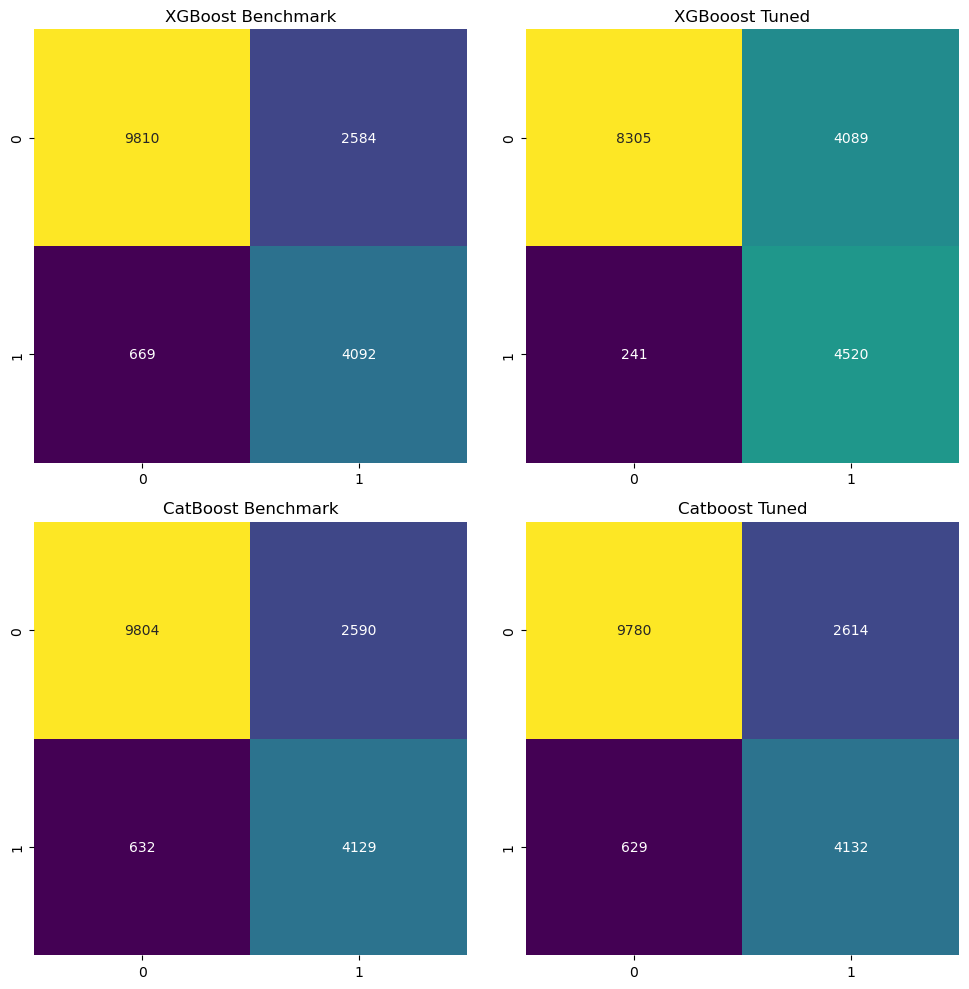

In [223]:
list_name = []
list_recall_score_tuned = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  

for ax, (name, model) in zip(axes.flatten(), model_tuned):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    scoring = recall_score(y_test, y_pred)  

    ax.set_title(name)
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="g",
        square=True,
        cmap="viridis",
        cbar=False,
        ax=ax
    )

    list_name.append(name)
    list_recall_score_tuned.append(round(scoring, 3))

plt.tight_layout()
plt.show()

XGBoost Benchmark vs Tuned
- Setelah tuning, Recall meningkat secara signifikan karena lebih banyak pelanggan yang benar-benar membatalkan reservasi berhasil diklasifikasikan dengan benar (TP meningkat, FN menurun). Namun, ada peningkatan FP, yang berarti lebih banyak prediksi pembatalan yang sebenarnya tidak terjadi.

CatBoost Benchmark vs Tuned
- Tuning pada CatBoost tidak menghasilkan perubahan signifikan dibandingkan versi benchmark. FN dan TP hampir sama, menunjukkan bahwa tuning tidak berdampak besar pada Recall atau F2-score.

### Kesimpulan Hyperparameter Tuning: XGBoost vs. CatBoost

Setelah dilakukan hyperparameter tuning, performa model mengalami perubahan yang berbeda untuk XGBoost dan CatBoost. Evaluasi dilakukan menggunakan F2-score (yang memberikan bobot lebih besar pada Recall) serta Recall, karena tujuan utama adalah mengidentifikasi sebanyak mungkin pelanggan yang benar-benar akan membatalkan reservasi.

Hasil Evaluasi Model

XGBoost

Sebelum tuning, XGBoost benchmark memiliki F2-score sebesar 0.802 dan Recall sebesar 0.866.
Setelah tuning, terjadi peningkatan yang signifikan dengan F2-score naik menjadi 0.817 dan Recall meningkat drastis menjadi 0.946.
Peningkatan ini menunjukkan bahwa model XGBoost setelah tuning menjadi jauh lebih baik dalam menangkap pelanggan yang akan membatalkan reservasi, dengan peningkatan yang konsisten pada metrik Recall dan F2-score.

CatBoost

Sebelum tuning, CatBoost benchmark memiliki F2-score sebesar 0.802 dan Recall sebesar 0.872.
Setelah tuning, F2-score sedikit menurun menjadi 0.801, dan Recall juga turun menjadi 0.867.
Penurunan ini menunjukkan bahwa kombinasi hyperparameter yang digunakan pada CatBoost tidak memberikan perbaikan signifikan, bahkan terjadi sedikit penurunan dalam kemampuan model mendeteksi pembatalan.

Kesimpulan
Berdasarkan hasil evaluasi, XGBoost dengan hyperparameter tuning dipilih sebagai model final karena berhasil meningkatkan Recall secara signifikan (naik dari 0.866 menjadi 0.946) dan meningkatkan F2-score menjadi 0.817. Peningkatan ini mengindikasikan bahwa model ini lebih efektif dalam mengidentifikasi pelanggan yang berpotensi membatalkan reservasi, sehingga mendukung tujuan bisnis untuk mengurangi kerugian akibat pembatalan kamar. Sementara itu, untuk CatBoost, versi benchmark lebih direkomendasikan karena tuning tidak memberikan peningkatan performa yang diharapkan.

## Penjelasan Model XGBoost

XGBoost (eXtreme Gradient Boosting) adalah sebuah algoritma ensemble yang menggunakan teknik gradient boosting untuk menghasilkan model prediktif yang kuat. Berikut beberapa poin penting tentang XGBoost:

Prinsip Dasar Gradient Boosting:
XGBoost menggabungkan beberapa model prediktif sederhana (biasanya decision trees) secara berurutan. Setiap model baru mencoba untuk mengurangi kesalahan yang dibuat oleh model-model sebelumnya, sehingga kesalahan residual dapat diminimalkan secara iteratif.
Efisiensi dan Skalabilitas:
Dirancang untuk kecepatan dan efisiensi, XGBoost mendukung komputasi paralel dan optimasi memori, sehingga sangat cocok untuk dataset besar dengan fitur kompleks.
Regularisasi dan Pencegahan Overfitting:
XGBoost menyertakan teknik regularisasi (seperti L1 dan L2) yang membantu mencegah overfitting. Ini membuat model menjadi lebih robust dan generalisasi dengan baik pada data baru.
Handling Missing Values:
Algoritma ini mampu menangani nilai yang hilang secara otomatis, sehingga tidak perlu banyak intervensi dalam tahap praproses data.
Fleksibilitas dan Pengaturan Parameter:
XGBoost menawarkan banyak parameter yang dapat disesuaikan, seperti learning rate, max depth, subsample ratio, dan lain-lain. Ini memungkinkan optimasi yang mendalam untuk mendapatkan kinerja terbaik pada tugas prediksi tertentu.
Dalam konteks prediksi pembatalan reservasi, XGBoost dipilih sebagai best model karena kemampuannya dalam menangkap pola kompleks dalam data, menghasilkan performa yang lebih tinggi, dan mampu mengurangi risiko false negatives melalui optimasi parameter yang cermat. Hal ini sangat penting dalam bisnis hotel untuk mendeteksi secara dini potensi pembatalan, sehingga dapat diambil langkah mitigasi secara tepat.

Berikut adalah ilustrasi konsep dasar dari XGBoost yang menggambarkan bagaimana algoritma ini bekerja:

              +--------------------+
              |    Input Data      |
              +--------------------+
                        |
                        V
             +---------------------+
             | Base Learner 1 (Tree)|
             +---------------------+
                        |
                Hitung Residual (Error)
                        |
                        V
             +---------------------+
             | Base Learner 2 (Tree)|
             +---------------------+
                        |
                Hitung Residual (Error)
                        |
                        V
                     ... (dst)
                        |
                        V
             +---------------------+
             | Base Learner N (Tree)|
             +---------------------+
                        |
                        V
             +---------------------+
             | Agregasi Prediksi   |
             +---------------------+
Penjelasan Ilustrasi:

- Input Data: Data asli masuk ke dalam sistem.
- Base Learner (Decision Trees): XGBoost membangun serangkaian pohon keputusan secara berurutan. Setiap pohon (base learner) mencoba mengoreksi kesalahan (residual) yang dibuat oleh pohon sebelumnya.
- Hitung Residual: Setelah pohon pertama menghasilkan prediksi, error atau residual dihitung. Pohon berikutnya dilatih untuk memprediksi residual ini.
- Agregasi Prediksi: Semua prediksi dari masing-masing pohon kemudian diagregasi (biasanya dengan penjumlahan) untuk menghasilkan prediksi akhir yang lebih kuat.


Setelah melalui proses evaluasi, tuning, model XGBoost telah menunjukkan performa terbaik dalam memprediksi pembatalan reservasi. Berikut adalah penjelasan mengenai bagaimana model ini nantinya akan diimplementasikan:

- Integrasi ke dalam Sistem Reservasi:
Model XGBoost akan diintegrasikan ke dalam sistem manajemen reservasi hotel. Saat data reservasi baru masuk, preprocessor dan model akan bekerja secara otomatis untuk memprediksi probabilitas pembatalan.
- Pipeline Otomatis:
Implementasi mencakup pembuatan pipeline end-to-end yang meliputi preprocessing data (transformasi, penghapusan fitur tidak relevan, dll.), prediksi dengan XGBoost, dan konversi probabilitas menjadi label menggunakan threshold yang telah dioptimalkan.
- Real-Time atau Batch Prediction:
Real-Time Prediction: Saat tamu membuat reservasi, sistem dapat langsung memberikan estimasi risiko pembatalan yang kemudian dapat digunakan oleh tim operasional untuk menyesuaikan kebijakan overbooking atau penawaran khusus.
Batch Prediction: Secara berkala, model akan dijalankan untuk mengevaluasi data reservasi terbaru dan mengidentifikasi potensi pembatalan, sehingga manajemen dapat melakukan penyesuaian secara berkala.
- Monitoring dan Evaluasi:
Setelah implementasi, performa model akan terus dipantau. Jika terjadi perubahan pola atau penurunan performa, model dapat diperbarui atau di-retrain menggunakan data terbaru agar tetap akurat.
- Integrasi dengan Sistem Notifikasi:
Output prediksi model (misalnya, probabilitas pembatalan) dapat diintegrasikan ke dalam sistem notifikasi internal. Misalnya, reservasi dengan risiko tinggi akan diberi peringatan agar tim pemasaran atau operasional dapat melakukan intervensi, seperti menghubungi tamu untuk konfirmasi atau menawarkan insentif agar reservasi tidak dibatalkan.
- Keamanan dan Privasi Data:
Seluruh implementasi juga harus memperhatikan aspek keamanan dan privasi data tamu, dengan memastikan bahwa data diproses sesuai dengan regulasi yang berlaku.
Dengan demikian, model XGBoost tidak hanya berfungsi sebagai alat prediksi, tetapi juga sebagai bagian integral dari strategi operasional hotel untuk mengurangi risiko pembatalan dan memaksimalkan pendapatan melalui pengambilan keputusan yang lebih tepat waktu dan terinformasi.

# FINAL MODEL INTERPRETATION

In [224]:
BEST_MODEL = xgb_tuning.best_estimator_

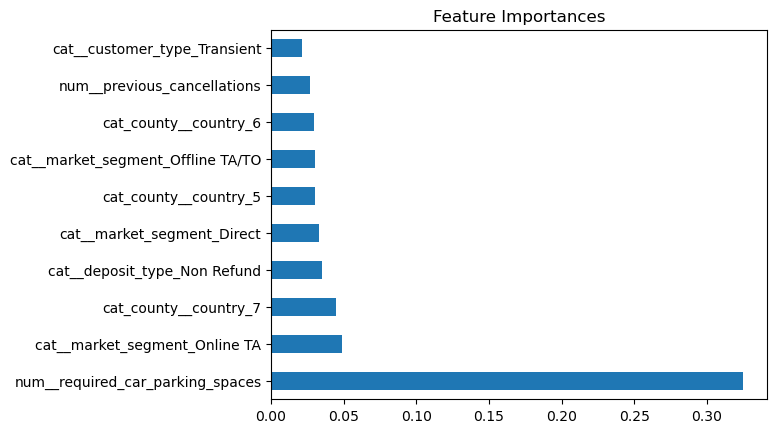

In [225]:
coef1 = pd.Series(BEST_MODEL["model"].feature_importances_, preprocessor.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind = "barh", title = "Feature Importances")
plt.show()

Berdasarkan grafik di atas, required_car_parking_spaces (num__required_car_parking_spaces) muncul sebagai fitur paling berpengaruh dalam memprediksi pembatalan reservasi. Hal ini dapat mengindikasikan bahwa jumlah parkir yang dibutuhkan oleh tamu berhubungan erat dengan pola pemesanan—mungkin tamu yang memesan lebih banyak ruang parkir cenderung lebih pasti datang, atau sebaliknya, ada korelasi tertentu dengan perilaku pembatalan.

Selanjutnya, market_segment_Online TA (cat__market_segment_Online TA) juga menempati urutan penting. Hal ini menunjukkan bahwa saluran pemesanan (terutama online travel agency) memiliki dampak signifikan terhadap kemungkinan pembatalan. Faktor lain yang cukup dominan adalah country_Country_7, deposit_type_Non Refund, dan market_segment_Direct, yang menunjukkan bahwa asal negara dan jenis deposit (refundable atau tidak) turut berpengaruh terhadap keputusan pelanggan untuk membatalkan reservasi.

Menariknya, fitur-fitur seperti previous_cancellations (num__previous_cancellations) dan customer_type_Transient (cat__customer_type_Transient) justru menempati posisi yang lebih rendah dari segi pengaruh, meskipun secara intuitif keduanya mungkin dianggap penting. Hasil ini menggambarkan bahwa setiap dataset memiliki karakteristik unik, dan korelasi teoretis tidak selalu tercermin secara kuat dalam model.

Secara keseluruhan, analisis feature importance ini membantu mengarahkan fokus pengelola hotel untuk memperhatikan beberapa variabel kunci—terutama jumlah parkir yang dibutuhkan dan saluran pemesanan—guna mengoptimalkan strategi mitigasi pembatalan dan meningkatkan akurasi prediksi.

In [226]:
preprocessor_fitted = BEST_MODEL.named_steps['preprocessor'].fit(X_train)

X_train_encod = preprocessor_fitted.transform(X_train)


In [227]:
preprocessor_fitted = BEST_MODEL.named_steps['preprocessor']

transformers = preprocessor_fitted.transformers_
feature_names = []

for name, transformer, columns in transformers:
    if transformer == "passthrough":
        feature_names.extend(columns)
    elif hasattr(transformer, 'get_feature_names_out'):
        try:
            names = transformer.get_feature_names_out()
        except Exception as e:
            try:
                names = transformer.get_feature_names_out(input_features=columns)
            except Exception as e:
                print(f"Error pada transformer {name}: {e}")
                names = columns
        feature_names.extend(names)
    else:
        feature_names.extend(columns)

feature_names = list(feature_names)


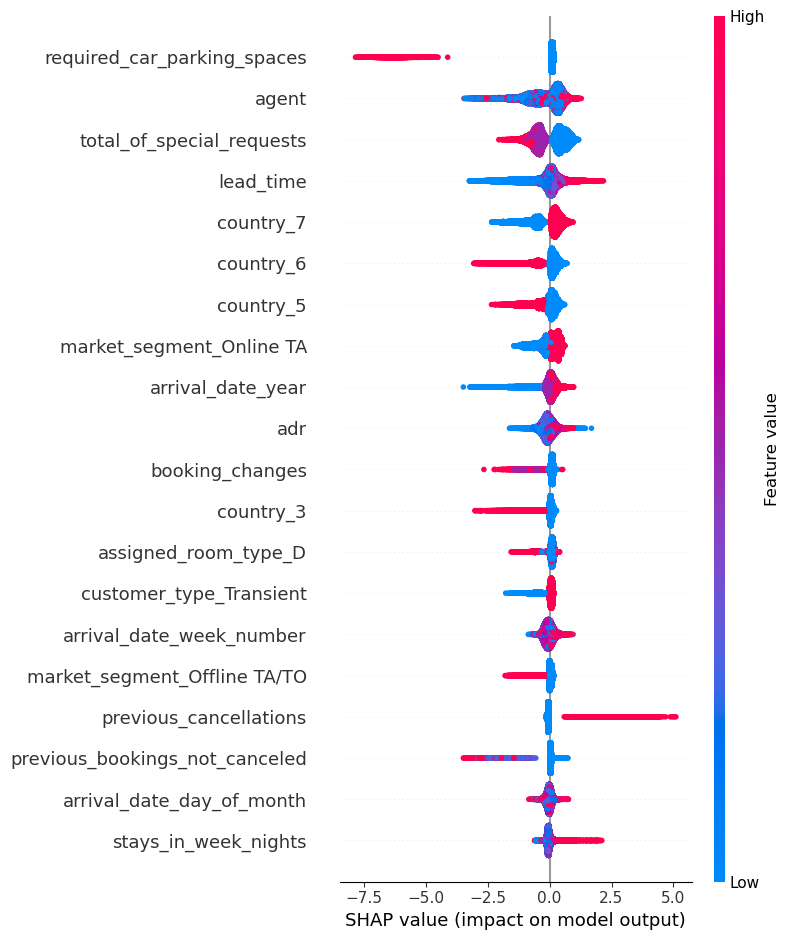

In [228]:
explainer = shap.Explainer(BEST_MODEL[-1])
shap_values = explainer(X_train_encod)

shap.summary_plot(shap_values, X_train_encod, feature_names=feature_names)


SHAP summary plot di atas:

Makna Warna dan Nilai SHAP
Merah: Nilai fitur yang tinggi.
Biru: Nilai fitur yang rendah.
SHAP value positif: Meningkatkan probabilitas pembatalan.
SHAP value negatif: Menurunkan probabilitas pembatalan.
Fitur-Fitur Penting
- required_car_parking_spaces
Fitur paling berpengaruh: semakin banyak parkir (merah, SHAP negatif) → menurunkan kemungkinan pembatalan.
agent
- Agen tertentu (merah) bisa menaikkan (SHAP positif) atau menurunkan (SHAP negatif) potensi pembatalan, tergantung ID agen.
- total_of_special_requests
Banyak permintaan khusus (merah, SHAP negatif) → tamu lebih serius, cenderung tidak membatalkan.
- lead_time
Lead time panjang (merah, SHAP positif) → risiko pembatalan meningkat, tapi bisa dipengaruhi konteks lain (mis. tamu bisnis vs. liburan).
- country_X & market_segment_Online TA
Asal negara tertentu dan pemesanan via OTA tertentu dapat signifikan menaikkan (SHAP positif) atau menurunkan (SHAP negatif) risiko pembatalan.
Fitur Lain (adr, booking_changes, previous_cancellations, dll.)
Berkontribusi lebih kecil, tetapi tetap relevan. Contoh: riwayat pembatalan tinggi (merah, SHAP positif) → meningkatkan peluang pembatalan.
Kesimpulan
Hotel sebaiknya fokus pada fitur-fitur kunci (parkir, agen, permintaan khusus, lead time, asal negara, dan saluran pemesanan). Nilai merah dengan SHAP positif menandakan kondisi yang meningkatkan risiko pembatalan, sementara nilai merah dengan SHAP negatif menurunkan risiko. Dengan memahami kombinasi ini, hotel dapat menerapkan kebijakan preventif dan penawaran khusus untuk mengurangi pembatalan.

In [229]:
def proba_range(data):
    if data <= 0.1:
        return "0 - 0.1"
    elif data <= 0.2:
        return "0.1 - 0.2"
    elif data <= 0.3:
        return "0.2 - 0.3"
    elif data <= 0.4:
        return "0.3 - 0.4"
    elif data <= 0.5:
        return "0.4 - 0.5"
    elif data <= 0.6:
        return "0.5 - 0.6"
    elif data <= 0.7:
        return "0.6 - 0.7"
    elif data <= 0.8:
        return "0.7 - 0.8"
    elif data <= 0.9:
        return "0.8 - 0.9"
    elif data <= 1:
        return "0.9 - 1"

In [230]:
# fitting best model
BEST_MODEL.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_c...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.08249999999999999, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [231]:
y_pred_proba_xgboost = BEST_MODEL.predict_proba(X_test)[:,-1]
y_pred_xgboost = BEST_MODEL.predict(X_test)

In [232]:
df_proba = X_test.copy()
df_proba["pred_probability"] = y_pred_proba_xgboost
df_proba["actual"] = y_test
df_proba["probability_range"] = df_proba["pred_probability"].apply(proba_range)
df_proba

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,pred_probability,actual,probability_range
106932,City Hotel,51,2017,March,9,4,0,1,2,0,0,HB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,133.20,0,1,0.806483,0,0.8 - 0.9
12436,Resort Hotel,248,2017,June,26,30,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,0,0,Transient-Party,101.25,0,1,0.642806,1,0.6 - 0.7
15481,Resort Hotel,0,2015,July,30,20,1,0,2,0,0,BB,BEL,Direct,Direct,0,0,0,G,G,0,No Deposit,0,0,Transient,153.00,0,0,0.020577,0,0 - 0.1
55813,City Hotel,92,2016,August,35,22,1,0,3,0,0,BB,BRA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,150.30,0,0,0.983650,1,0.9 - 1
8450,Resort Hotel,136,2016,September,40,29,0,3,2,0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,89.00,0,0,0.965805,1,0.9 - 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118773,City Hotel,63,2017,August,34,23,0,2,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,8,0,Transient,139.00,0,1,0.165631,0,0.1 - 0.2
26533,Resort Hotel,175,2016,July,31,25,3,6,2,0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,71,0,Transient,128.00,0,0,0.073320,0,0 - 0.1
59805,City Hotel,5,2016,November,45,2,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,91,0,Transient,94.00,0,0,0.657290,1,0.6 - 0.7
16275,Resort Hotel,145,2015,August,34,17,1,4,2,2,0,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,250,0,Transient,169.15,0,3,0.783844,0,0.7 - 0.8


In [233]:
df_proba.groupby("probability_range")[["actual", "pred_probability"]].mean()

,actual,pred_probability
probability_range,,
0 - 0.1,0.003662,0.020695
0.1 - 0.2,0.033686,0.147396
0.2 - 0.3,0.064120,0.248500
0.3 - 0.4,0.078247,0.347409
0.4 - 0.5,0.132047,0.452011
0.5 - 0.6,0.167112,0.550715
0.6 - 0.7,0.222886,0.652469
0.7 - 0.8,0.302589,0.752922
0.8 - 0.9,0.470940,0.854175


Dari tabel ini, terlihat bahwa actual values dan predicted probability memiliki pola tertentu dalam rentang probabilitas. Jika kita membandingkan nilai actual dengan pred_probability, tampaknya prediksi model lebih akurat ketika probabilitas prediksi lebih rendah (di bawah 0.5).

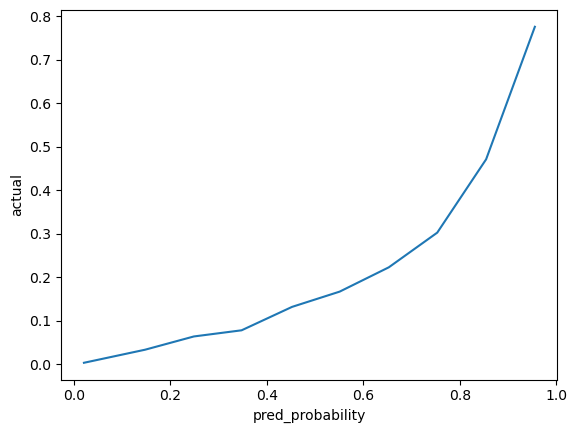

In [234]:
sns.lineplot(df_proba.groupby("probability_range")[["actual", "pred_probability"]].mean(), y = "actual", x = "pred_probability")
plt.show()

- Menggambarkan kalibrasi model: seberapa baik prediksi probabilitas mencerminkan kejadian aktual.
- Jika model bekerja dengan baik, semakin tinggi probabilitas prediksi, semakin tinggi pula rasio aktual pembatalan.
- Plot ini menunjukkan hubungan yang monoton meningkat, yang berarti model cukup baik dalam menangkap pola pembatalan.
- Jika model sudah terkalibrasi dengan baik, kita bisa menggunakan prediksi probabilitas ini untuk pengambilan keputusan bisnis, seperti strategi mitigasi risiko pembatalan.

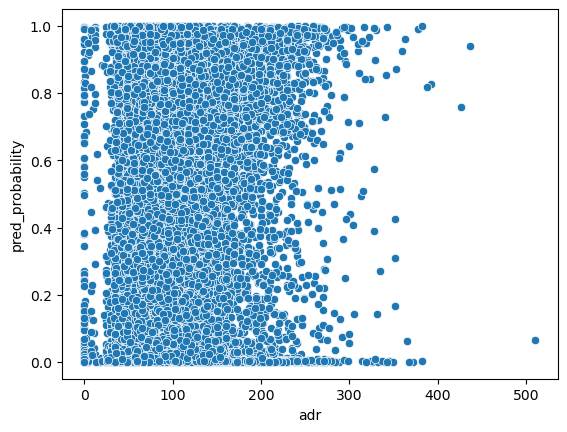

In [235]:
sns.scatterplot(df_proba, y = "pred_probability", x = "adr")
plt.show()

Menunjukkan bahwa pemesanan dengan ADR tinggi cenderung memiliki probabilitas pembatalan lebih tinggi.

# CONCLUSION AND RECOMMENDATION


---

### **Kesimpulan Akhir**

#### **1. Analisis Faktor Pembatalan**
Faktor utama yang memengaruhi pembatalan pemesanan hotel meliputi:
- **Required Car Parking Spaces**: Pelanggan dengan permintaan tinggi cenderung tidak membatalkan.
- **Agent**: Agen tertentu menunjukkan pola pembatalan tinggi.
- **Country**: Pelanggan dari negara tertentu memiliki kecenderungan pembatalan lebih tinggi.
- **Lead Time**: Waktu pemesanan yang lebih lama meningkatkan risiko pembatalan.
- **Segmentasi Pasar**: Pelanggan bisnis dan grup lebih sering membatalkan dibanding individu.

#### **2. Pemilihan Model Terbaik**
- **XGBoost dengan Hyperparameter Tuning** (Best Model):
  - **Recall**: **0.946** (Mengidentifikasi 94.6% pembatalan).
  - **Precision**: **0.51** (Beberapa prediksi mungkin salah).
  - **F2-Score**: **0.817** (Menyeimbangkan recall dan presisi).

- **XGBoost Benchmark**:
  - **Recall**: **0.685**
  - **Precision**: **0.752** (Lebih akurat dalam prediksi pembatalan).
  - **F2-Score**: **0.698**

#### **3. Strategi Bisnis Berdasarkan Model**
- **XGBoost Tuning (Ketika Bisnis Sepi)** (Model Opsional):
  - **Keuntungan Bersih**: **13.705,2 Euro/bulan**.
  - **Biaya Insentif**: **1.522,8 Euro/bulan**.
  - **Keuntungan Kotor**: **15.228 Euro/bulan**.

- **XGBoost Benchmark (Ketika Peak Season)**:
  - **Keuntungan Bersih**: **10.929 Euro/bulan**.
  - **Biaya Insentif**: **1.201,2 Euro/bulan**.
  - **Keuntungan Kotor**: **12.130,2 Euro/bulan**.

- **Perhitungan Tanpa Model**:
  - **Tingkat Pembatalan**: 27,7%. (diambil dari cancelation rate)
  - **Pendapatan**: **7.808,4 Euro**.

  **Note**:
  Semua perhitungan dibuat berdasarkan harga 108 EUR per malam.

#### **4. Rekomendasi Strategis**
- **Program Loyalitas**: Insentif untuk pelanggan berisiko tinggi.
- **Optimasi Harga Dinamis**: Menyesuaikan harga berdasarkan risiko pembatalan.
- **Peningkatan Layanan Pelanggan**: Perhatian khusus untuk pelanggan dengan riwayat pembatalan.
- **Integrasi dengan Sistem Reservasi**: Peringatan real-time untuk mitigasi efektif.

#### **5. Potensi Pengembangan**
- **Penggunaan Data Real-Time**: Memanfaatkan data cuaca, acara lokal, dan tren perjalanan.
- **Eksperimen dengan Algoritma Lain**: LightGBM atau CatBoost.
- **Evaluasi Berkelanjutan**: Retraining model dengan data terbaru.

---

### **Ringkasan Kesimpulan**
- **Model Terbaik**:
  - **XGBoost Tuning** (Recall **0.946**) untuk bisnis tidak dalam high demand.
  - **XGBoost Benchmark** (Precision **0.752**) untuk peak season.
- **Keuntungan Bisnis**:
  - **XGBoost Tuning**: **13.705,2 Euro/bulan**.
  - **XGBoost Benchmark**: **10.929 Euro/bulan**.
- **Strategi Utama**: Insentif, optimasi harga, dan integrasi dengan sistem reservasi.

Dengan strategi ini, hotel dapat meningkatkan pendapatan dan mengurangi risiko pembatalan pemesanan sesuai kondisi bisnis.

# MODEL LIMITATION

Model ini hanya dapat digunakan pada rentang data yang digunakan pada pemodelan ini yaitu :

| Feature | Data Type | Limitasi |
| --- | --- | --- |
| `lead_time` | Integer | Jarak hari antara tanggal *booking* hotel hingga tanggal yang dijadwalkan untuk *check-in* di rentang 0-700 |
| `arrival_date_year` | Integer | Tahun dijadwalkan *check-in* di rentang 2015-2017 |
| `arrival_date_week_number` | Integer | Minggu dimana dijadwalkan *check-in* di rentang 1-53 | 
| `arrival_date_day_of_month` | Integer | Tanggal dimana dijadwalkan *check-in di rentang 1-31 |
| `stays_in_weekend_nights` | Integer | Jumlah malam di akhir pekan (Sabtu atau Minggu) yang di-*booking* di rentang 0-19 |
| `stays_in_week_nights` | Integer | Jumlah malam dalam seminggu (Senin - Jum'at) yang di-*booking* di rentang 0-50 |
| `adults` | Integer | Jumlah orang dewasa di rentang 0-4 |
| `children` | Float | Jumlah anak-anak di rentang 0-3 |
| `babies` | Integer | Jumlah bayi di rentang 0-2 |
| `is_repeated_guest` | Integer | Nilai yang berasal dari pemesan yang berulang atau tidak di rentang 0-1 |
| `previous_cancellations` | Integer | Jumlah Pemesanan yang dibatalkan sebelumnya di rentang 0-26 |
| `previous_bookings_not_canceled` | Integer | Jumlah *booking* hotel sebelumnya yang tidak dibatalkan di rentang 0-72 |
| `booking_changes` | Integer | Jumlah perubahan yang dilakukan pada *booking* hotel di rentang 0-18 |
| `days_in_waiting_list` | Integer | Jumlah hari untuk setiap *booking* hotel yang masuk ke dalam *waiting list* di rentang 0-391 |
| `adr` | Float | Rata-rata tarif harian atau *Average Daily Rate* di rentang 0-510 |
| `required_car_parking_spaces` | Integer | Jumlah ruang parkir mobil yang dibutuhkan pemesan di rentang 0-3 |
| `total_of_special_requests` | Integer | Jumlah permintaan khusus yang dibuat oleh pemesan di rentang 0-5 |


## SAVE MODEL

In [236]:
BEST_MODEL.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_c...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.08249999999999999, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=5, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [237]:
import pickle
pickle.dump(BEST_MODEL, open("BEST_MODEL_for_hotel_booking_demand.pkl", "wb"))

In [238]:
model_loaded = pickle.load(open('BEST_MODEL_for_hotel_booking_demand.sav','rb'))